In [1]:
%matplotlib inline
import numpy as np
import pca
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from SAILnet import SAILmods
import tf_lca
import os
import StimSet
import fitlearners
import utils

In [44]:
import imp
imp.reload(utils)

<module 'utils' from '/mnt/c/Users/Eric/Documents/Berkeley/Research/Neuroscience/Sparse coding/SAILnet/PythonSAILnet/whitening/utils.py'>

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (8.75,7.5)
mpl.rcParams['savefig.bbox'] = 'tight'

In [5]:
datafile = 'vh32_256.npy'
numinput = 256
with open('vh32_256PCA.pickle', 'rb') as f:
    impca, origshape = pickle.load(f)
data = np.load(datafile)[:, :numinput]
impca.dim = numinput

def apply_spectrum(data, power=1.0):
    colored = data.dot(np.diag(np.power(impca.sValues[:numinput], power)))
    return colored/colored.std()

numunits = numinput
imnet = SAILmods.VarTimeSAILnet(data=data, nunits=numunits,
              datatype='image',
              pca=impca,
              stimshape=origshape, ninput=numinput)

Errors on  0  files
Parameters of the lower-error model: 
p =  0.1
gain =  1.0
mse =  0.6793845000160275
Errors on  0  files
Parameters of the lower-error model: 
p =  0.1
gain =  3.16
mse =  0.7332356047354024
Errors on  0  files
Parameters of the lower-error model: 
p =  0.046
gain =  3.16
mse =  0.7726866378626112
Errors on  0  files
Parameters of the lower-error model: 
p =  0.046
gain =  10.0
mse =  0.806898778617984
Errors on  0  files
Parameters of the lower-error model: 
p =  0.01
gain =  31.6
mse =  0.8942159454316394
Errors on  0  files
Parameters of the lower-error model: 
p =  0.01
gain =  31.6
mse =  1.248423432969642


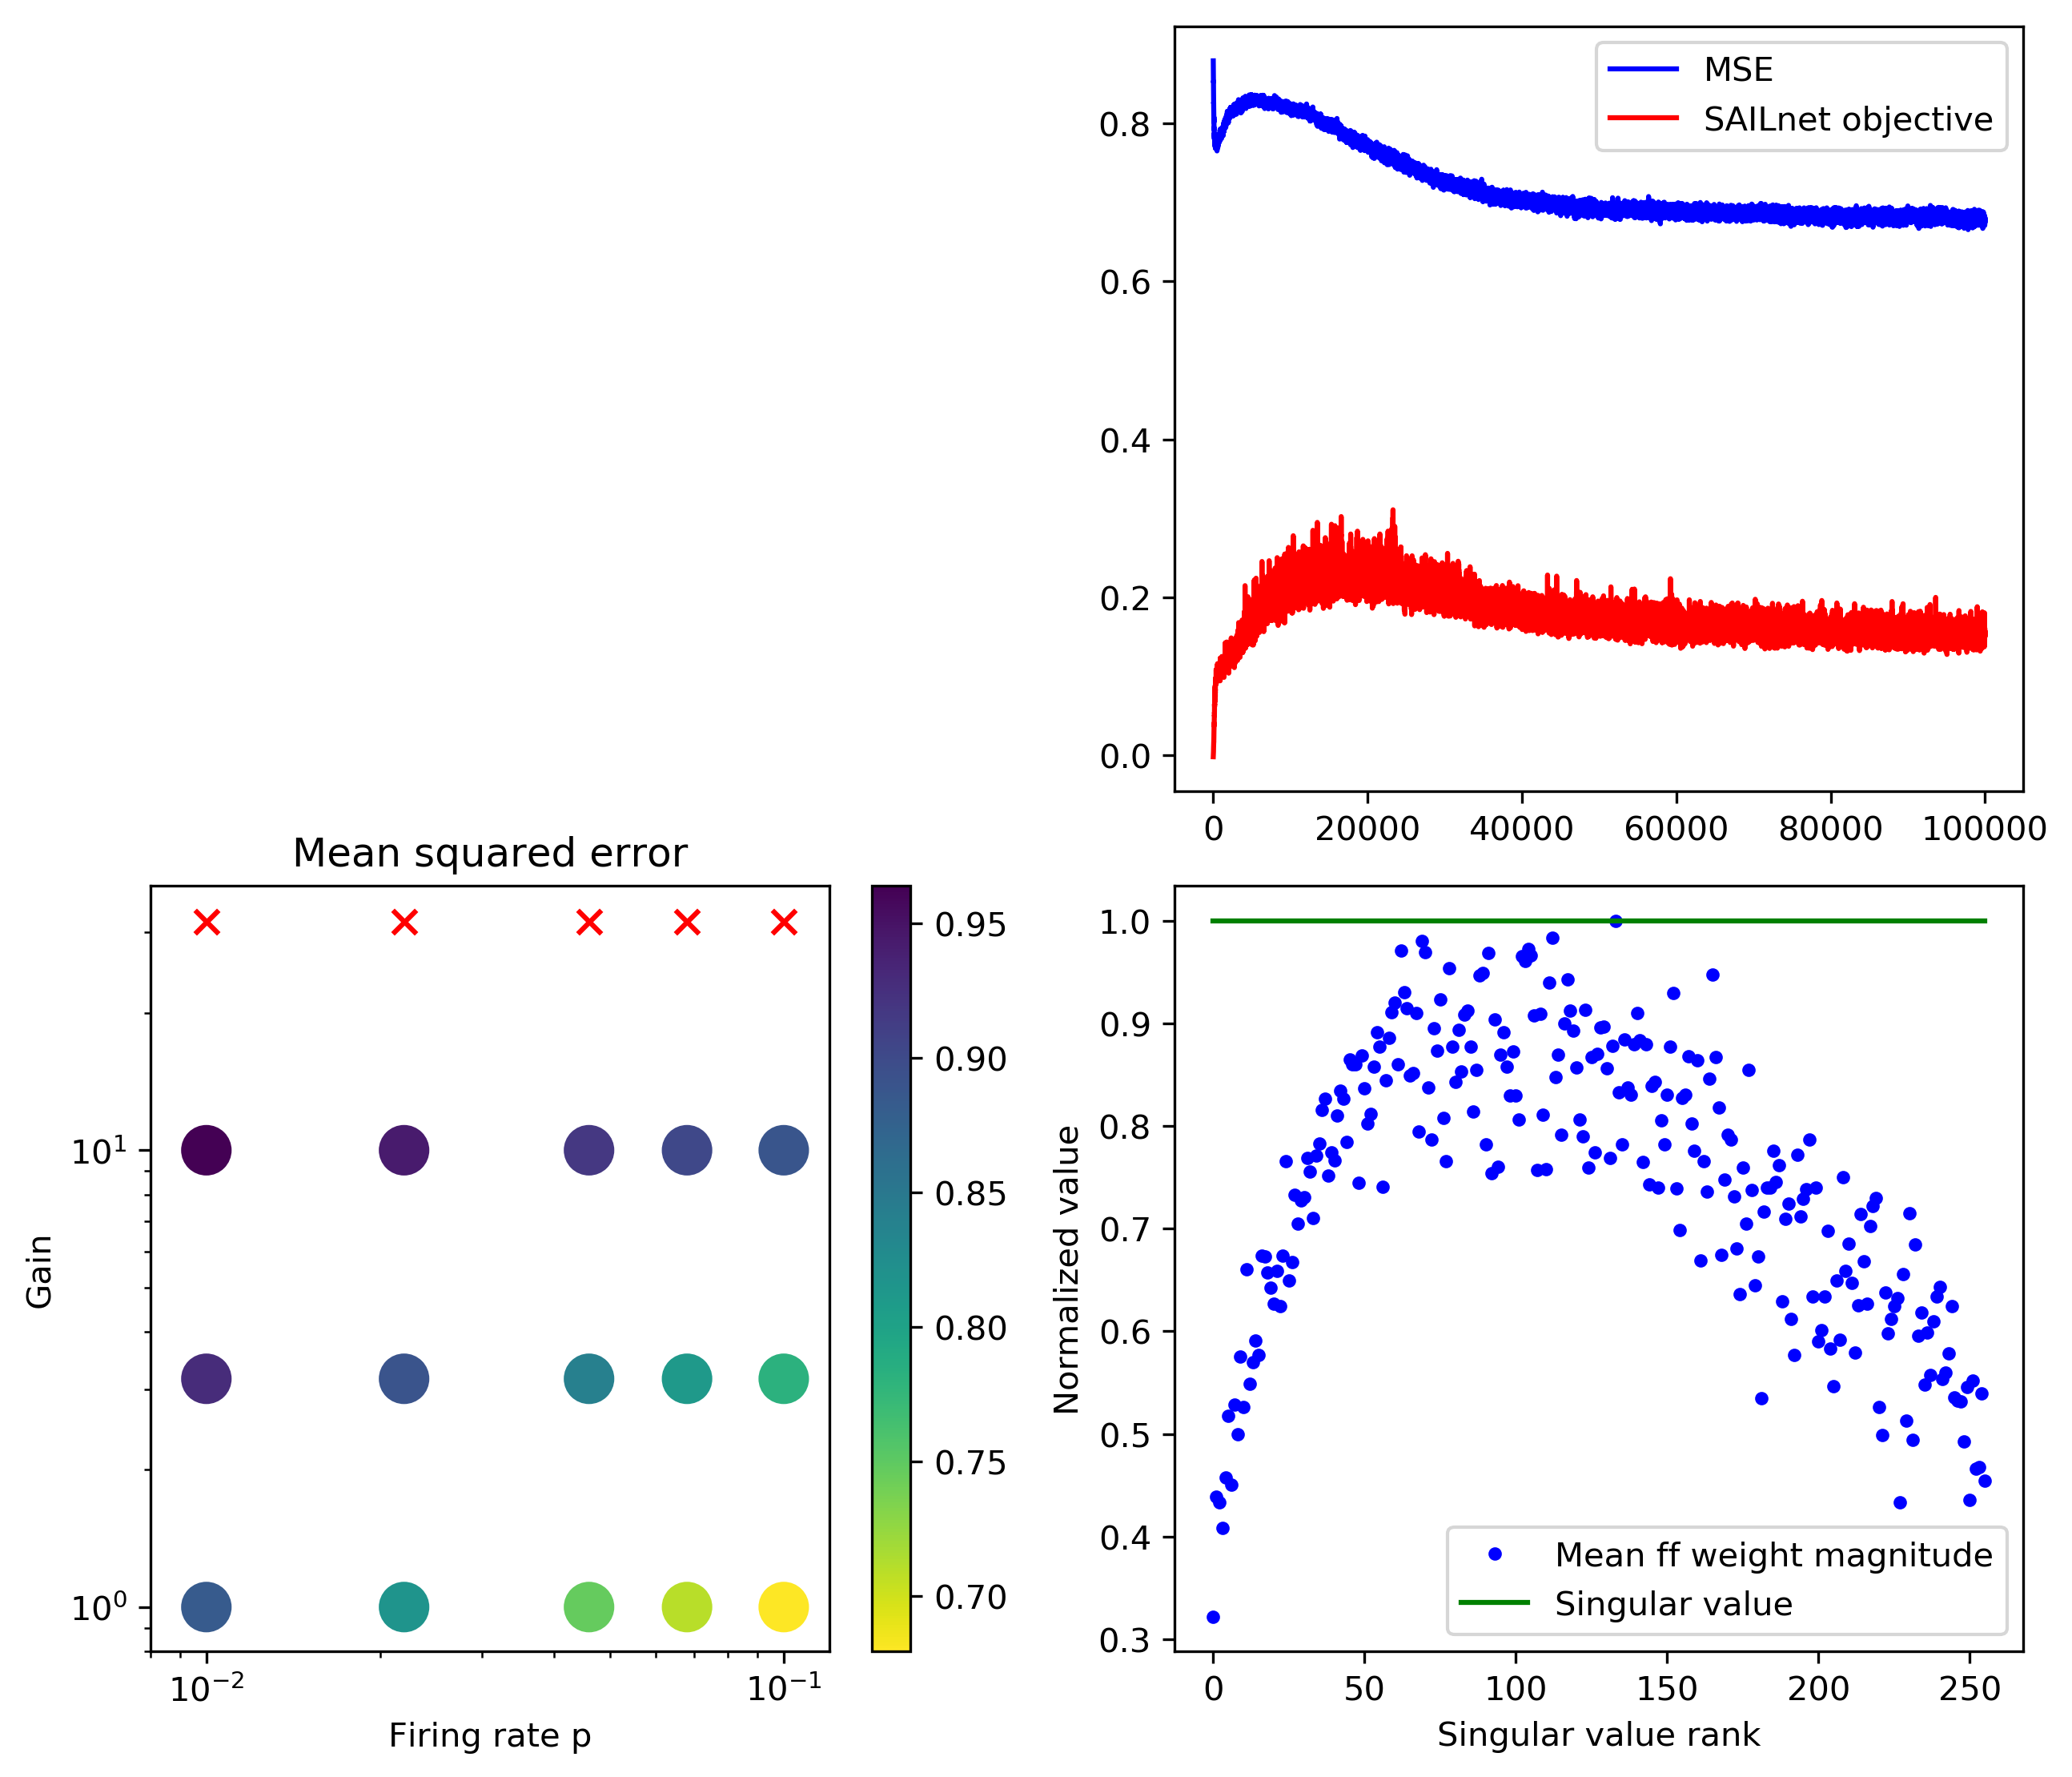

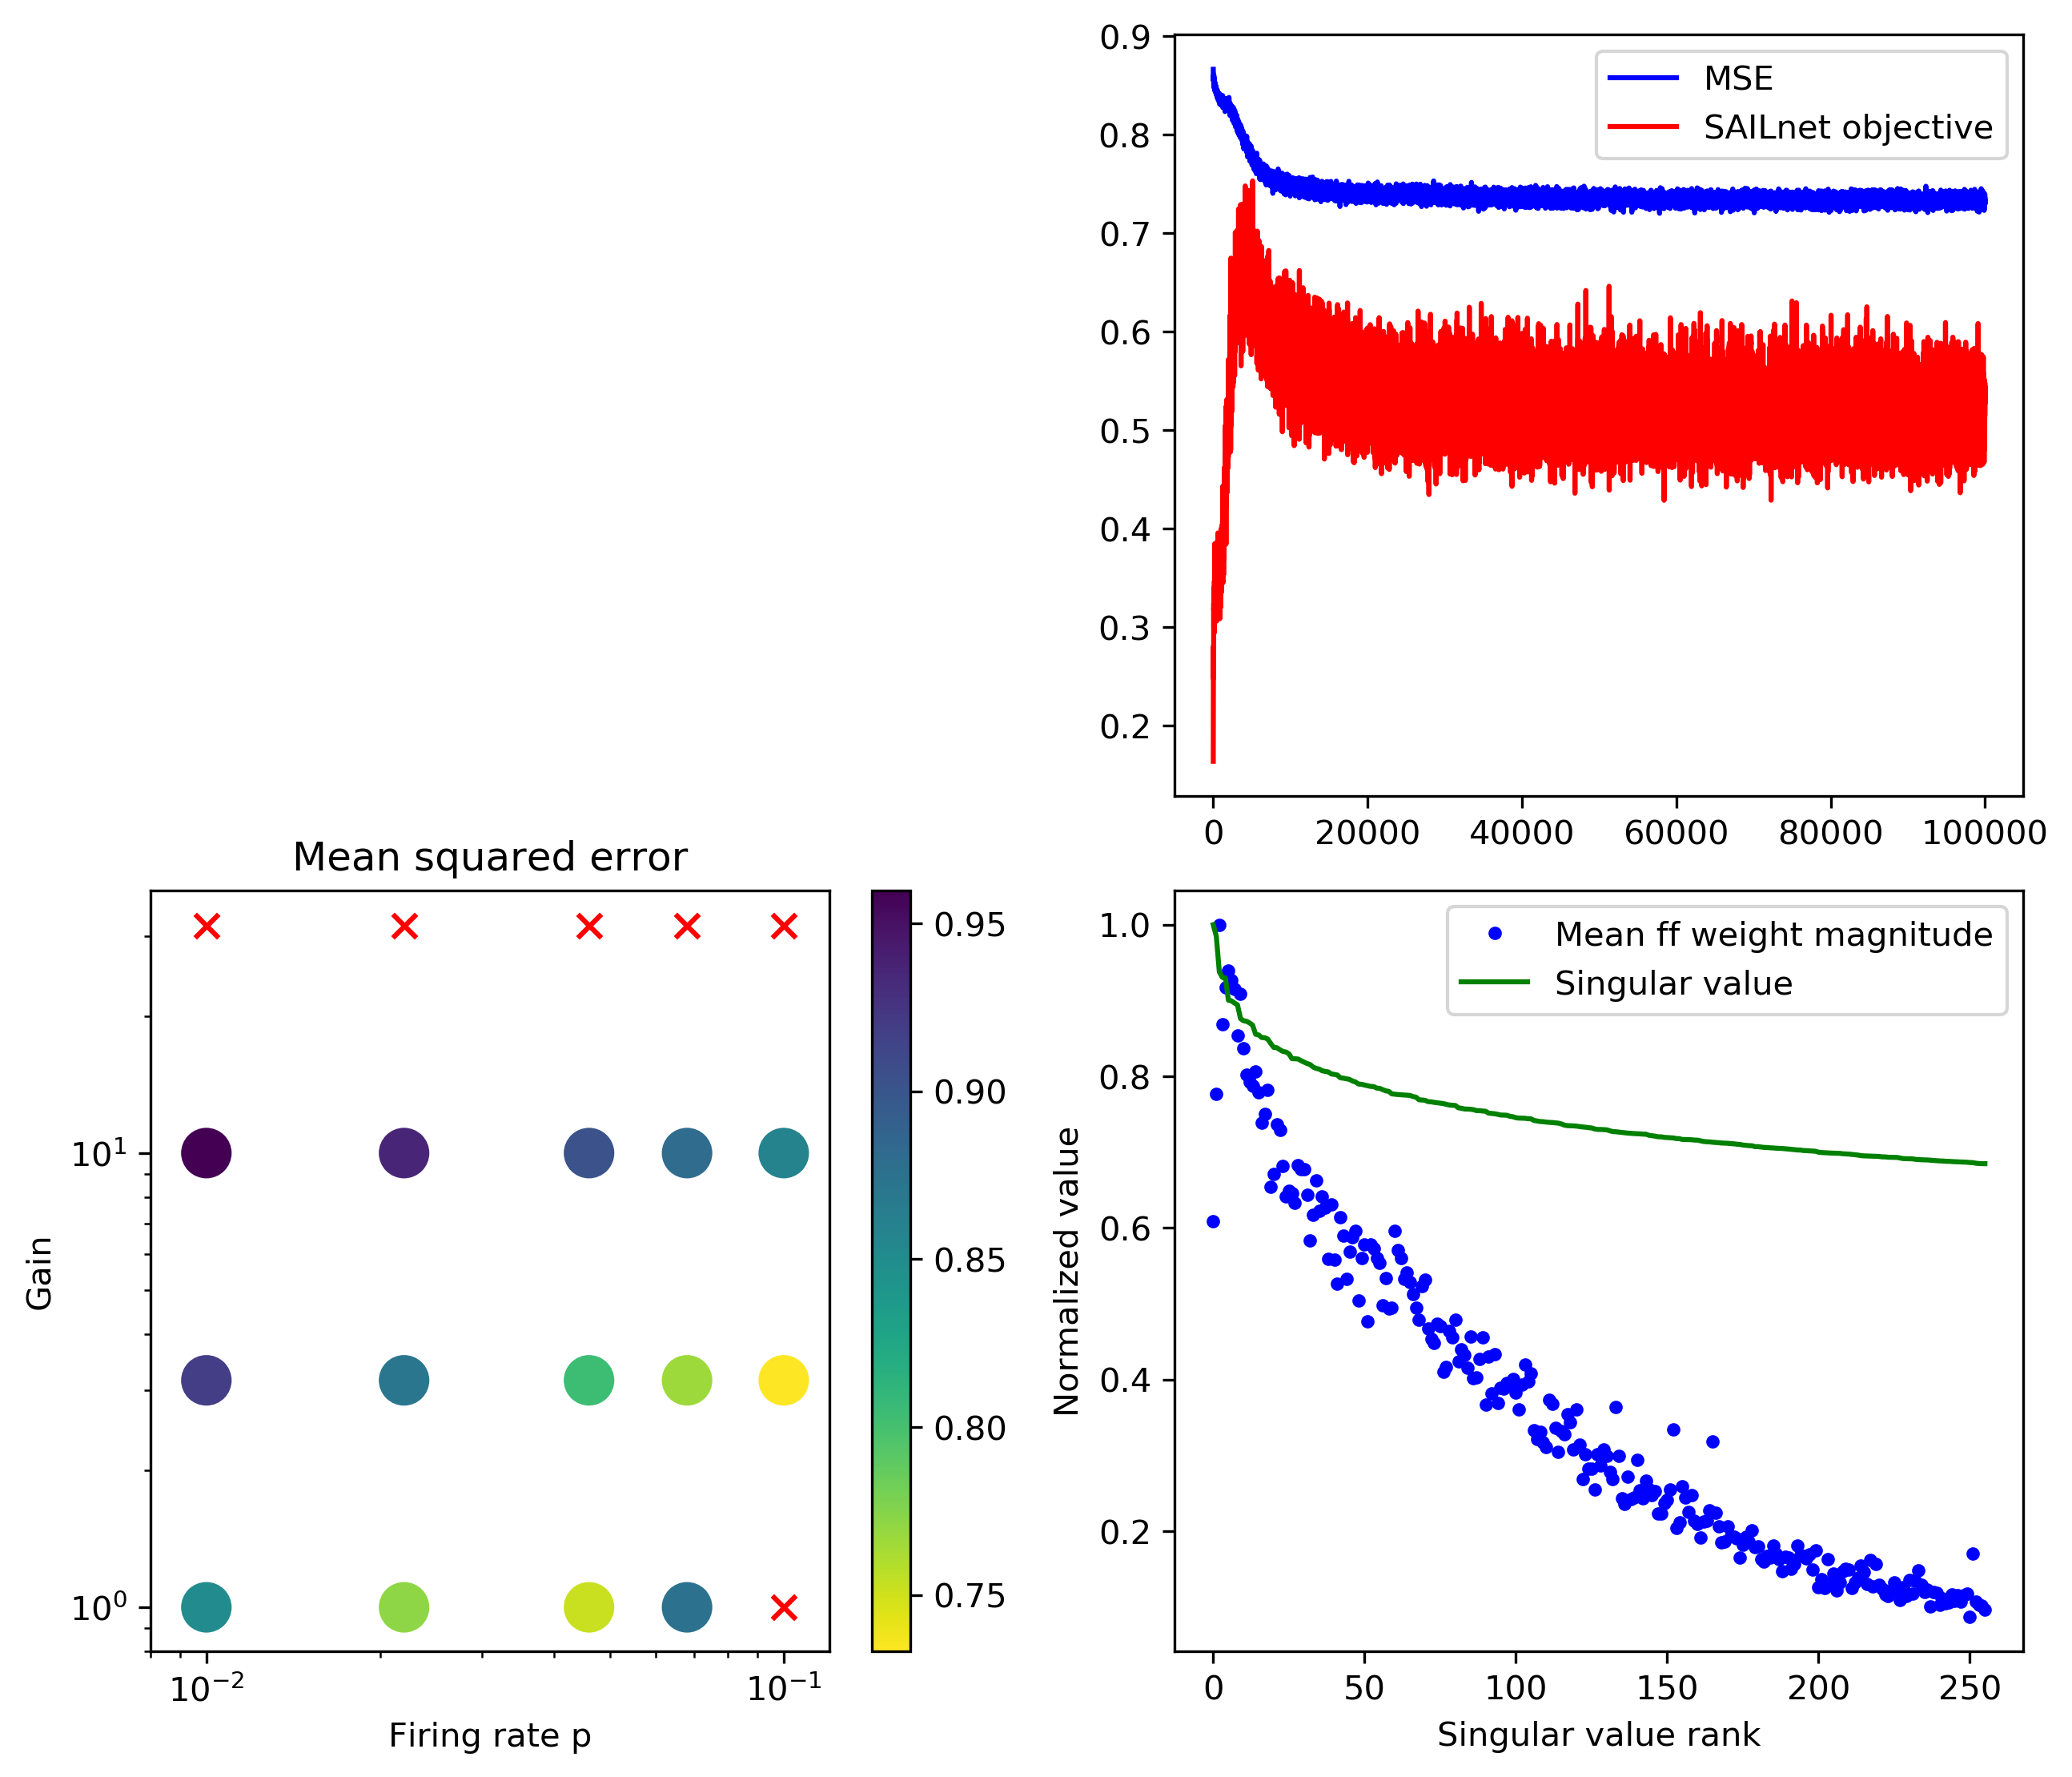

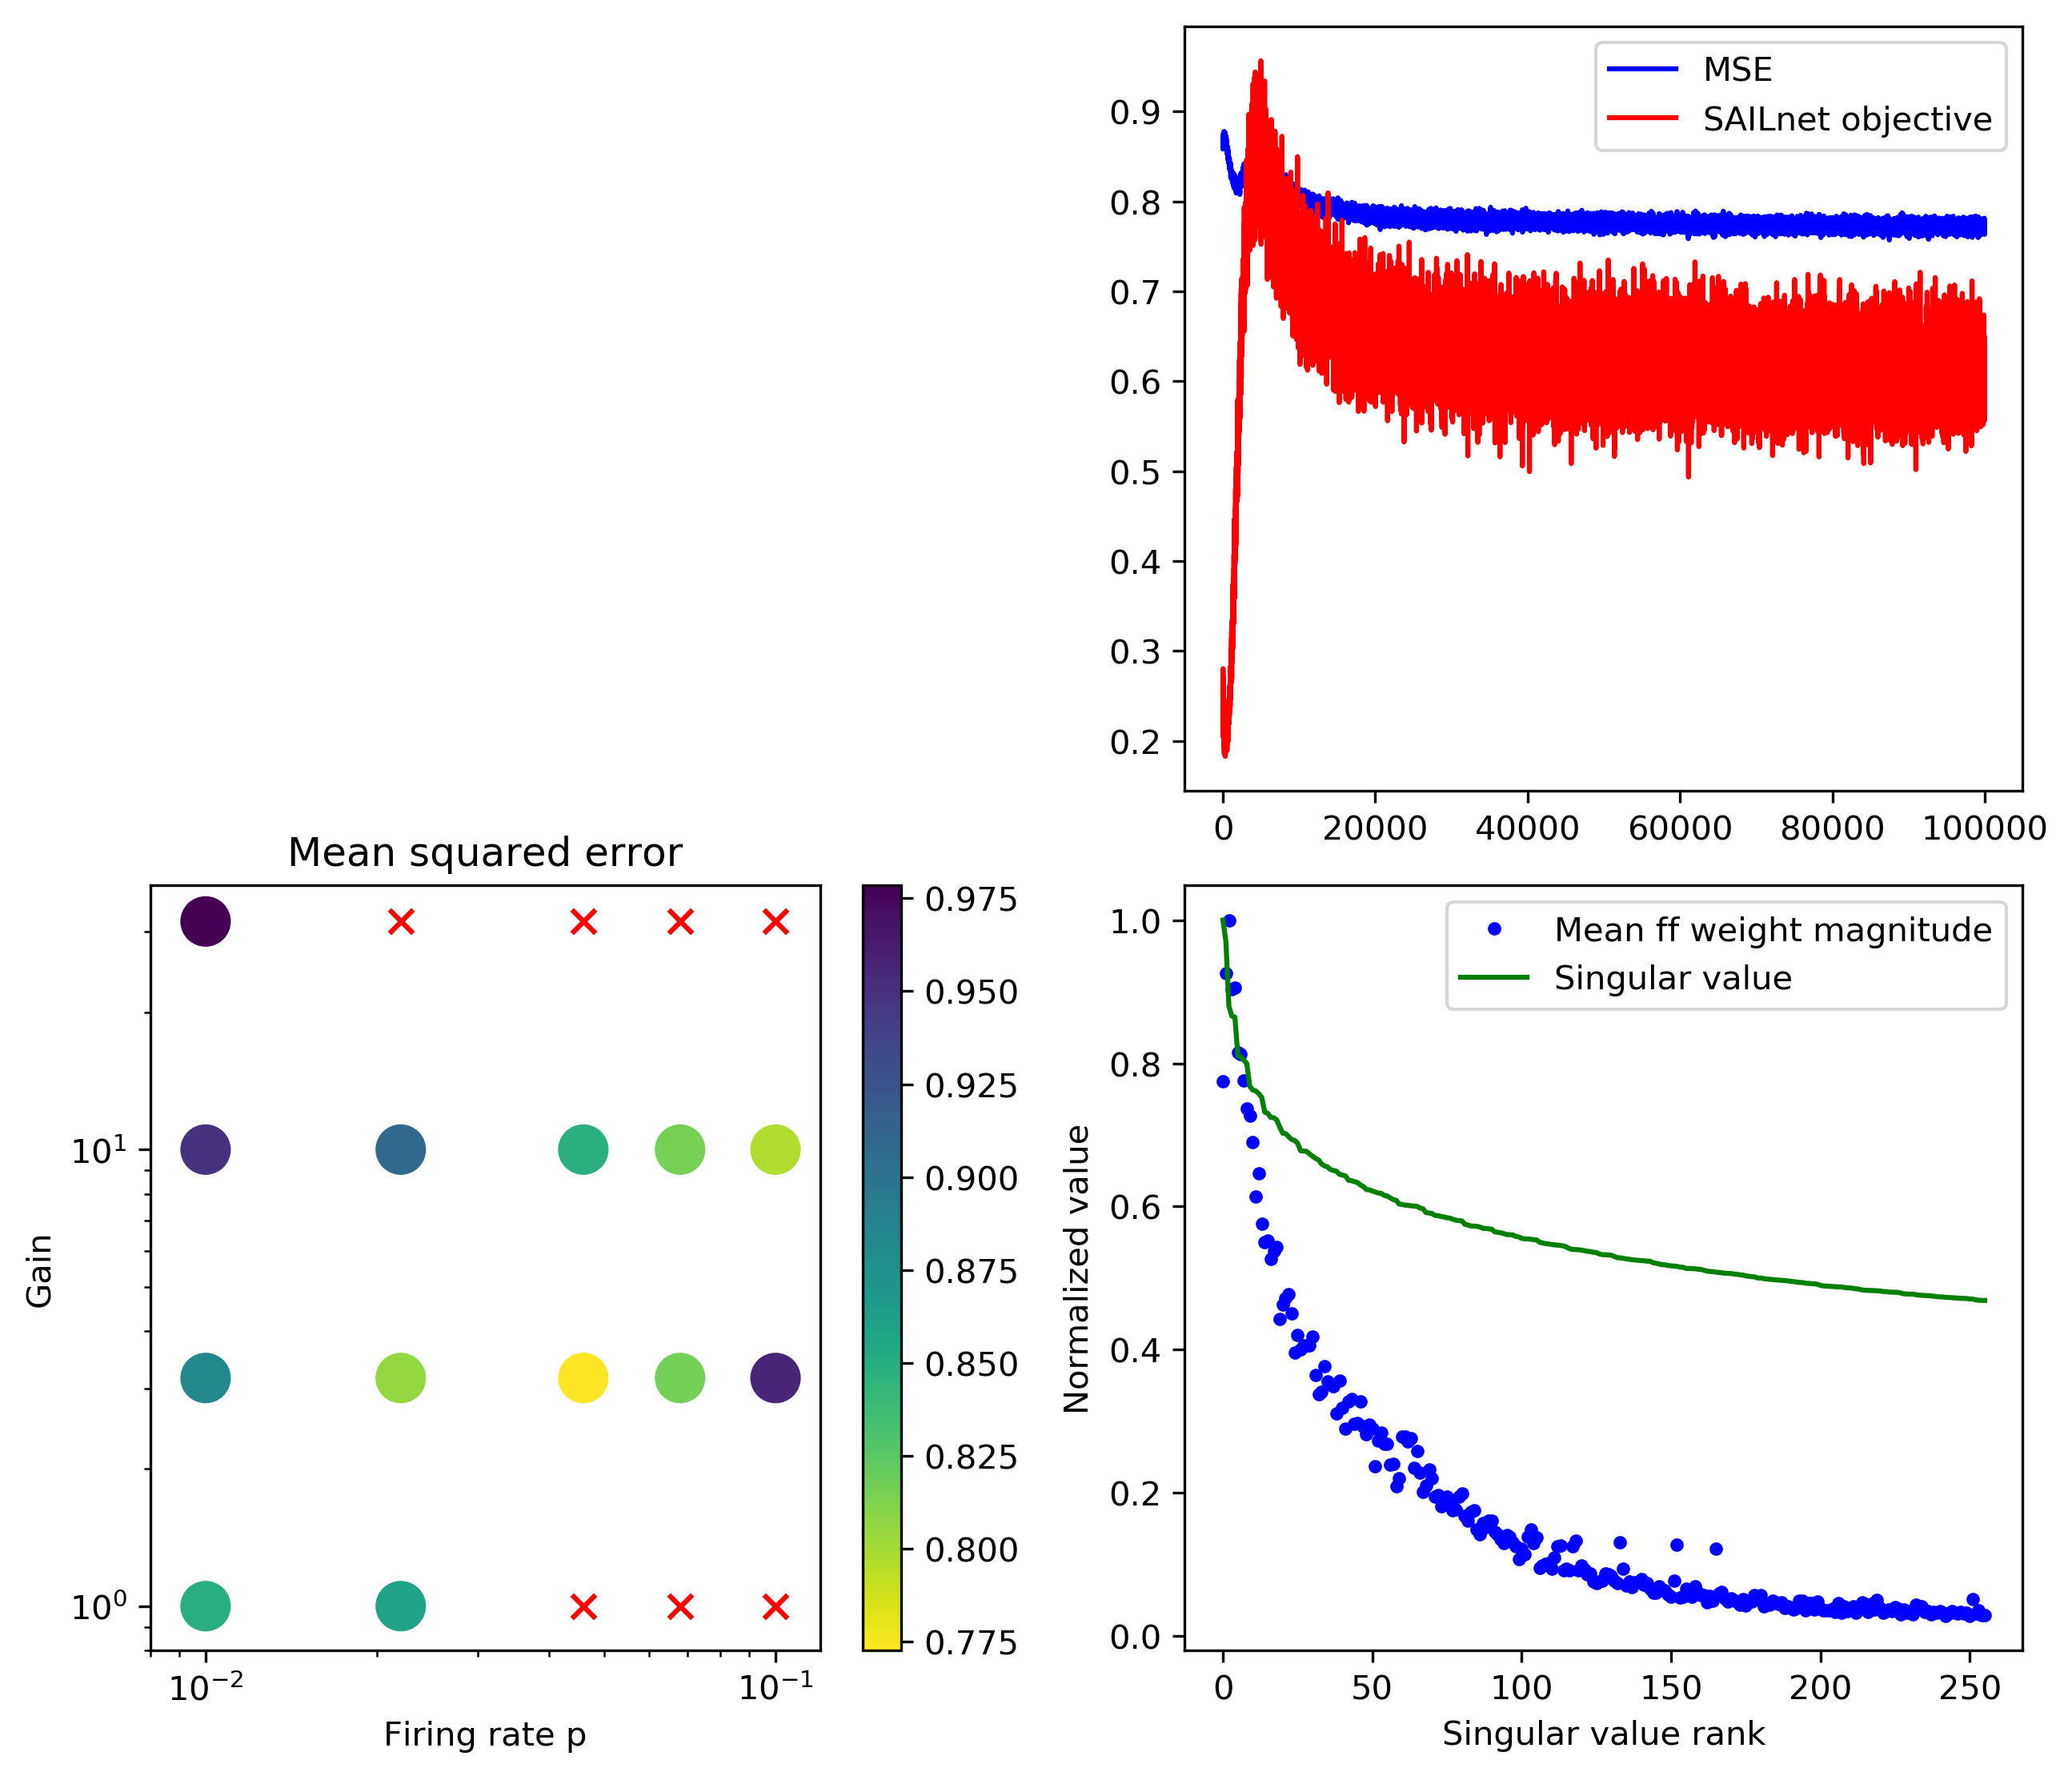

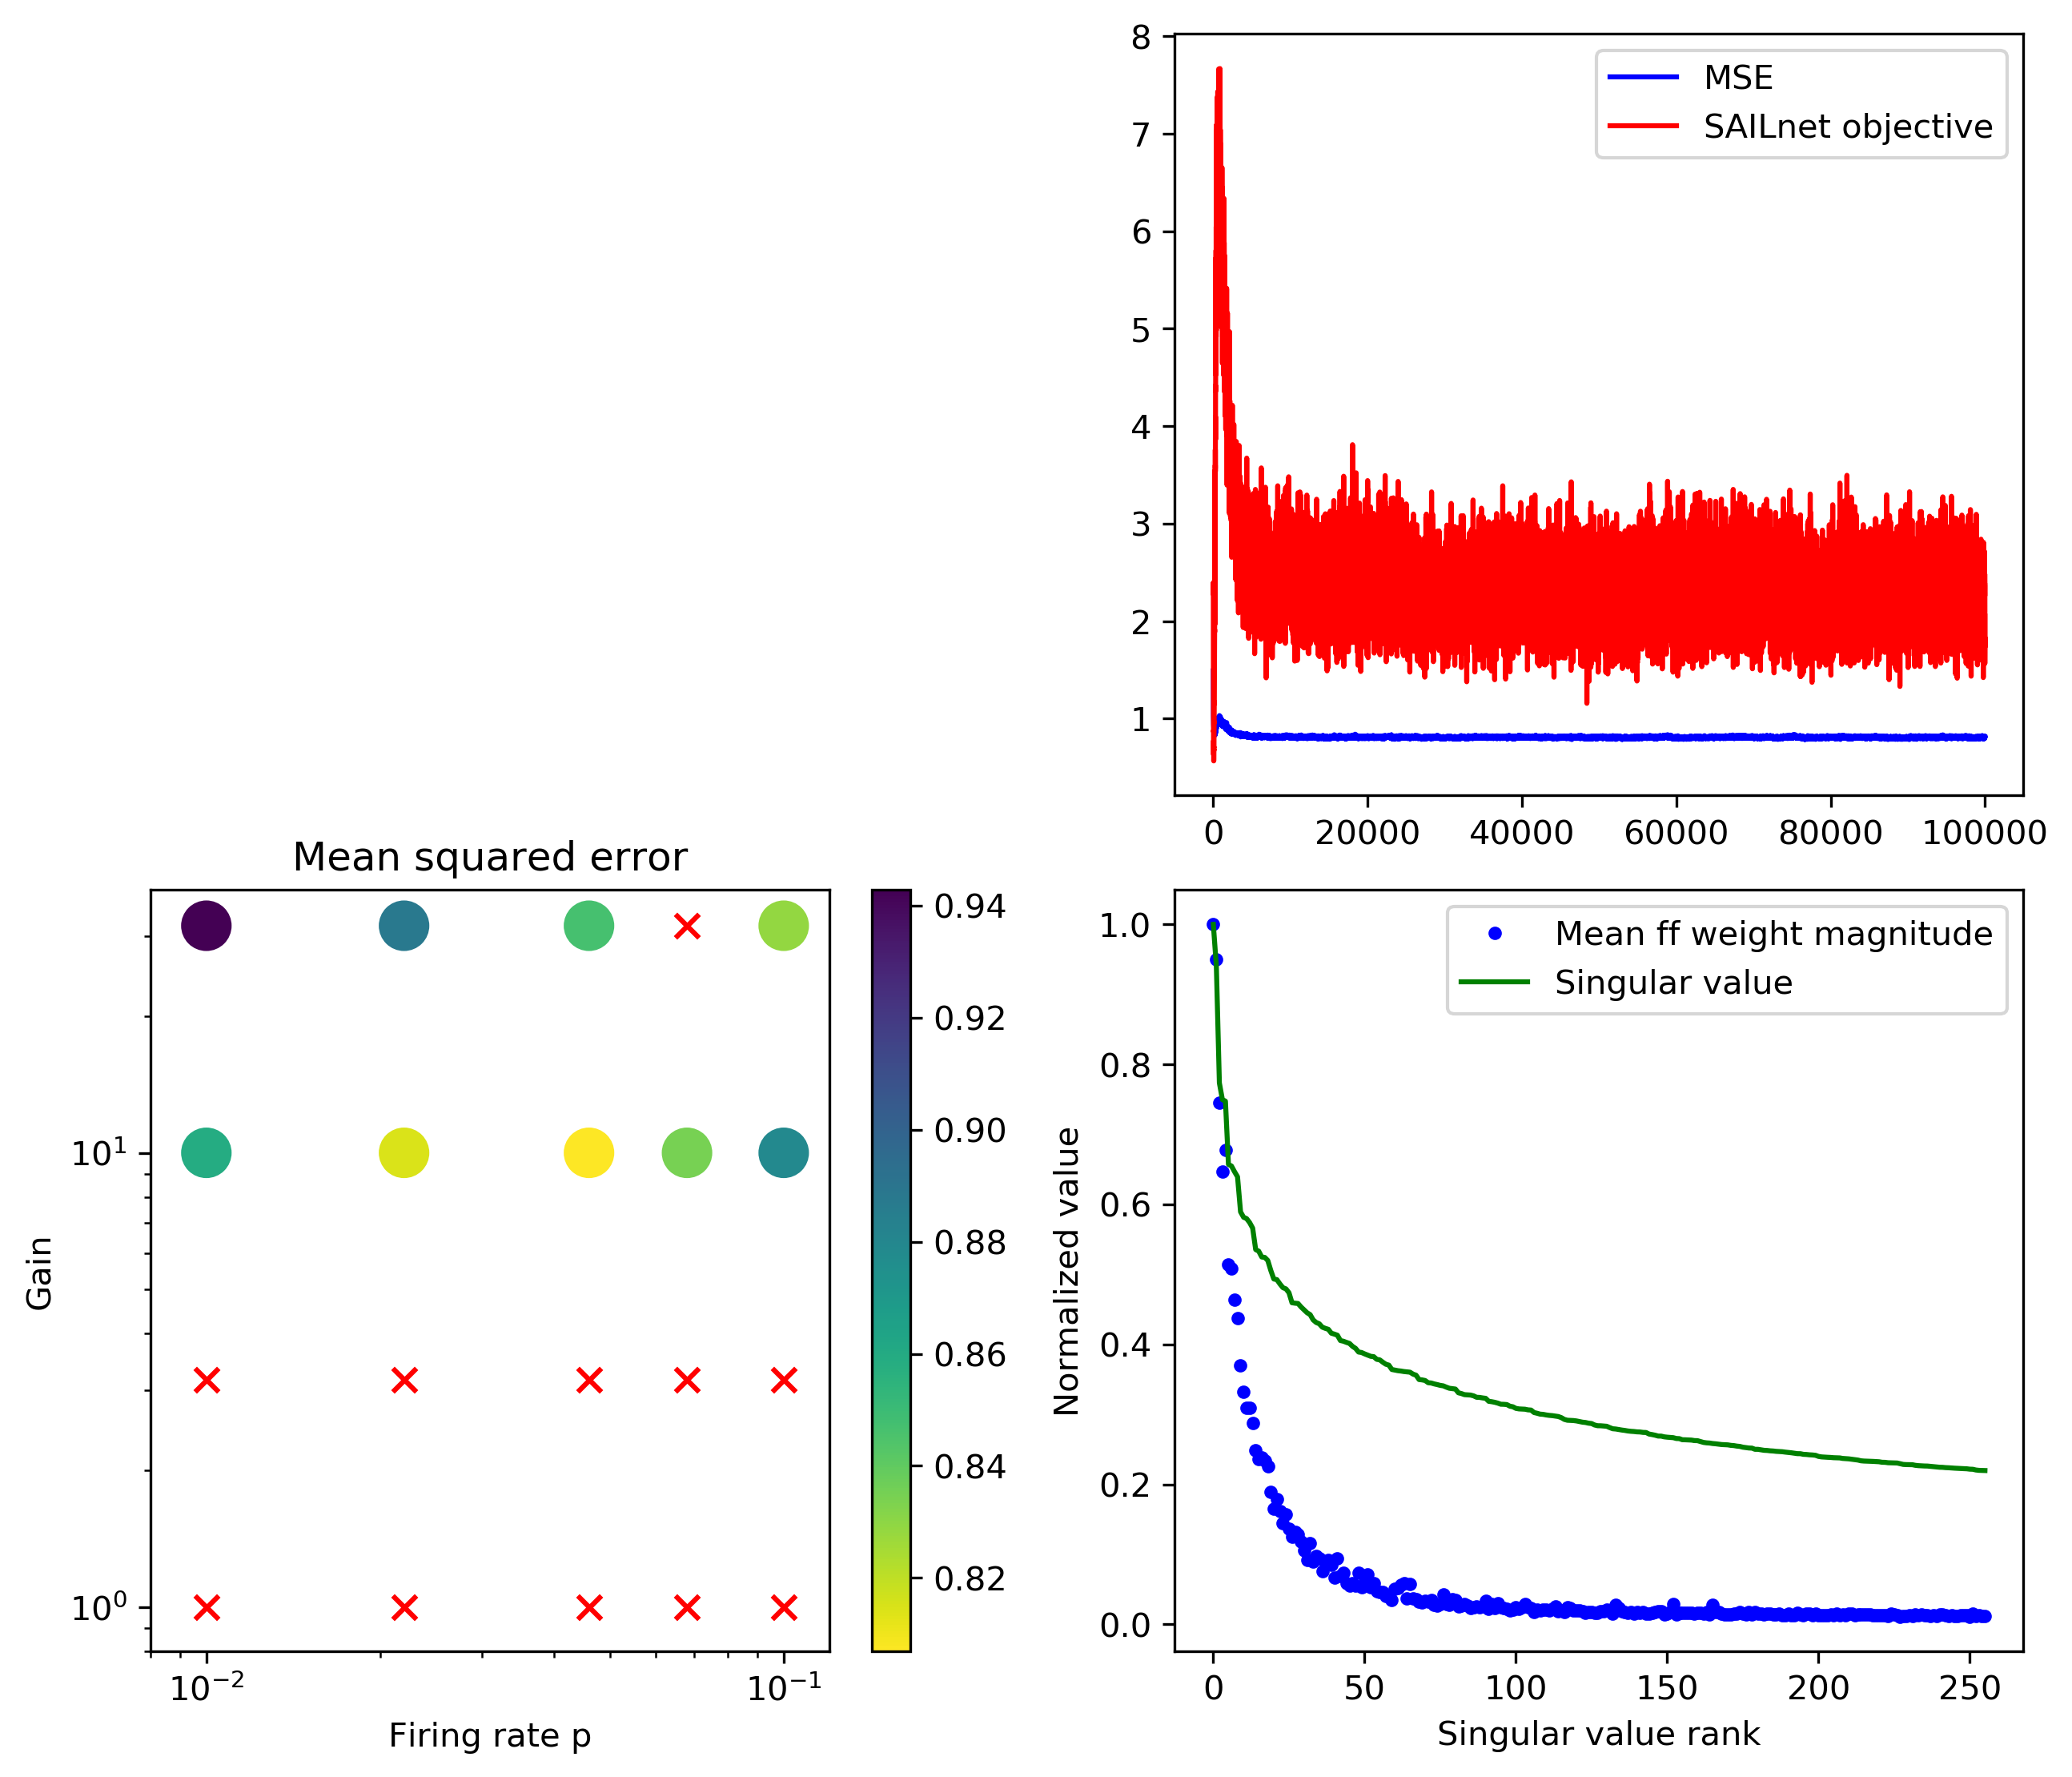

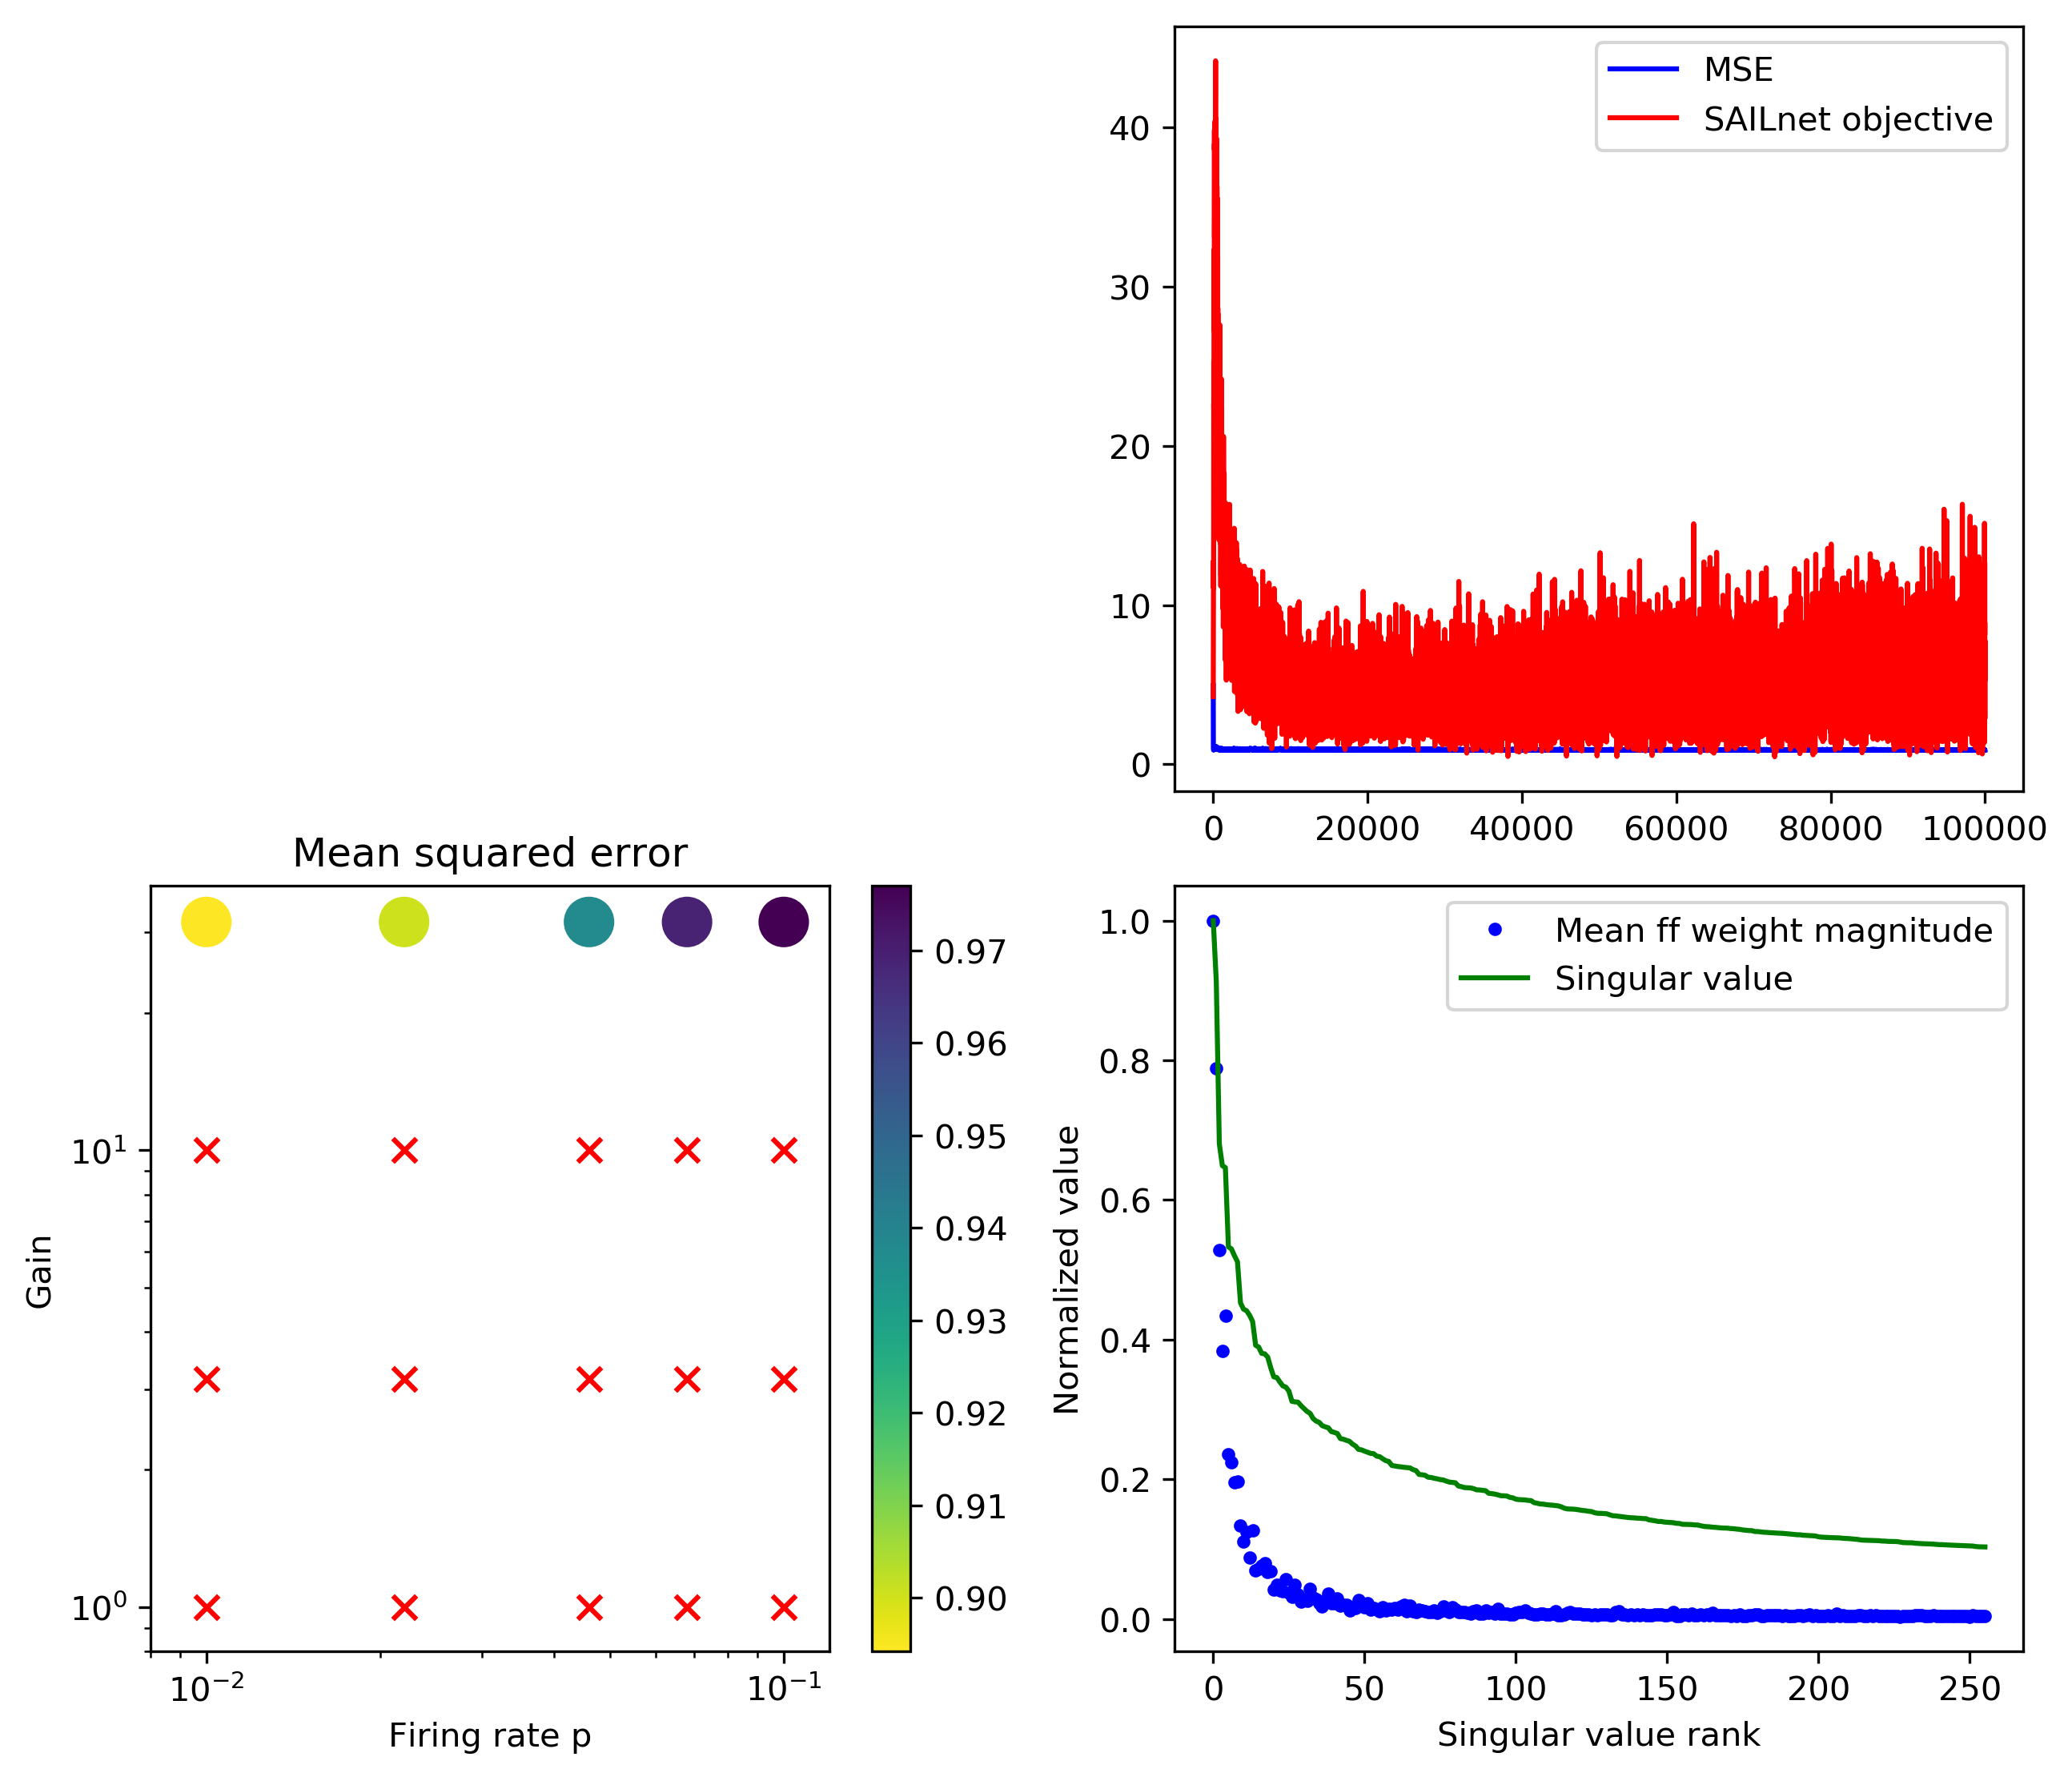

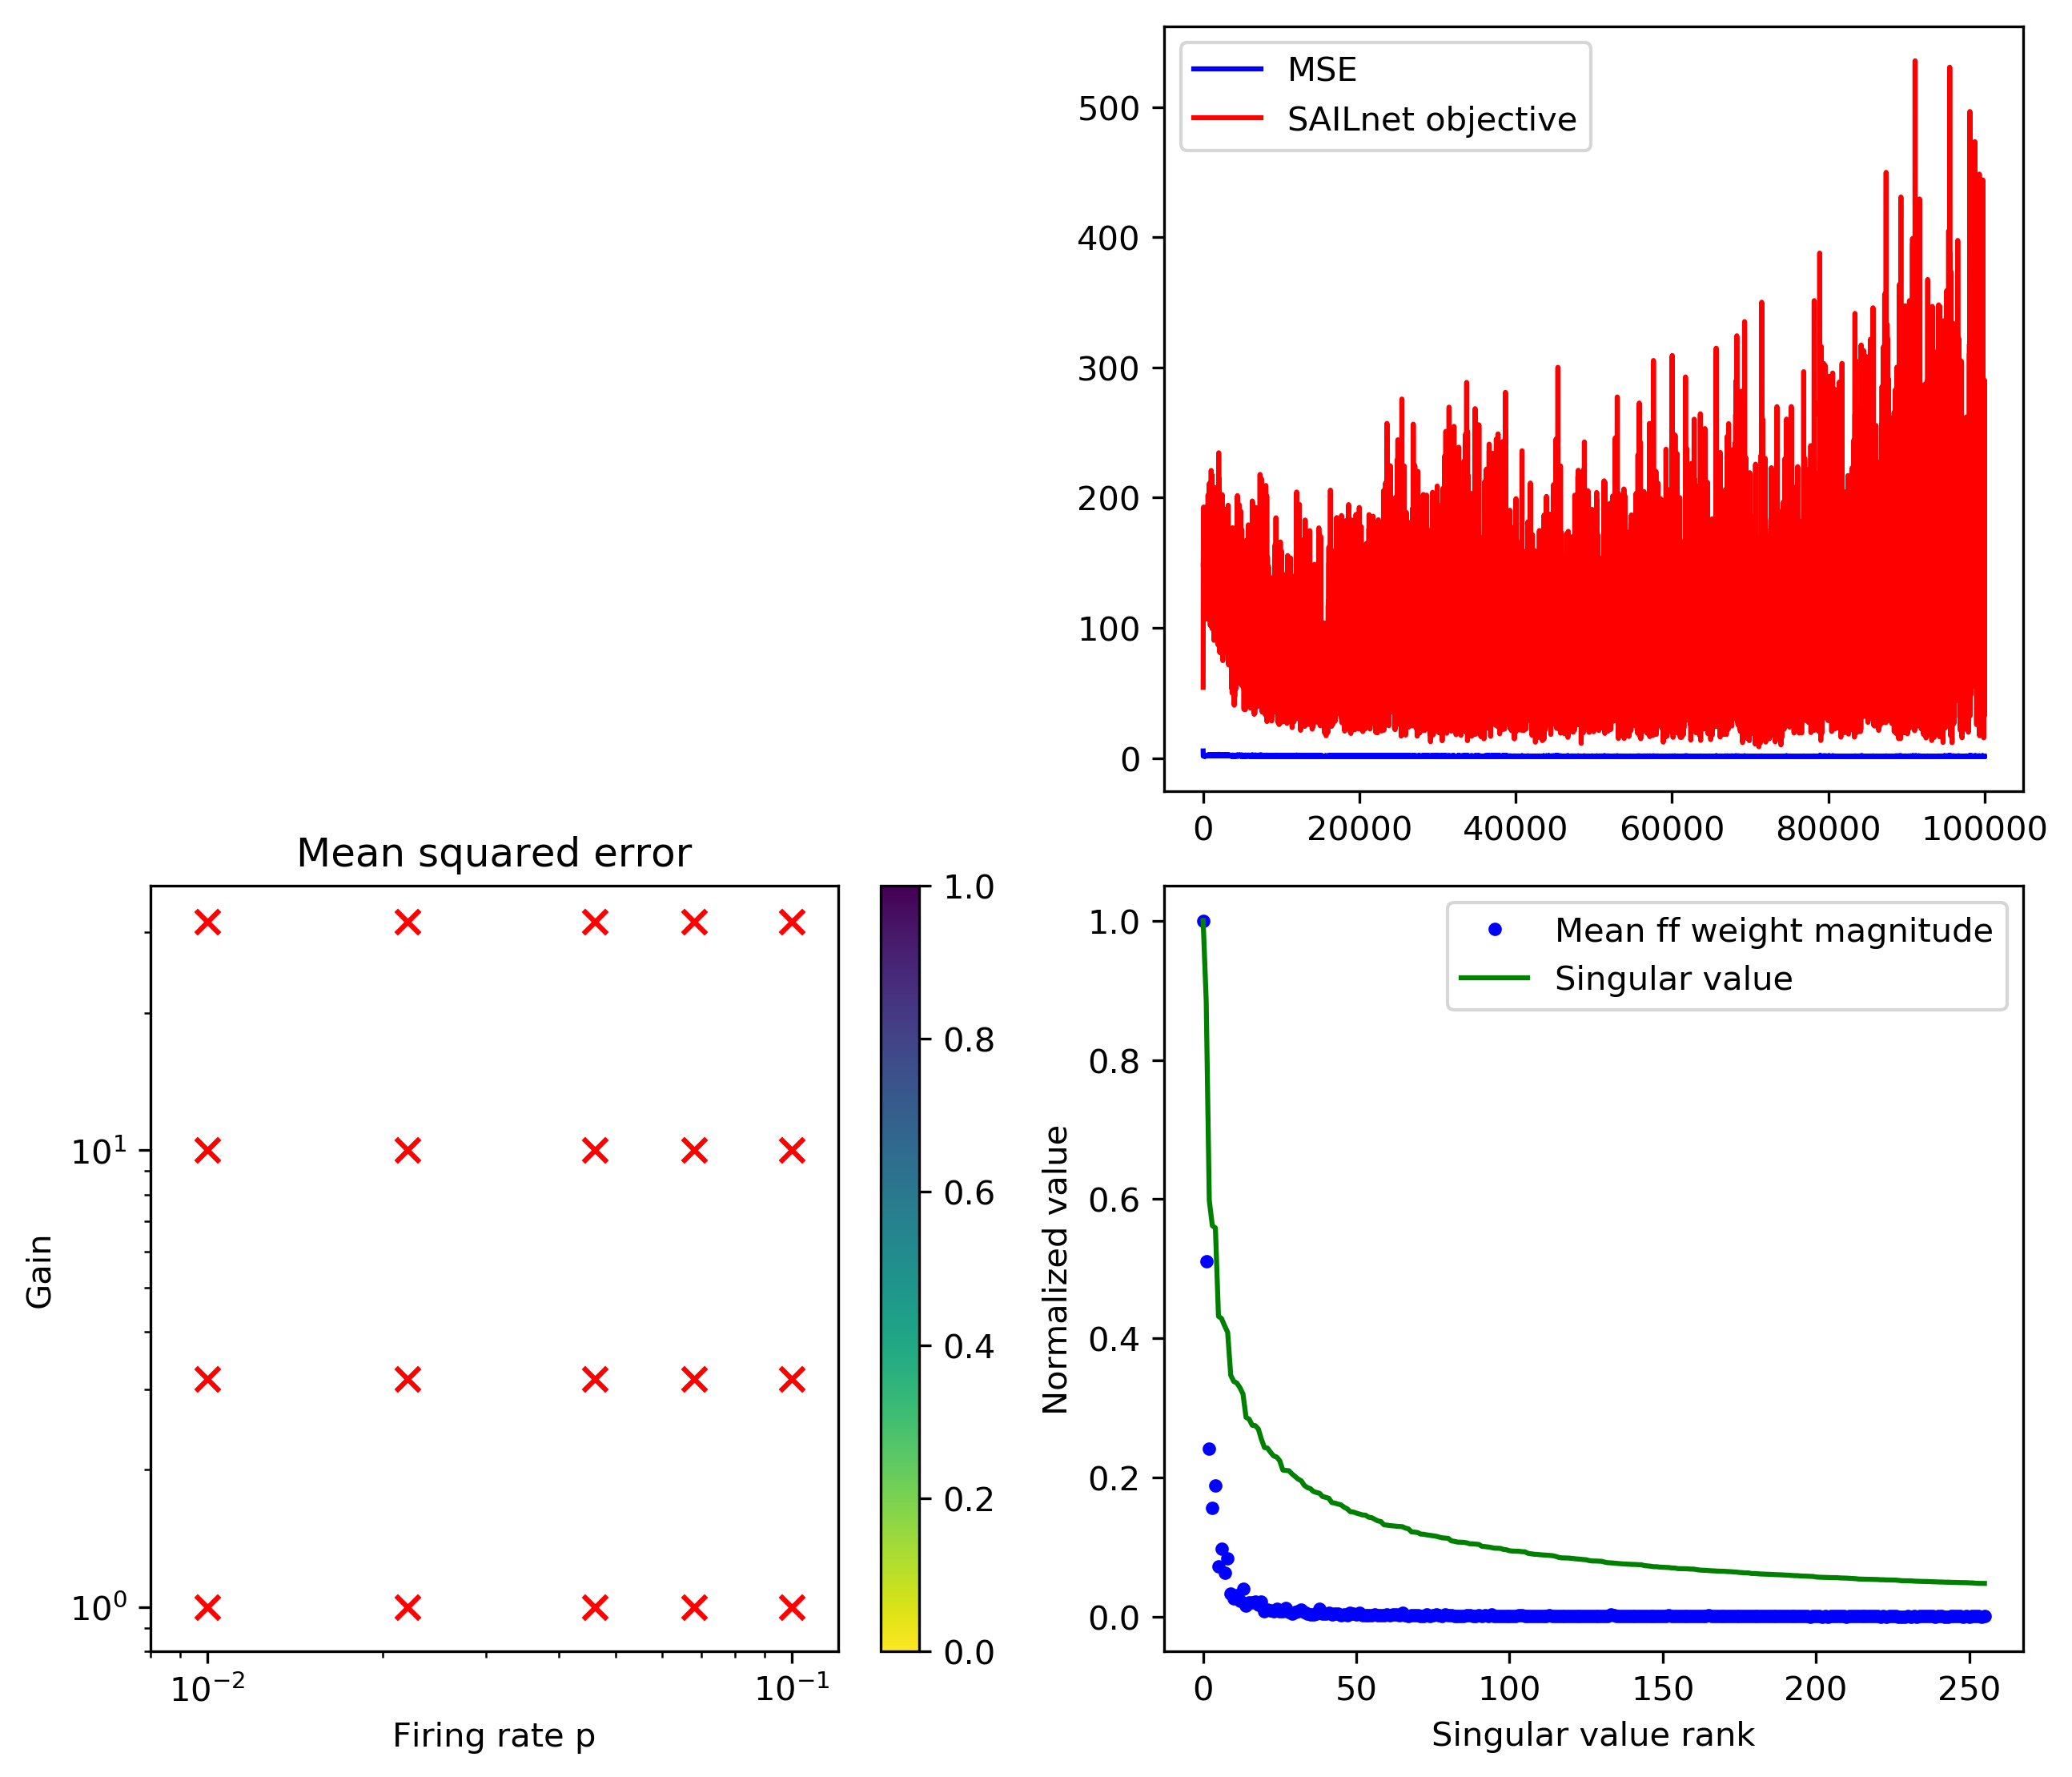

In [6]:
# don't need this for main figs
#ds_vals = np.array([0.0, 0.125, 0.25, 0.5, 0.75, 1.0])
#ims_winners, ims_besterr, ims_figures = utils.all_desphere_results(imnet, data, impca, 'Pickles/natims/', ds_vals, synth=False)

NameError: name 'besterr' is not defined

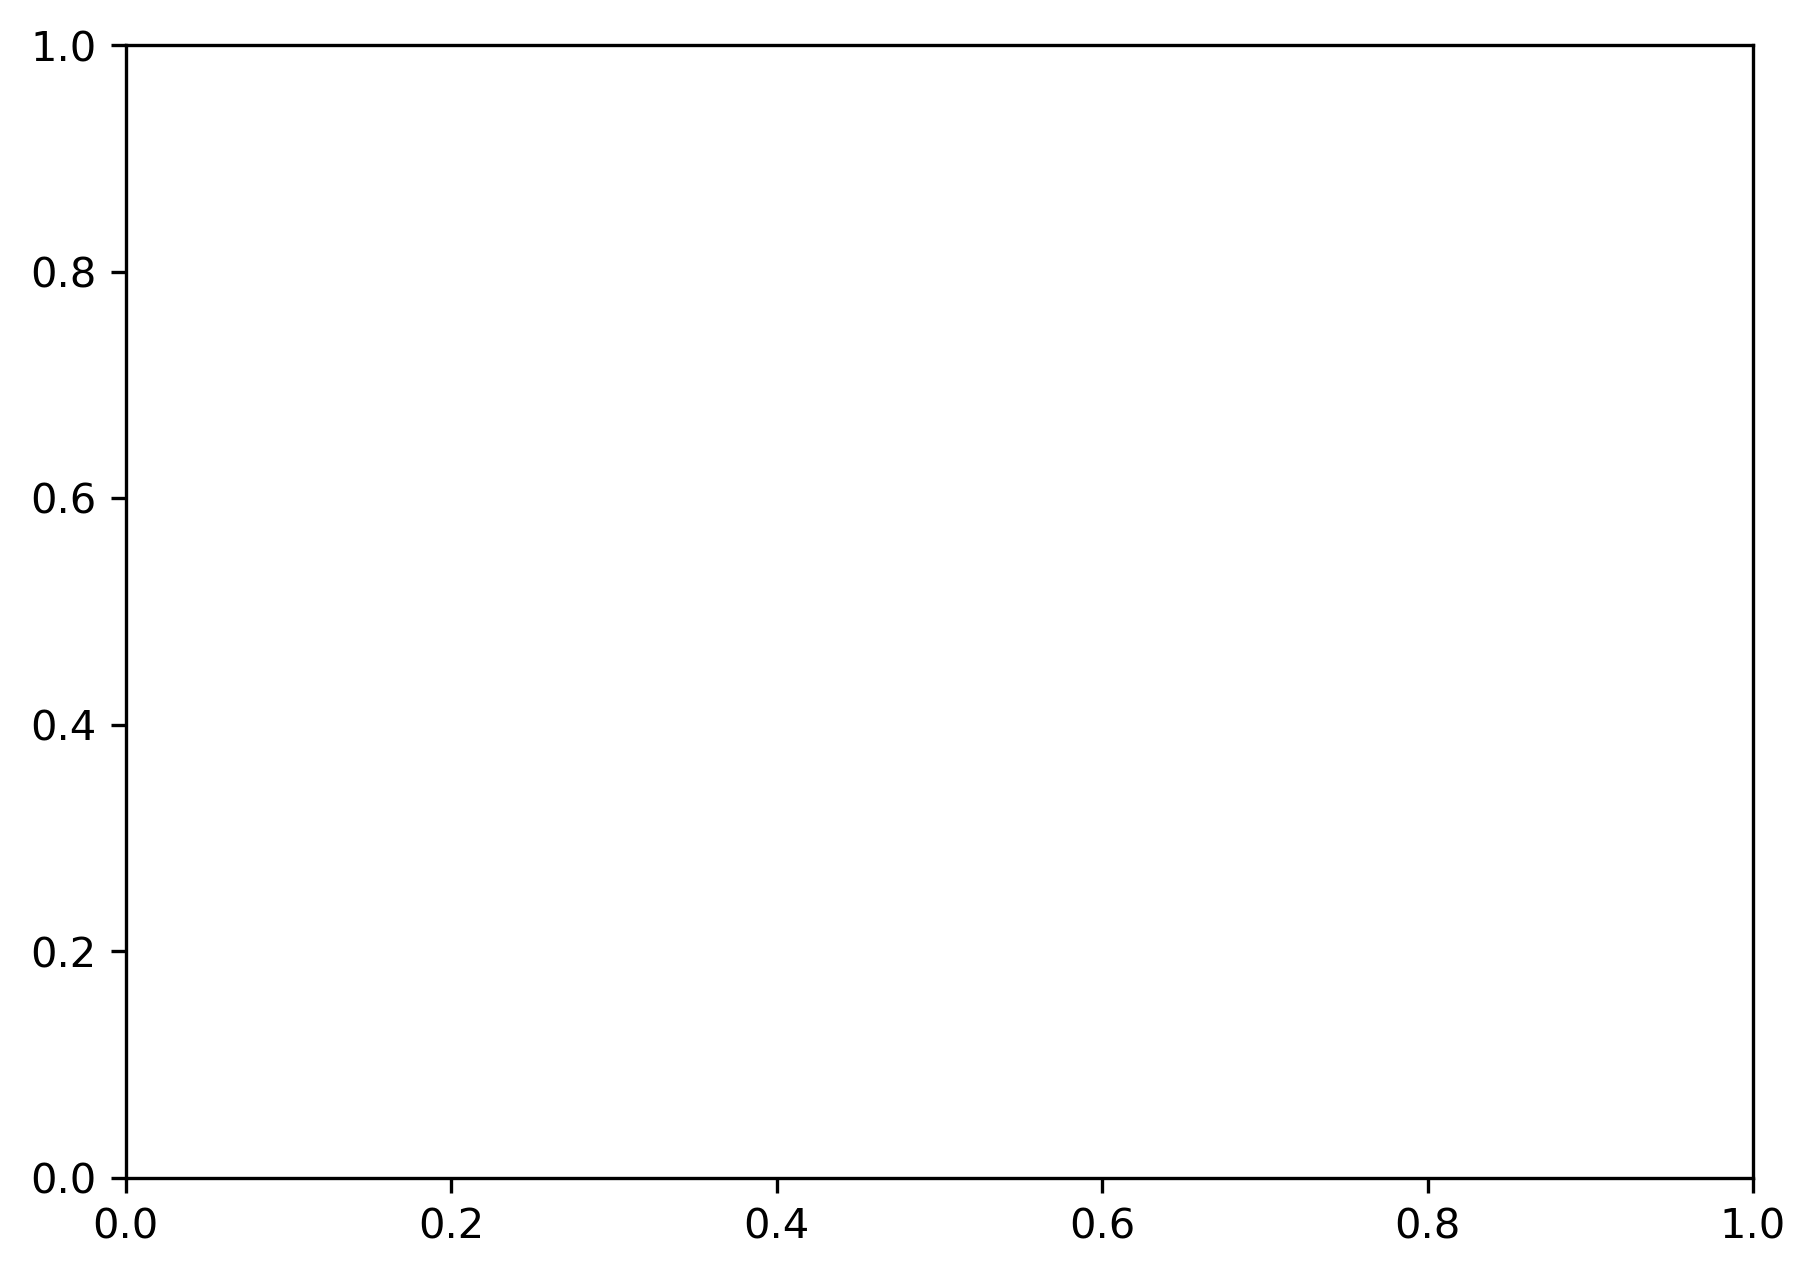

In [5]:
# don't need to run this cell for main figs
#for ii in range(len(ds_vals)):
#    ims_figures[ii].savefig('Figures/natimsds'+str(ds_vals[ii])+'hpetc.png')
#fig = plt.figure(figsize=(7,5))
#ax = fig.add_subplot(111)
#bestsnr = [-10*np.log10(err) for err in besterr]
#SAILline, = ax.plot(ds_vals, bestsnr, 'b-o')
#ax.set_xlabel('Power of singular values')
#ax.set_ylabel('Highest SNR (dB)')
#fig.savefig('Figures/natims_snr_vs_ds.png')

In [7]:
ims_winners

['Pickles/natims/vh32_256ds0.0scaled1.0SAIL1oc0.1p.pickle',
 'Pickles/natims/vh32_256ds0.125scaled3.16SAIL1oc0.1p.pickle',
 'Pickles/natims/vh32_256ds0.25scaled3.16SAIL1oc0.046p.pickle',
 'Pickles/natims/vh32_256ds0.5scaled10.0SAIL1oc0.046p.pickle',
 'Pickles/natims/vh32_256ds0.75scaled31.6SAIL1oc0.01p.pickle',
 'Pickles/natims/vh32_256ds1.0scaled31.6SAIL1oc0.01p.pickle']

In [ ]:
# instead just do this
ims_winners = ['Pickles/natims/vh32_256ds0.0scaled1.0SAIL1oc0.1p.pickle',
 'Pickles/natims/vh32_256ds0.125scaled3.16SAIL1oc0.1p.pickle',
 'Pickles/natims/vh32_256ds0.25scaled3.16SAIL1oc0.046p.pickle',
 'Pickles/natims/vh32_256ds0.5scaled10.0SAIL1oc0.046p.pickle',
 'Pickles/natims/vh32_256ds0.75scaled31.6SAIL1oc0.01p.pickle',
 'Pickles/natims/vh32_256ds1.0scaled31.6SAIL1oc0.01p.pickle']

In [49]:
imlca = tf_lca.LCALearner(data=data, nunits=numunits, pca=impca, stimshape=origshape, lam=0.1,
                        snr_goal=15,
                        learnrate=50.0,
                        infrate=0.1,
                        niter=200,
                        seek_snr_rate=0.0001,
                        threshfunc='soft')
imlca.load('Pickles/conventional/completeLCA_white.pickle')

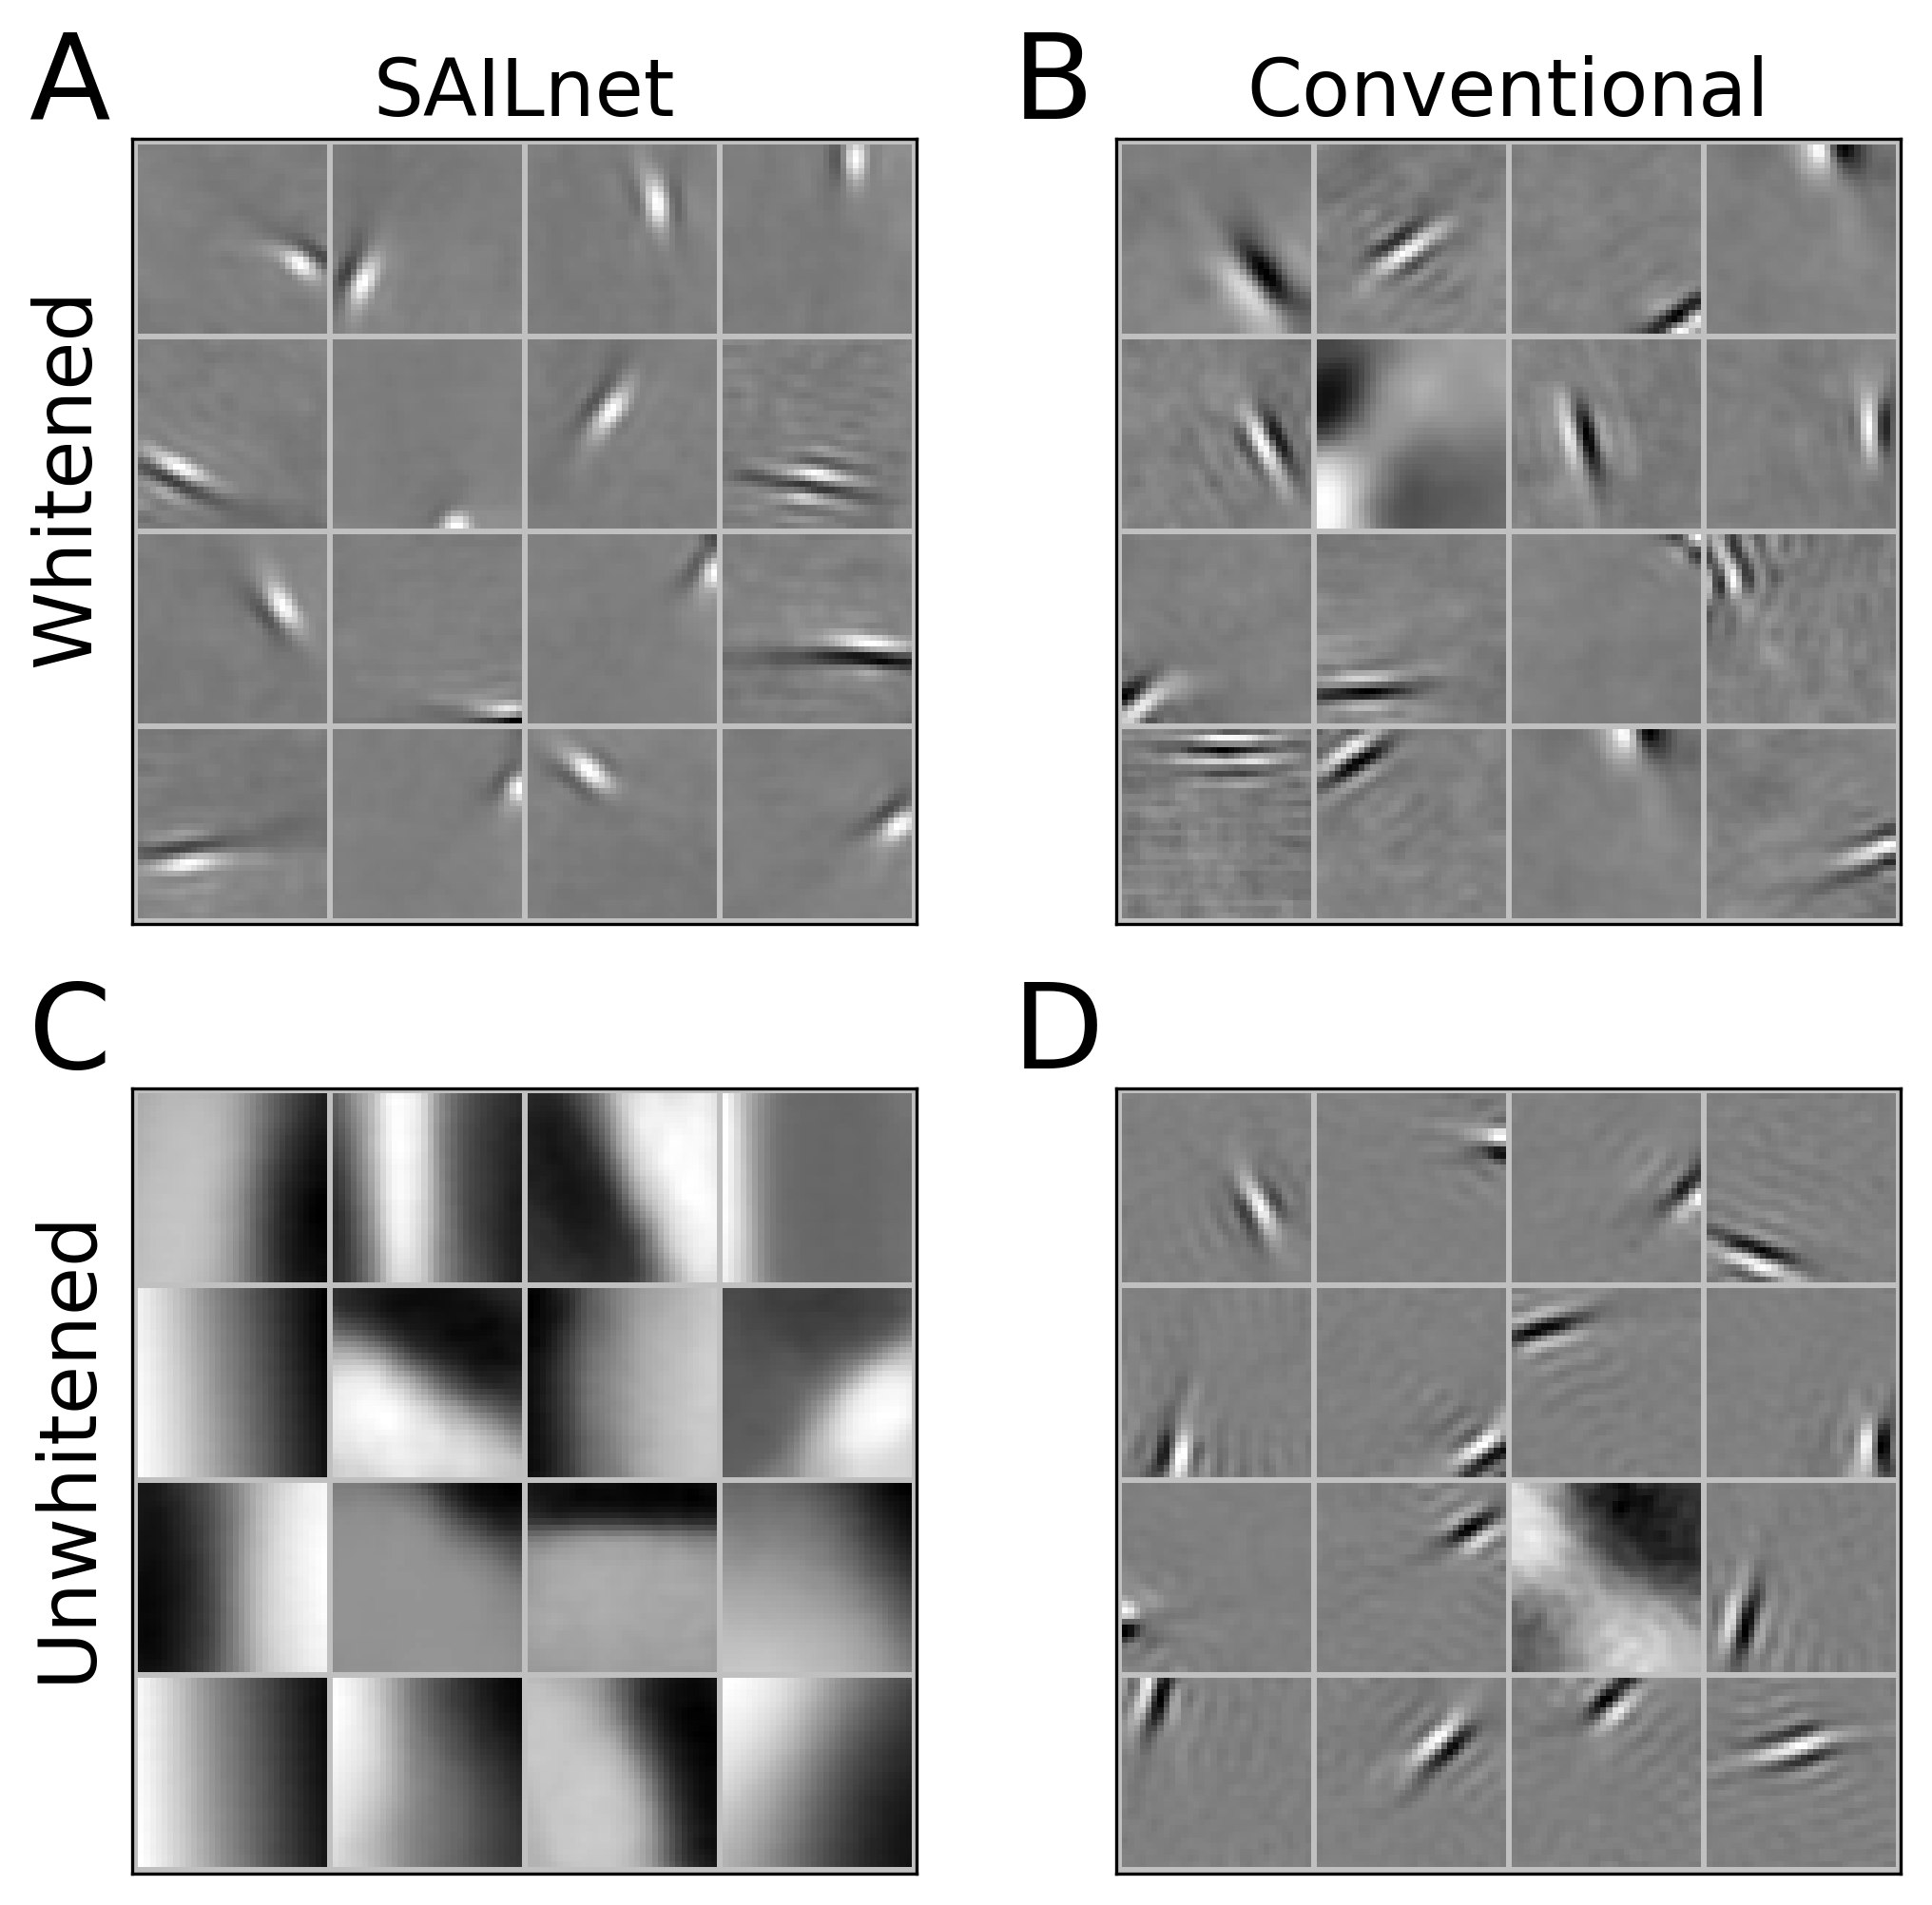

In [7]:
layout = [4,4]
fig, axes = plt.subplots(2, 2, squeeze=True, figsize=[7.5, 7.5])
net.load(ims_winners[0])

txtsize = 20

utils.examples_im(net, axes[0,0], whiten=True)
axes[0,0].set_title('SAILnet', size=txtsize)
axes[0,0].text(-18,35,'Whitened',rotation=90, size=txtsize)

lca.load('Pickles/conventional/completeLCA_white.pickle')
utils.examples_im(lca, axes[0,1], whiten=True)
axes[0,1].set_title('Conventional', size=txtsize)

net.load(ims_winners[-1])
utils.examples_im(net, axes[1,0], whiten=False)
axes[1,0].text(-18, 30, 'Unwhitened', rotation=90, size=txtsize)

lca.load('Pickles/conventional/completeLCA_unwhite2.pickle')
utils.examples_im(lca, axes[1,1], whiten=False)


labels = ['A', 'B', 'C', 'D']
for ii in range(len(labels)):
    axes.flatten()[ii].text(-18,-4,labels[ii], size=30)

fig.tight_layout(pad=4.0)
fig.savefig('Figures/2x2natims_examples.png', bbox_inches='tight')

In [8]:
numinput = 256
toy = StimSet.ToySparseSet(dim = numinput, nonneg=True, scale=1.0,
                           noise=0.1, white=False)

In [39]:
SAILFitter = fitlearners.make_fit_learner_class(SAILmods.VarTimeSAILnet)
LCAFitter = fitlearners.make_fit_learner_class(tf_lca.LCALearner)
net = SAILFitter(data=toy, nunits=numunits, ninput=numinput)
lcafit = LCAFitter(data=toy, nunits=numunits, threshfunc='soft')

Errors on  20  files
Parameters of the best-fitting model: 
p =  0.01
gain =  3.16
mse =  0.8502297203036266
model fit =  0.9667086378642628
Errors on  20  files
Parameters of the best-fitting model: 
p =  0.01
gain =  3.16
mse =  0.8504580630448816
model fit =  0.9576927755061078
Errors on  20  files
Parameters of the best-fitting model: 
p =  0.01
gain =  10.0
mse =  0.9229121272116981
model fit =  0.9256561295609054
Errors on  20  files
Parameters of the best-fitting model: 
p =  0.068
gain =  10.0
mse =  0.8539993529011972
model fit =  0.5813694663998092
Errors on  20  files
Parameters of the best-fitting model: 
p =  0.1
gain =  3.16
mse =  2.861985405379762
model fit =  0.21412852247715805


/home/eric/anaconda3/envs/tflow/lib/python3.6/site-packages/numpy/linalg/linalg.py:2286: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/eric/anaconda3/envs/tflow/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Errors on  20  files
Parameters of the best-fitting model: 
p =  0.1
gain =  10.0
mse =  4.127552495279889
model fit =  0.1654523143537826


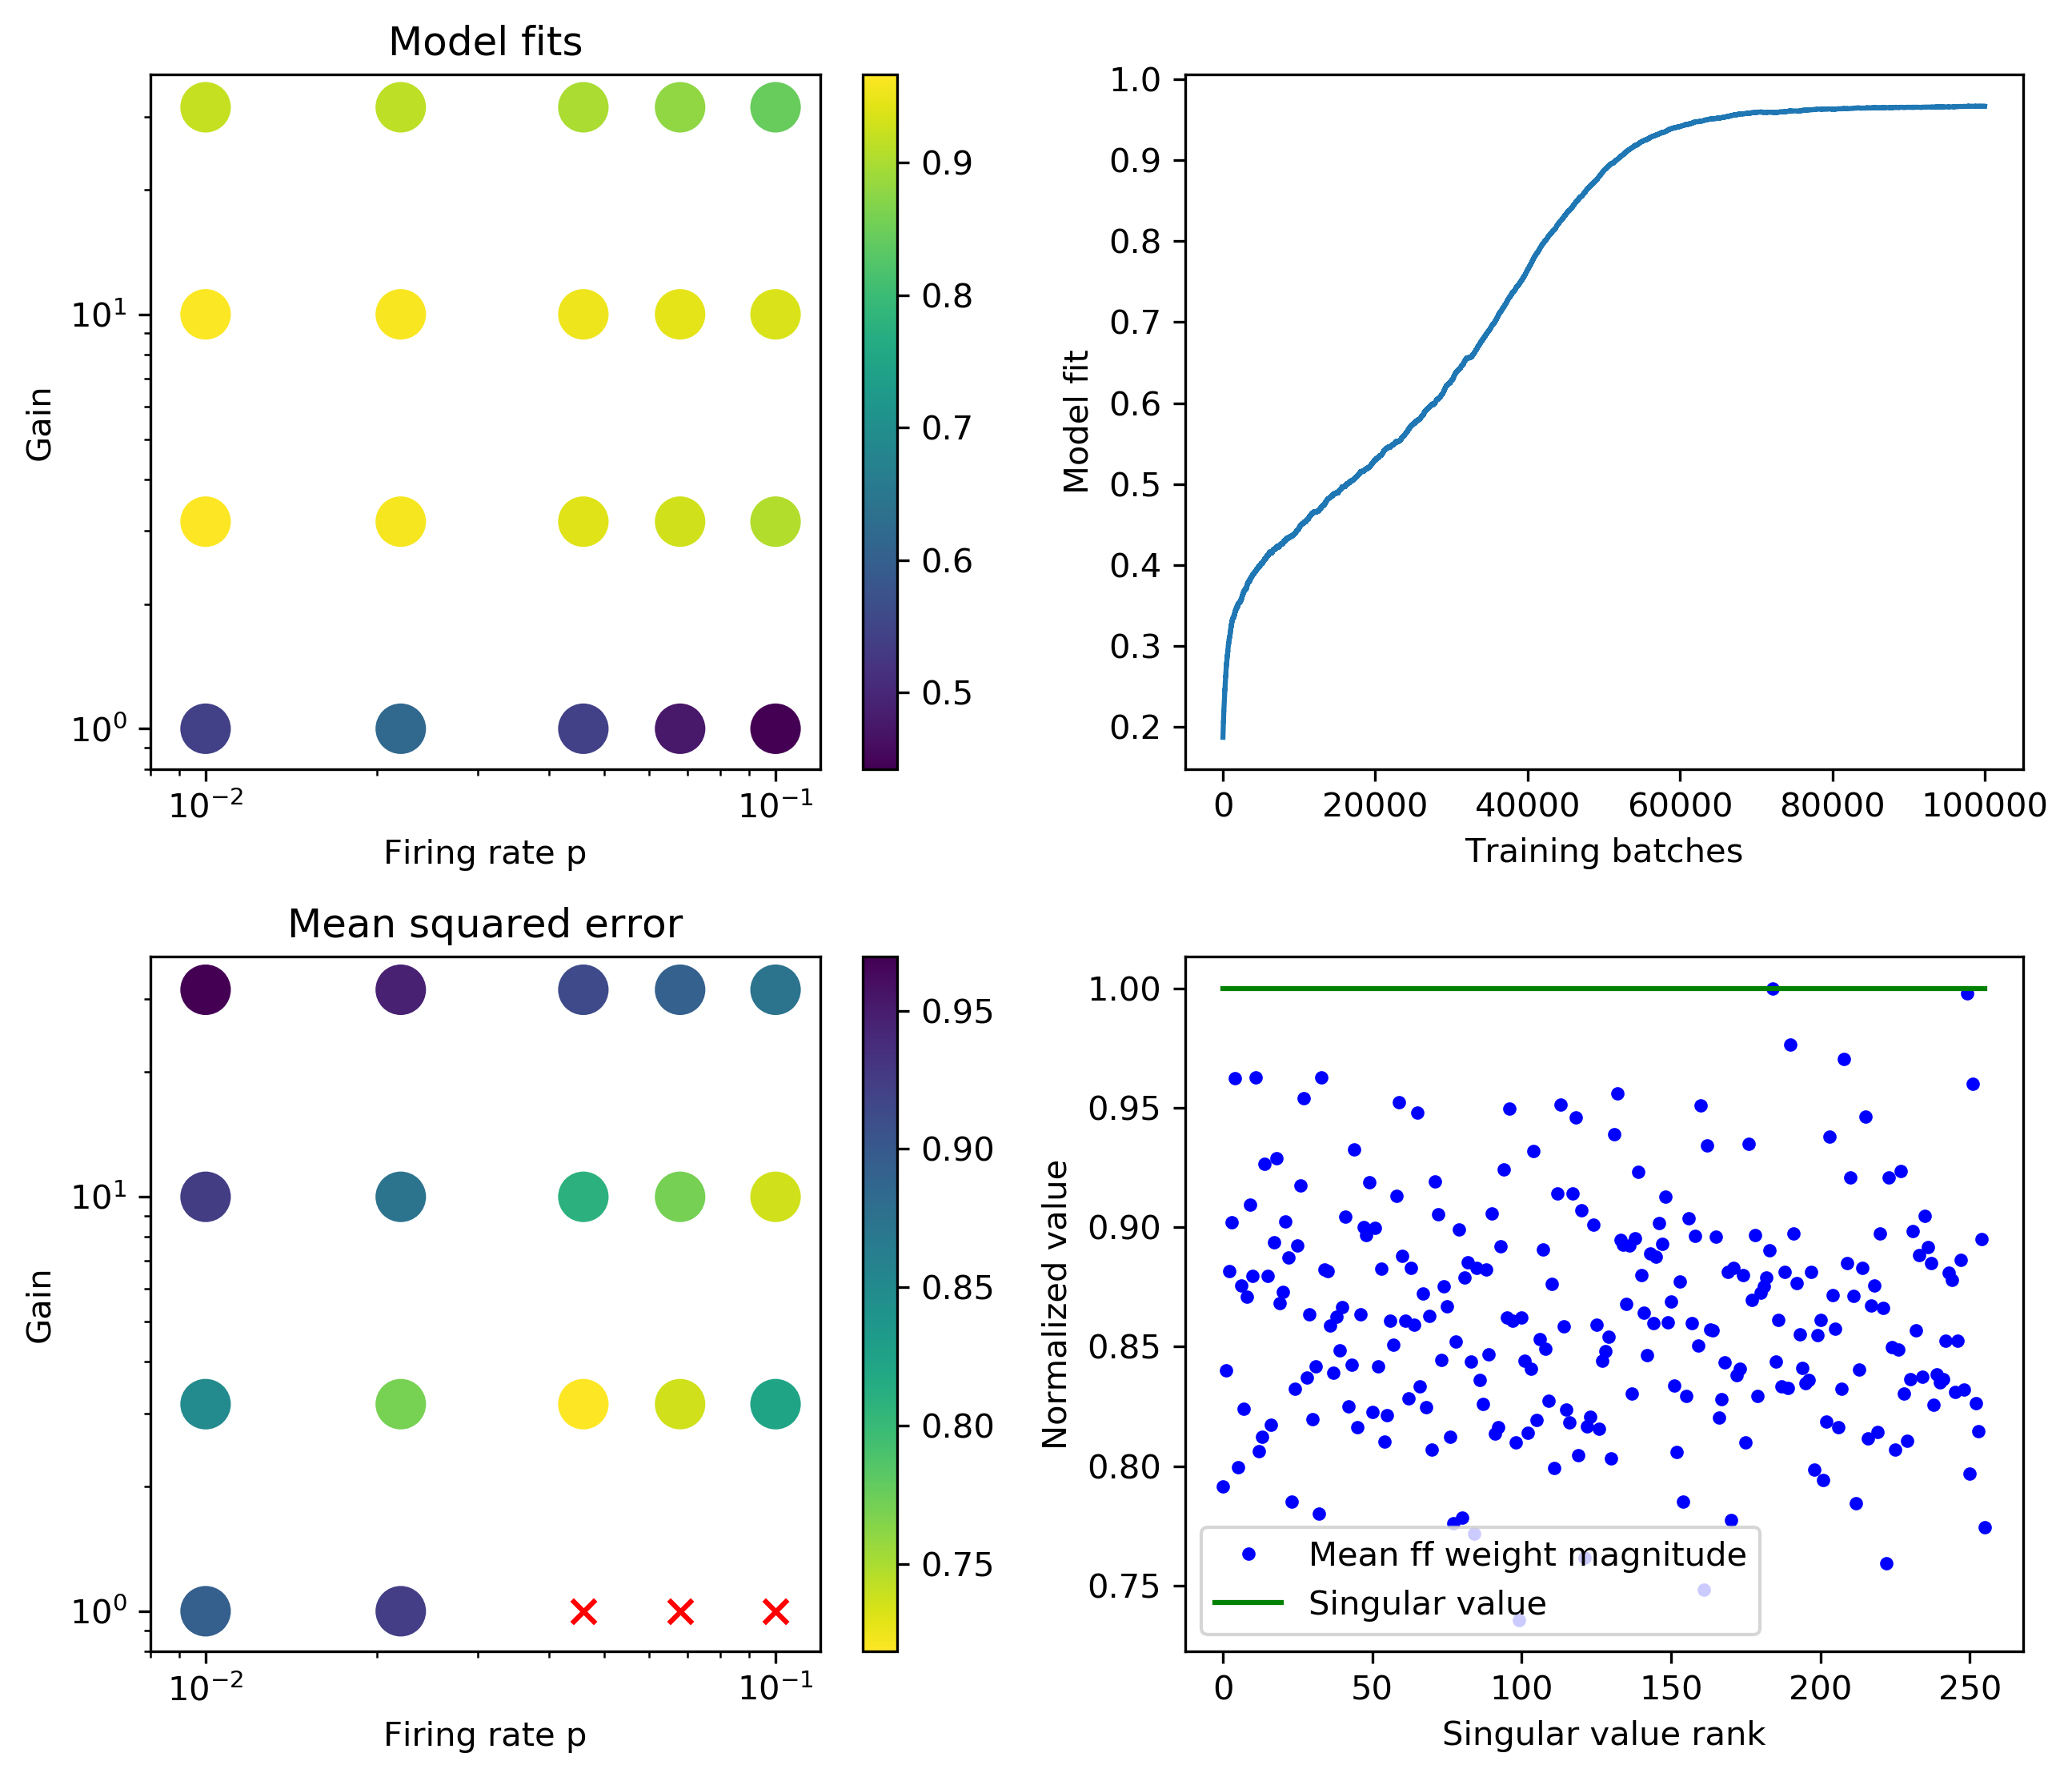

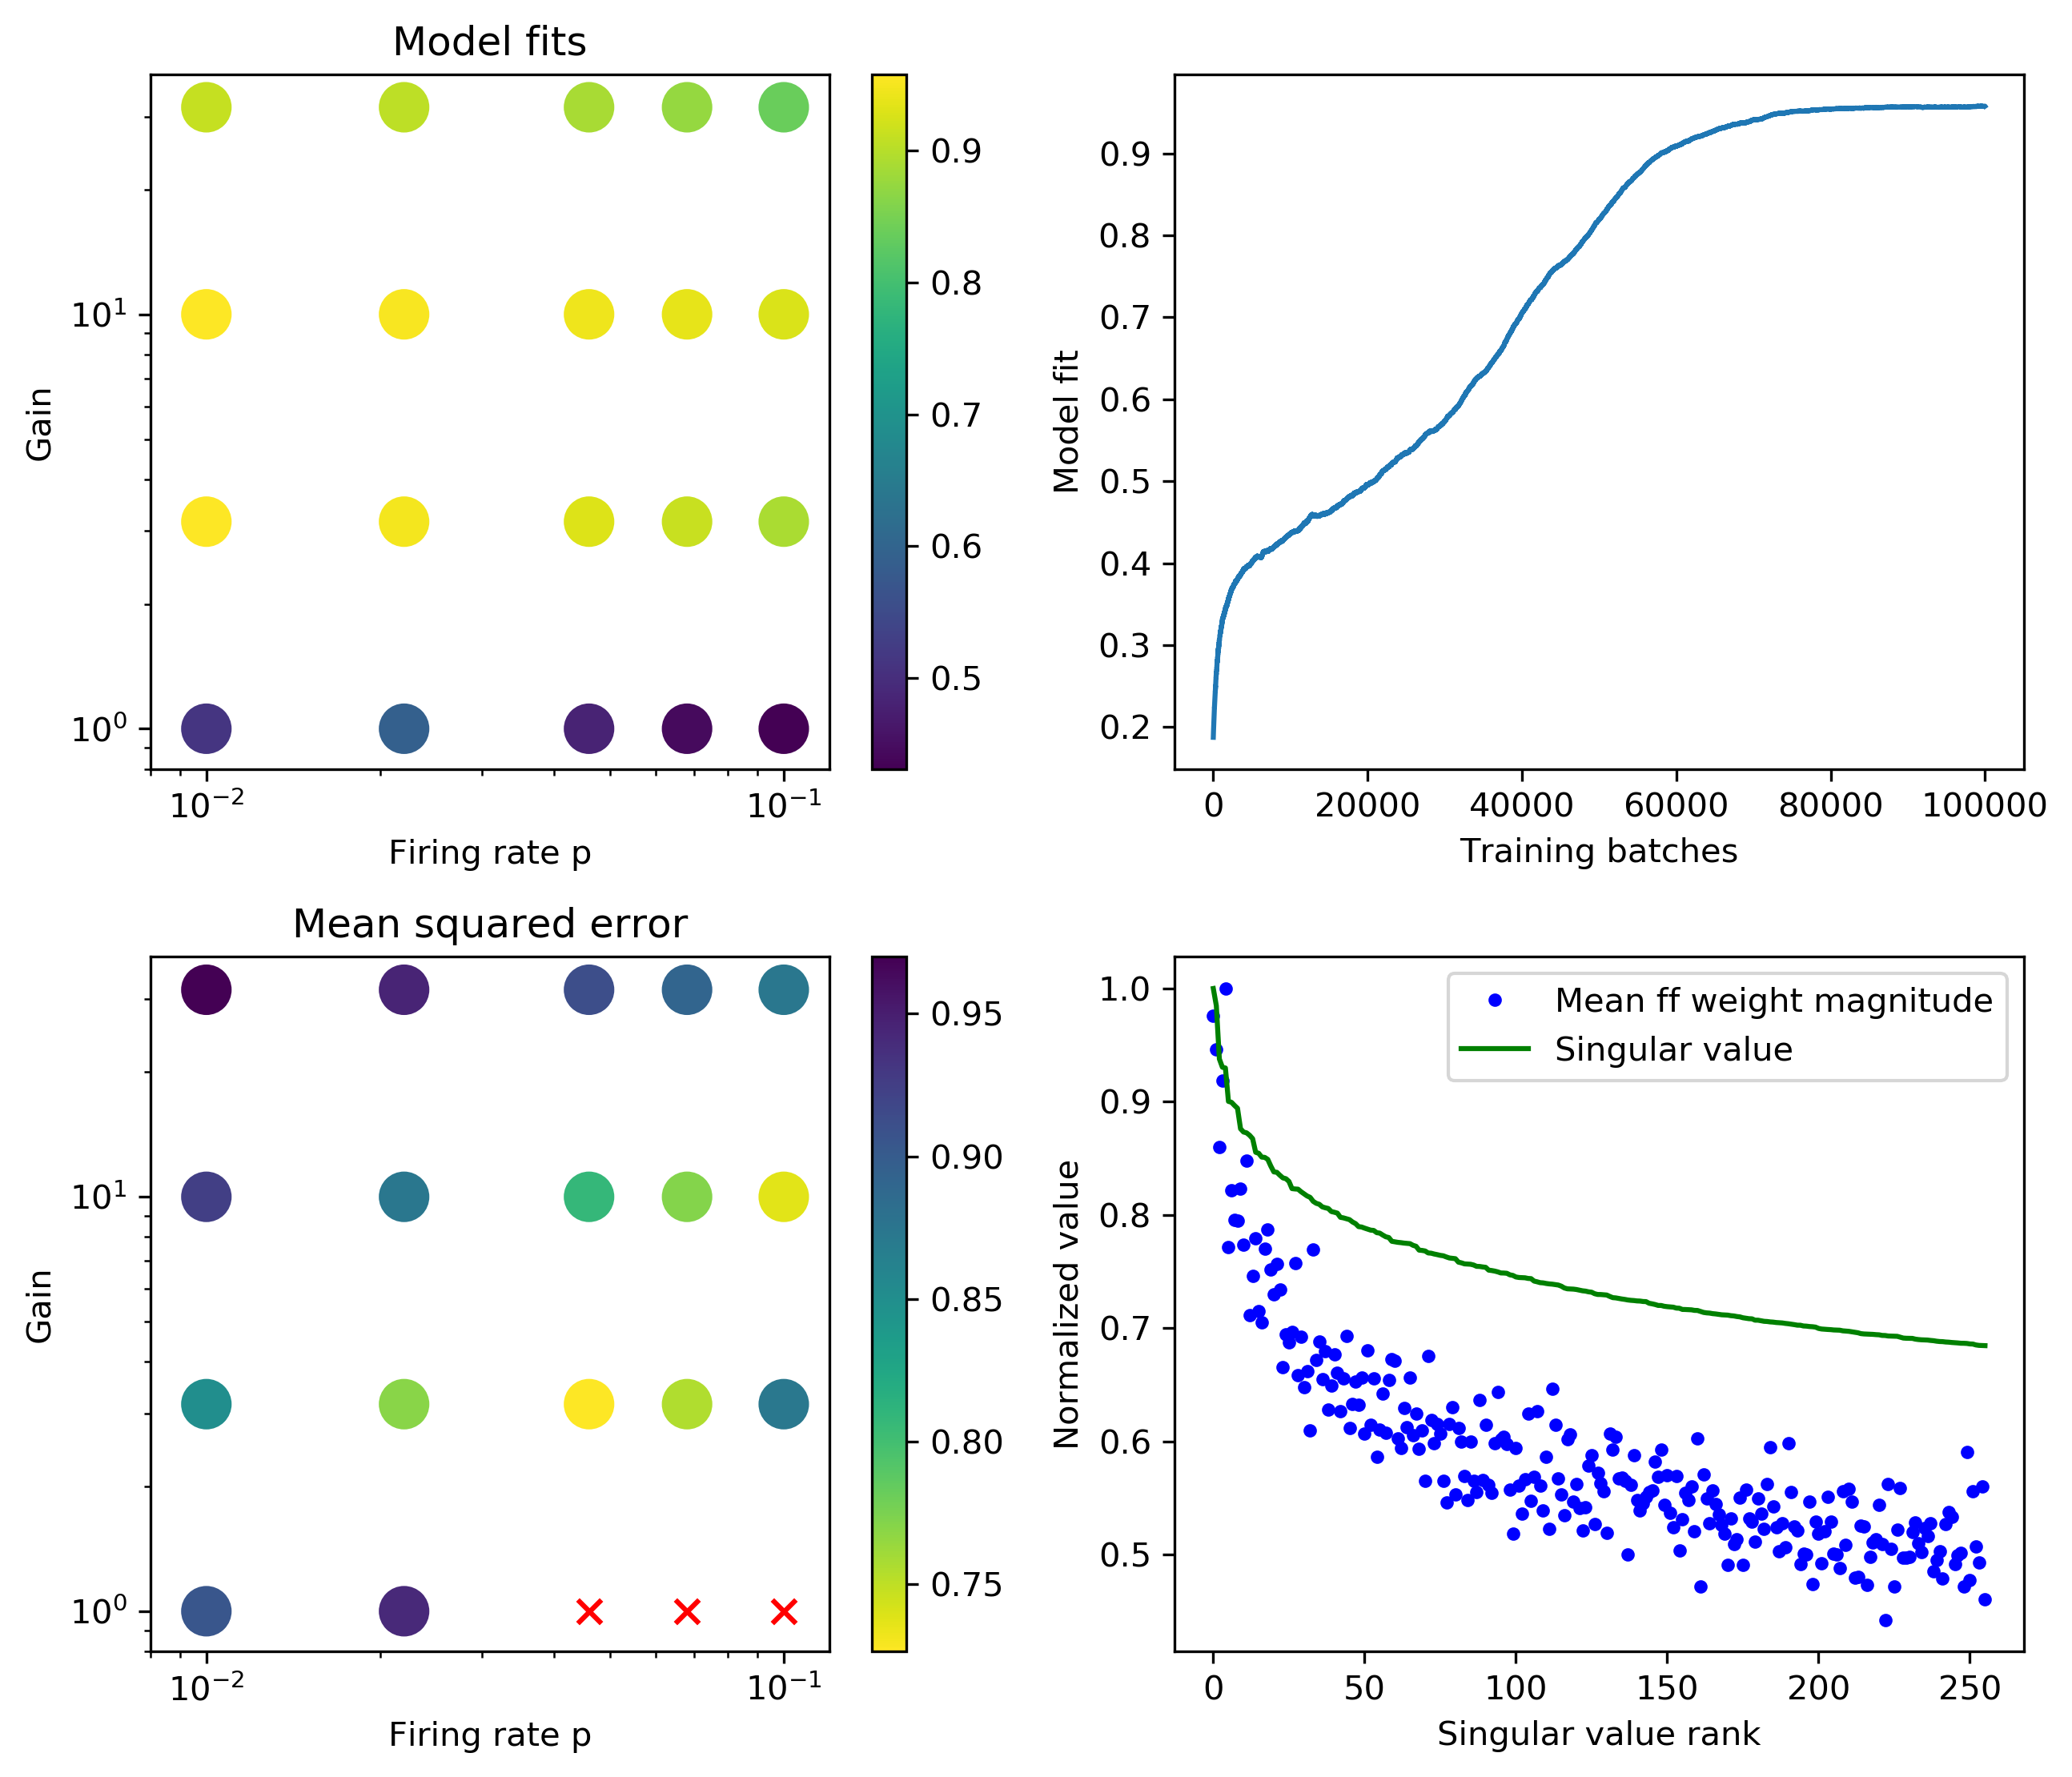

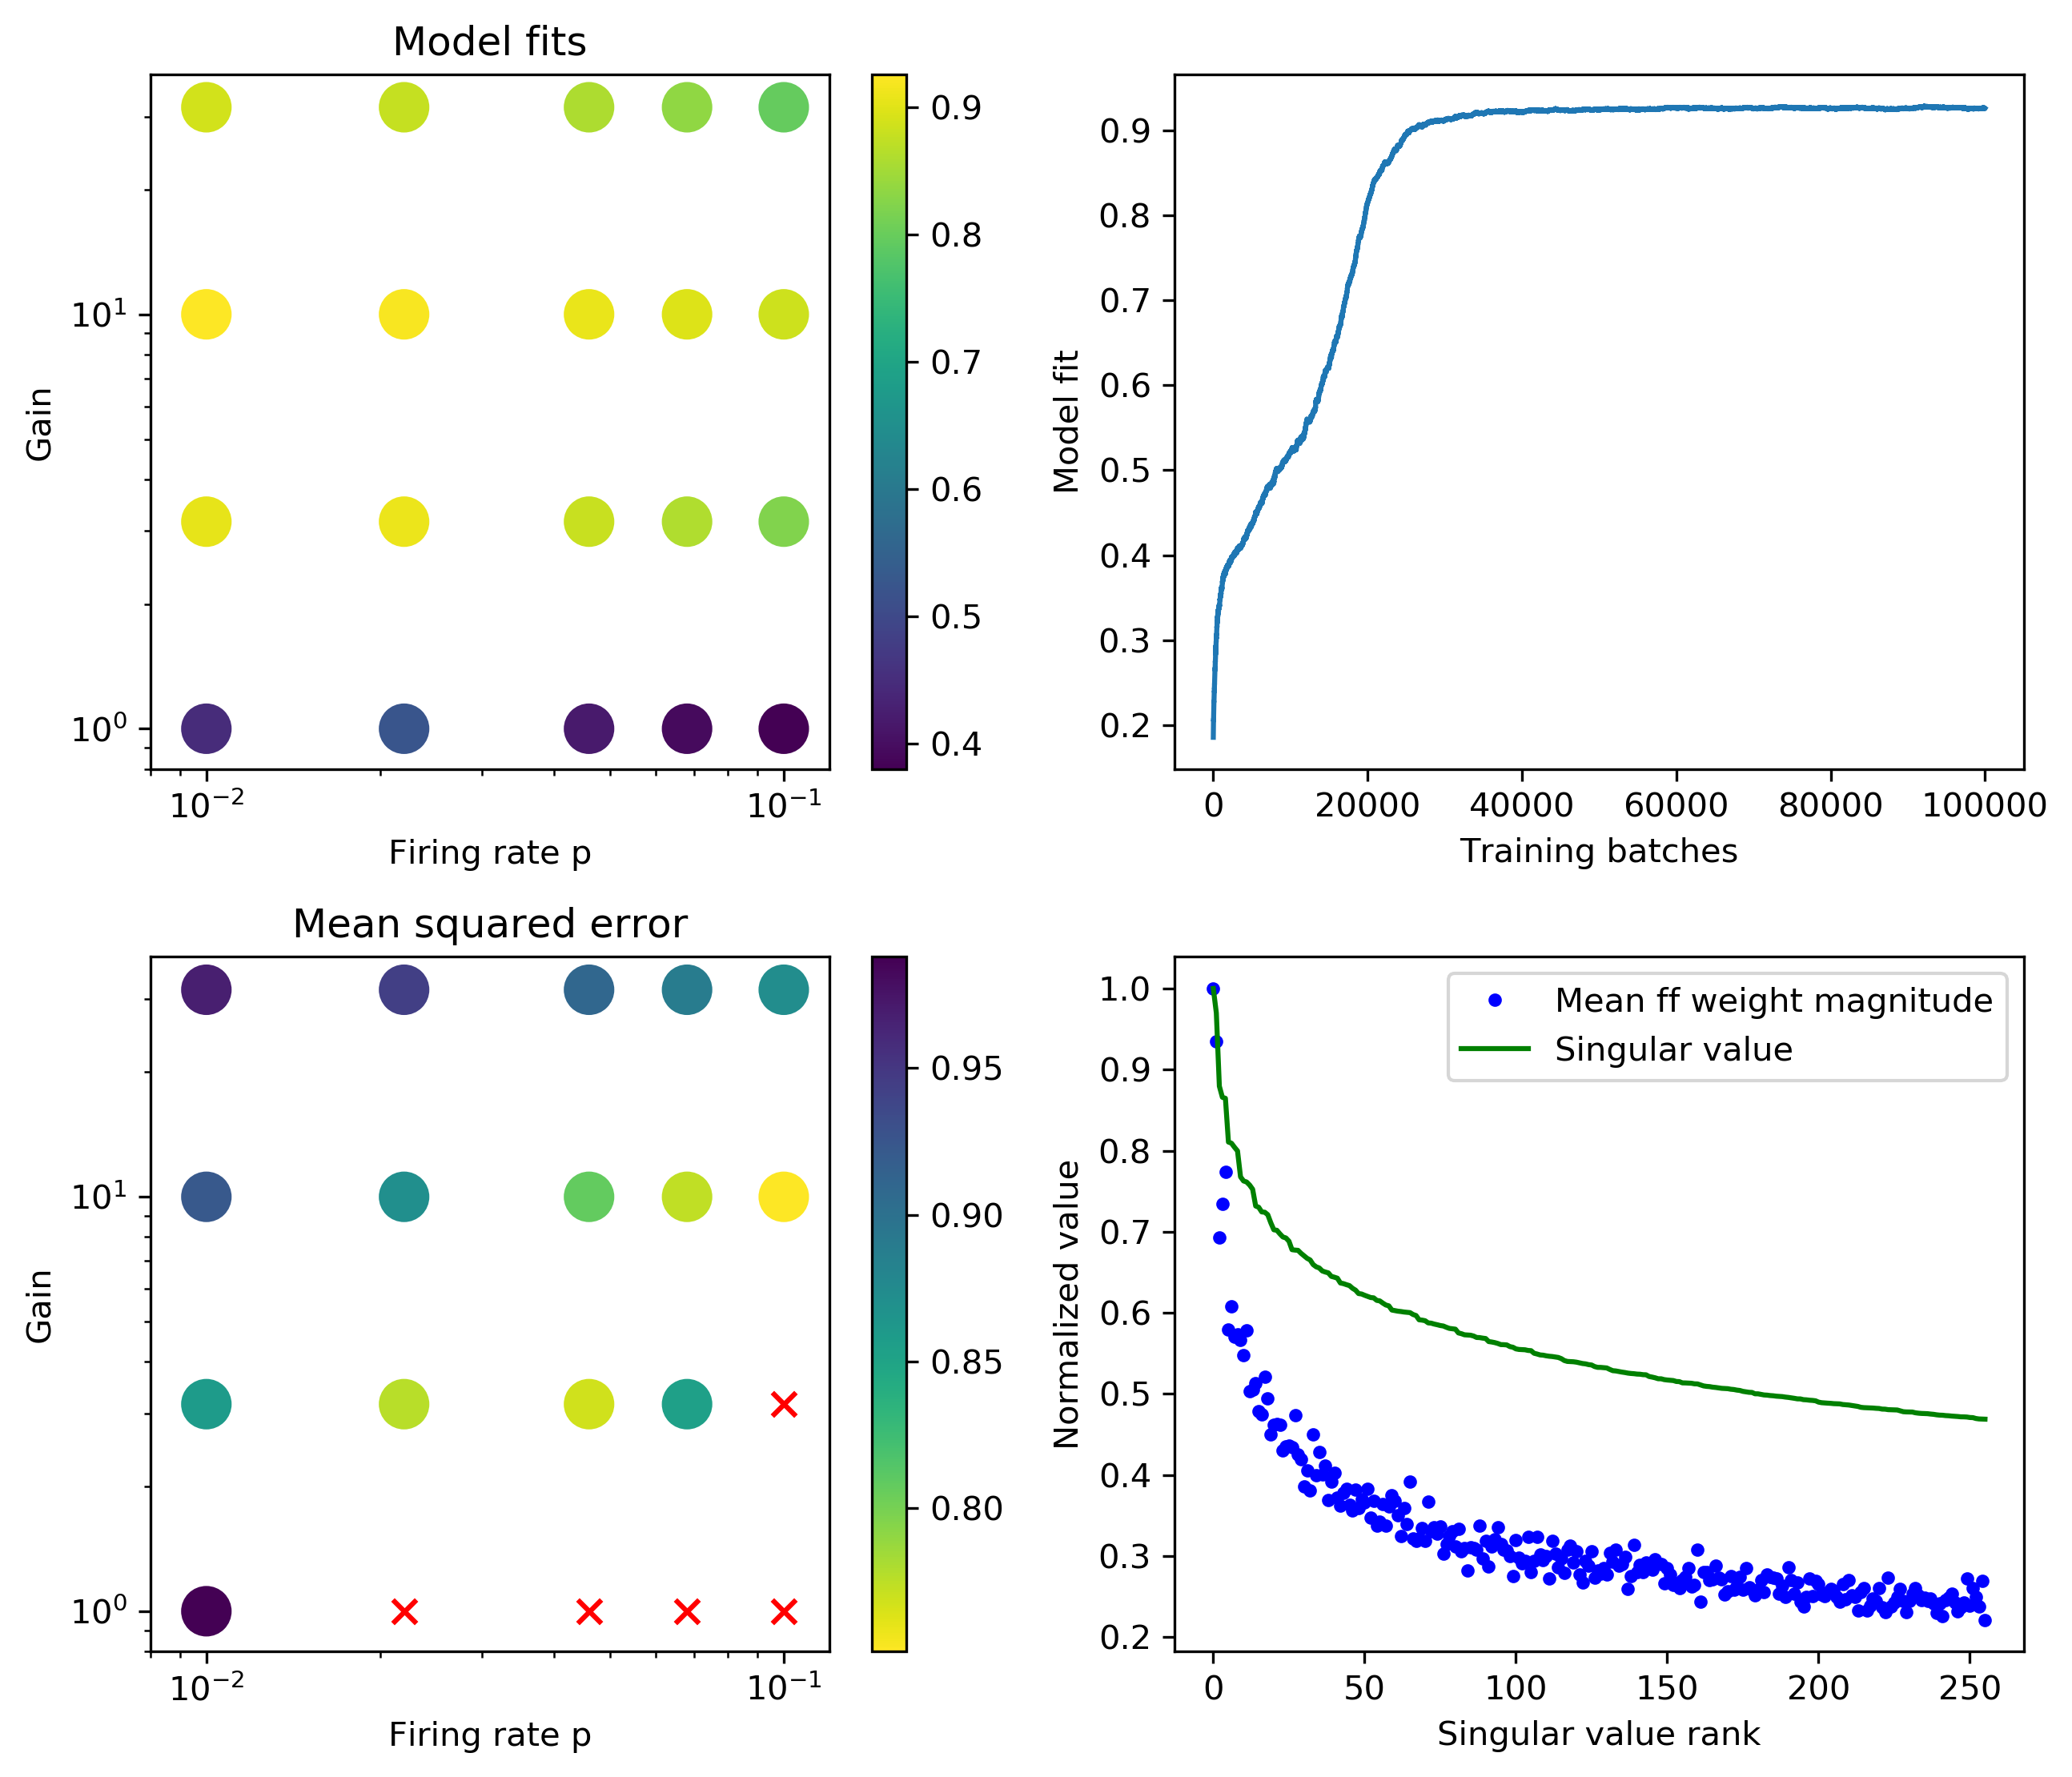

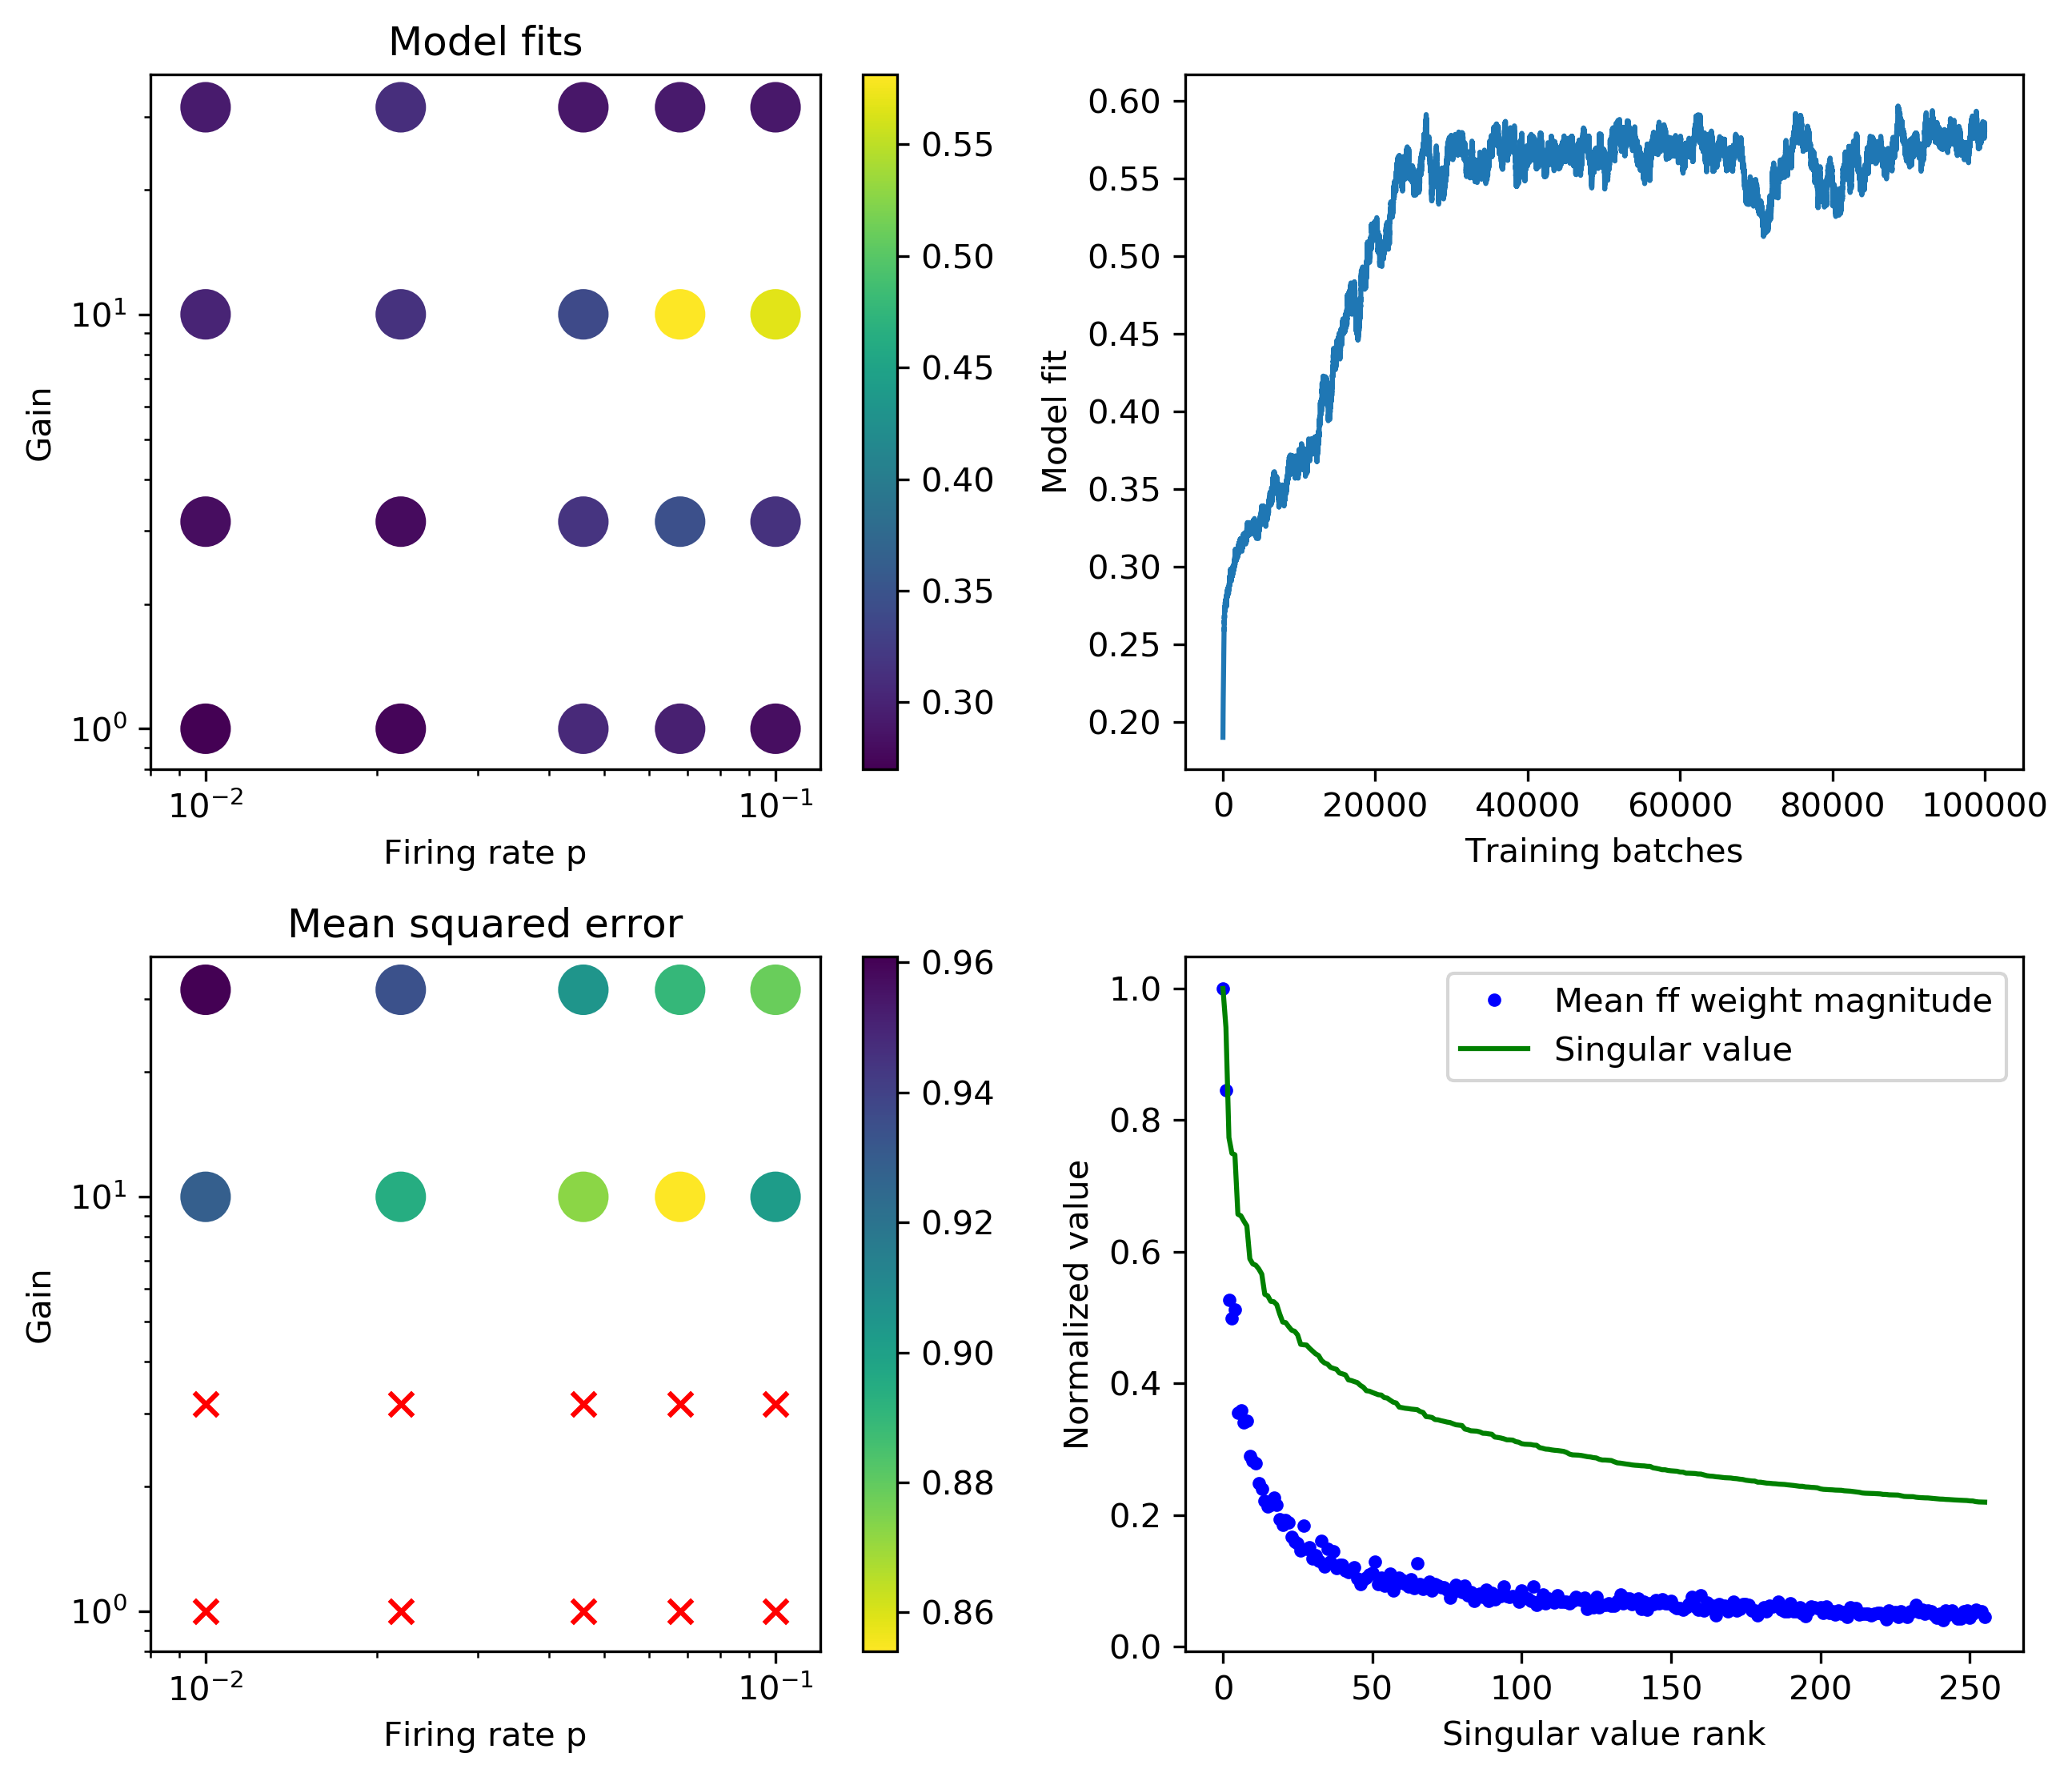

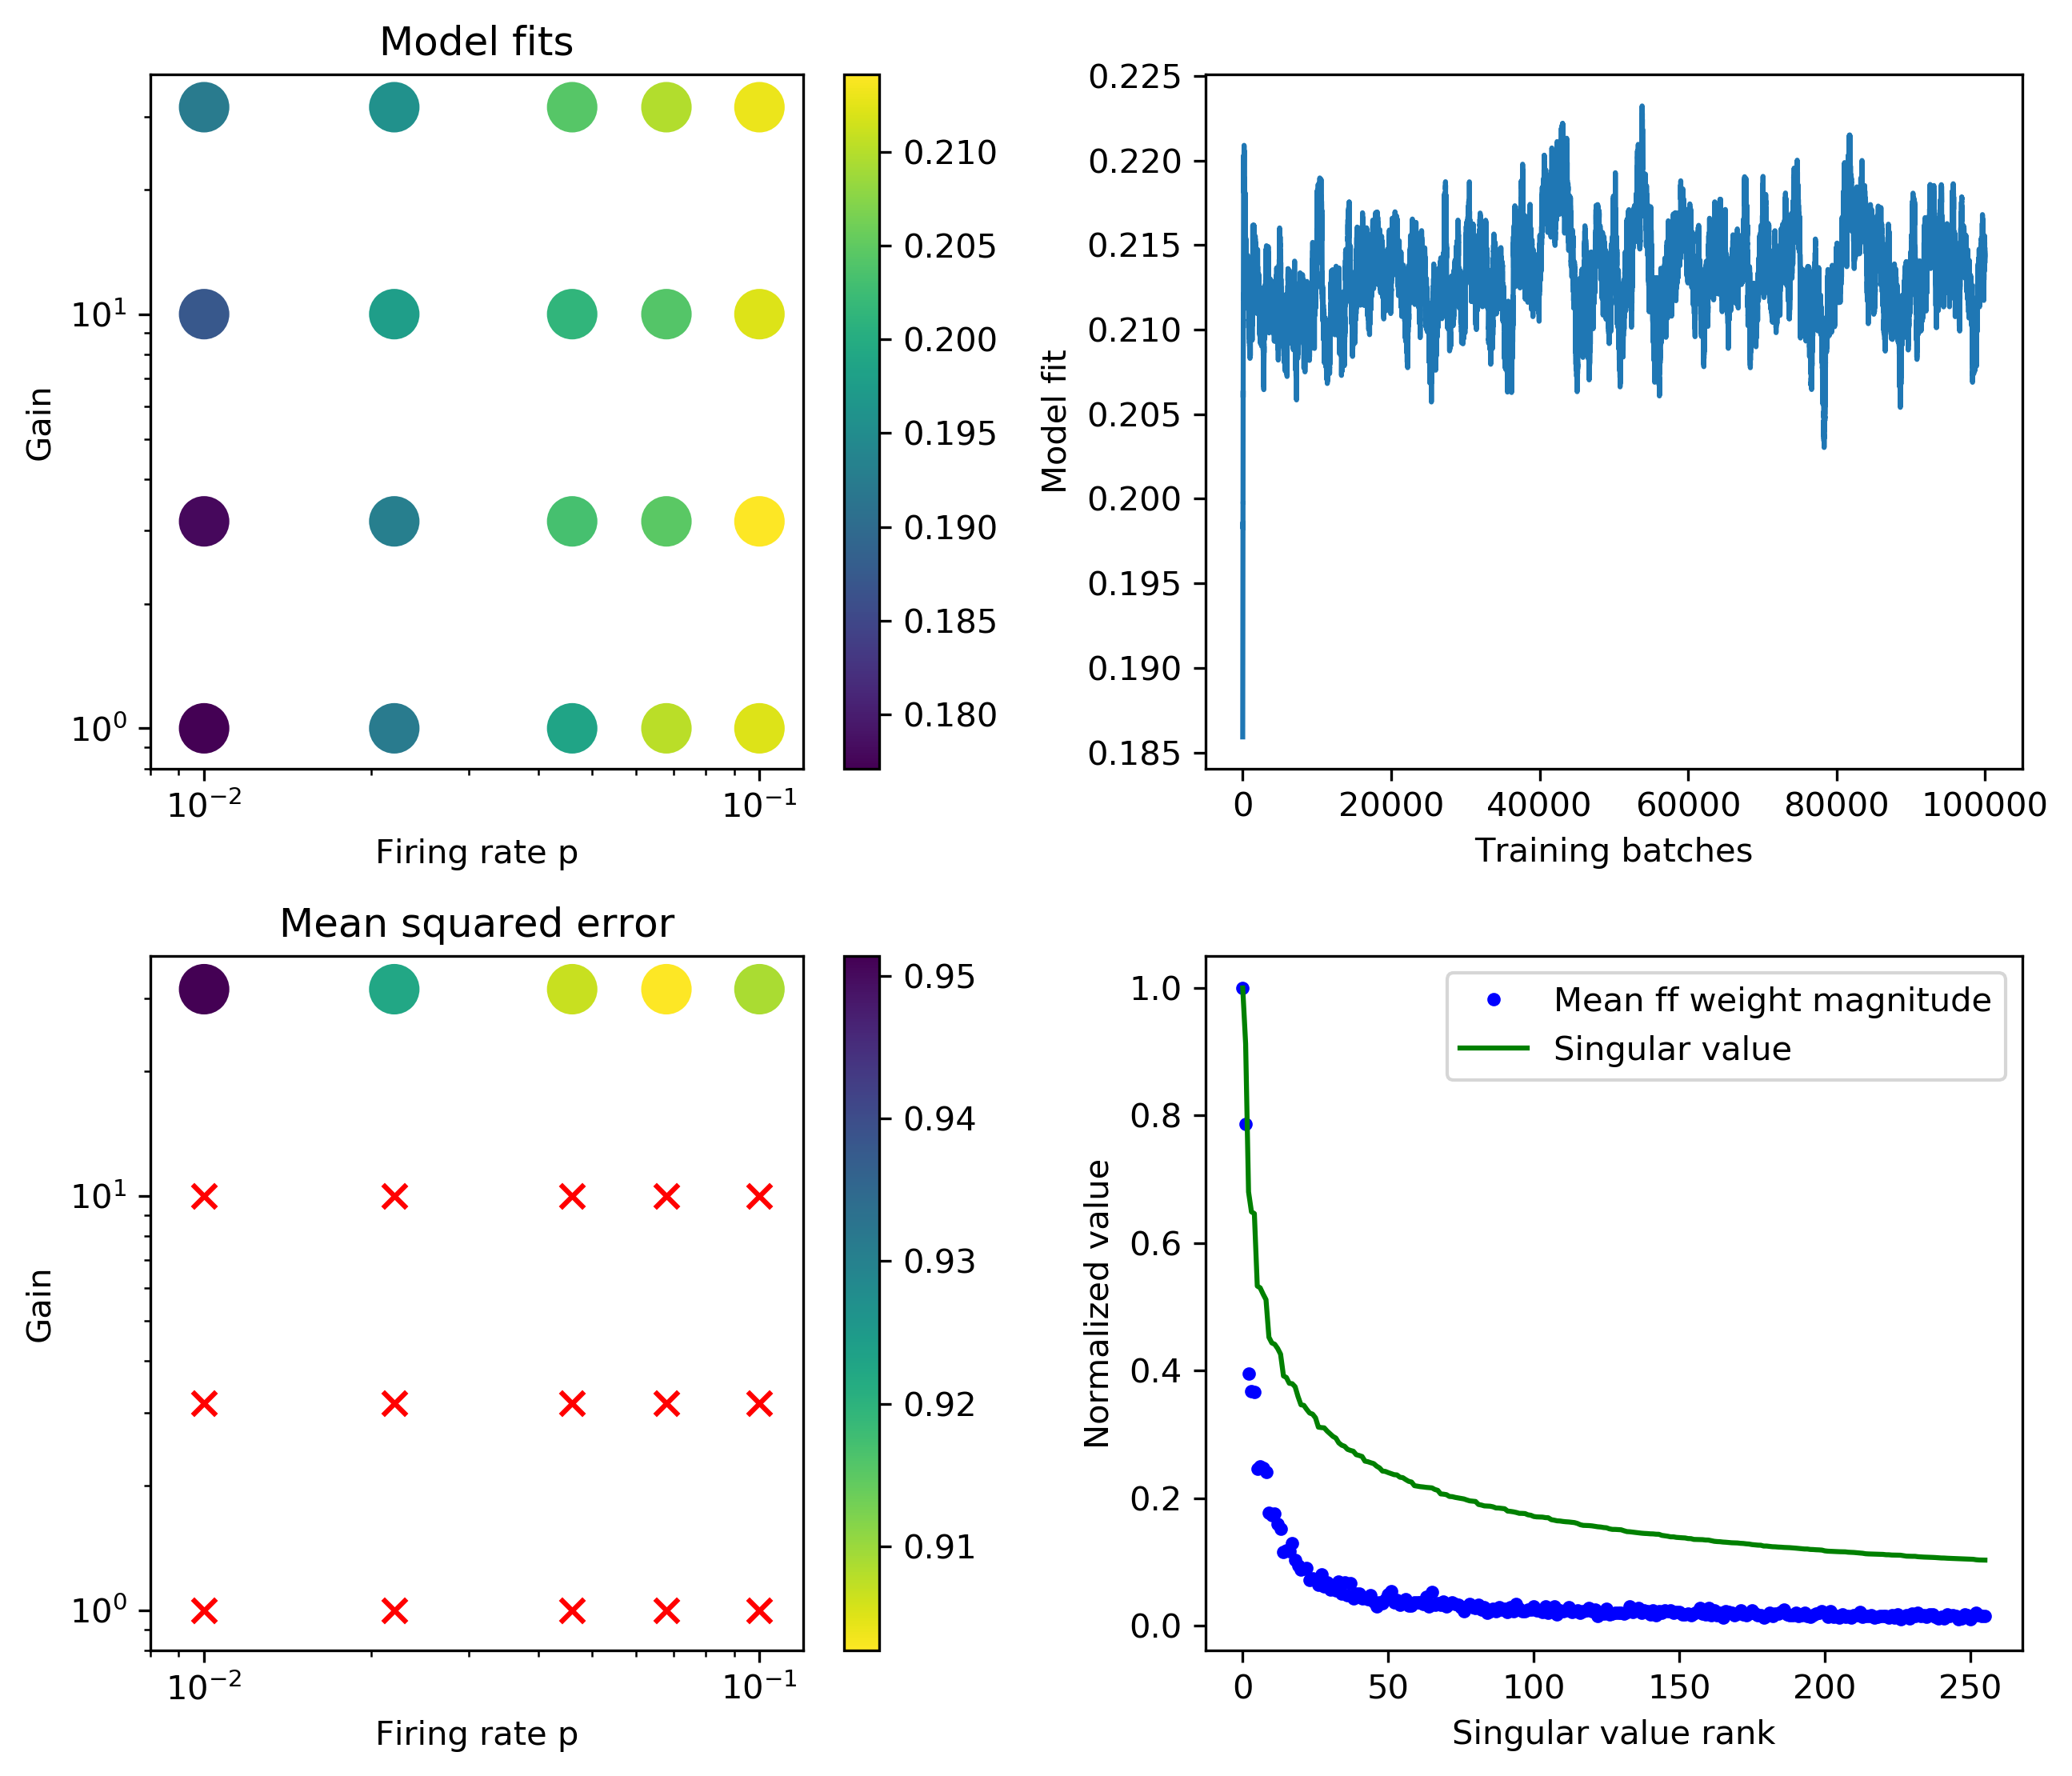

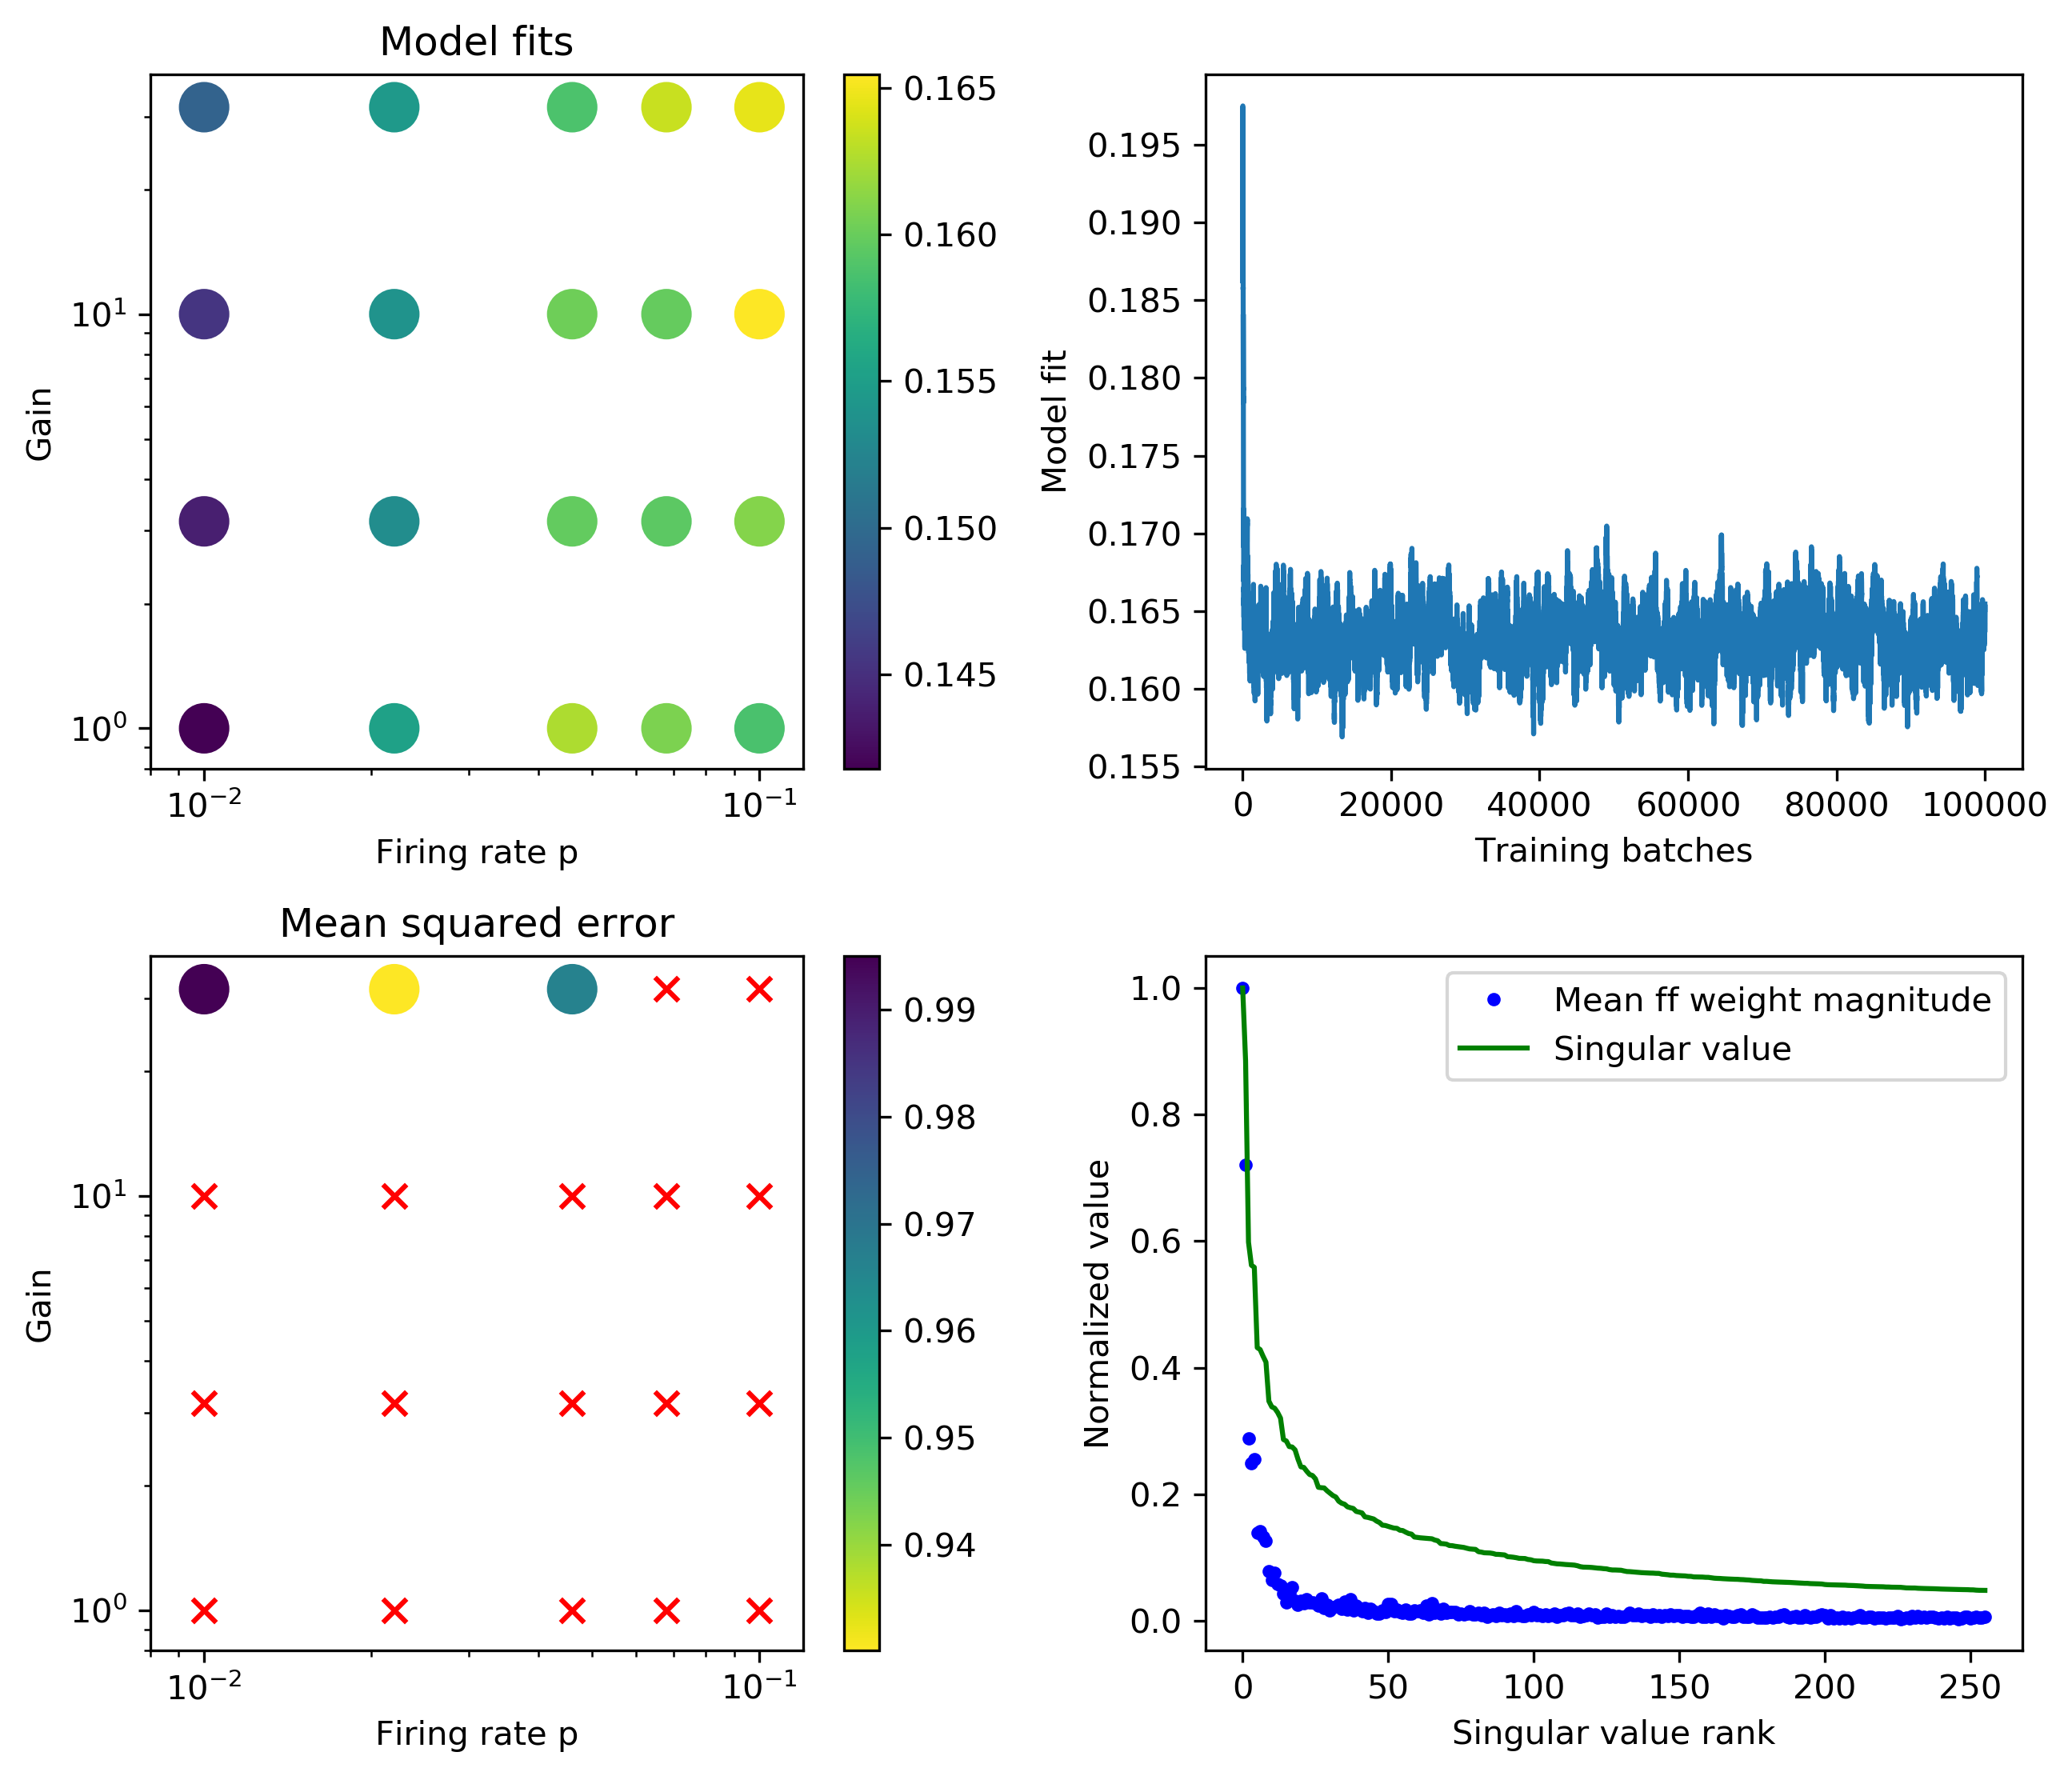

In [10]:
(winners, bestfits, msewinners, besterr, 
    figures) = utils.all_desphere_results(net, toy, impca, 'Pickles/complete/', ds_vals, synth=True)

In [11]:
for ii in range(len(ds_vals)):
    figures[ii].savefig('Figures/toyds'+str(ds_vals[ii])+'hpetc.png')

In [12]:
nchances = 1000
chance = np.zeros(nchances)
for ii in range(nchances):
    chance[ii] = toy.test_fit(np.random.normal(size=toy.sources.shape))

In [13]:
bestfits

array([0.96670864, 0.95769278, 0.92565613, 0.58136947, 0.21412852,
       0.16545231])

In [14]:
lcaresults = np.array([0.978,0.969, 0.945, 0.907, 0.85])

Errors on  0  files
Parameters of the best-fitting model: 
p =  0.1
gain =  1.0
mse =  0.012266240185126662
model fit =  0.9779674531406604
Errors on  0  files
Parameters of the best-fitting model: 
p =  0.1
gain =  1.0
mse =  0.012275283046066761
model fit =  0.9767156286119556
Errors on  0  files
Parameters of the best-fitting model: 
p =  0.1
gain =  1.0
mse =  0.01231670093908906
model fit =  0.9716843557716359
Errors on  0  files
Parameters of the best-fitting model: 
p =  0.05
gain =  1.0
mse =  0.005766898205750289
model fit =  0.9451741715844955
Errors on  0  files
Parameters of the best-fitting model: 
p =  0.2
gain =  1.0
mse =  0.03311635801920146
model fit =  0.9017344703126611
Errors on  0  files
Parameters of the best-fitting model: 
p =  0.2
gain =  1.0
mse =  0.029852462322360263
model fit =  0.8441316458365761


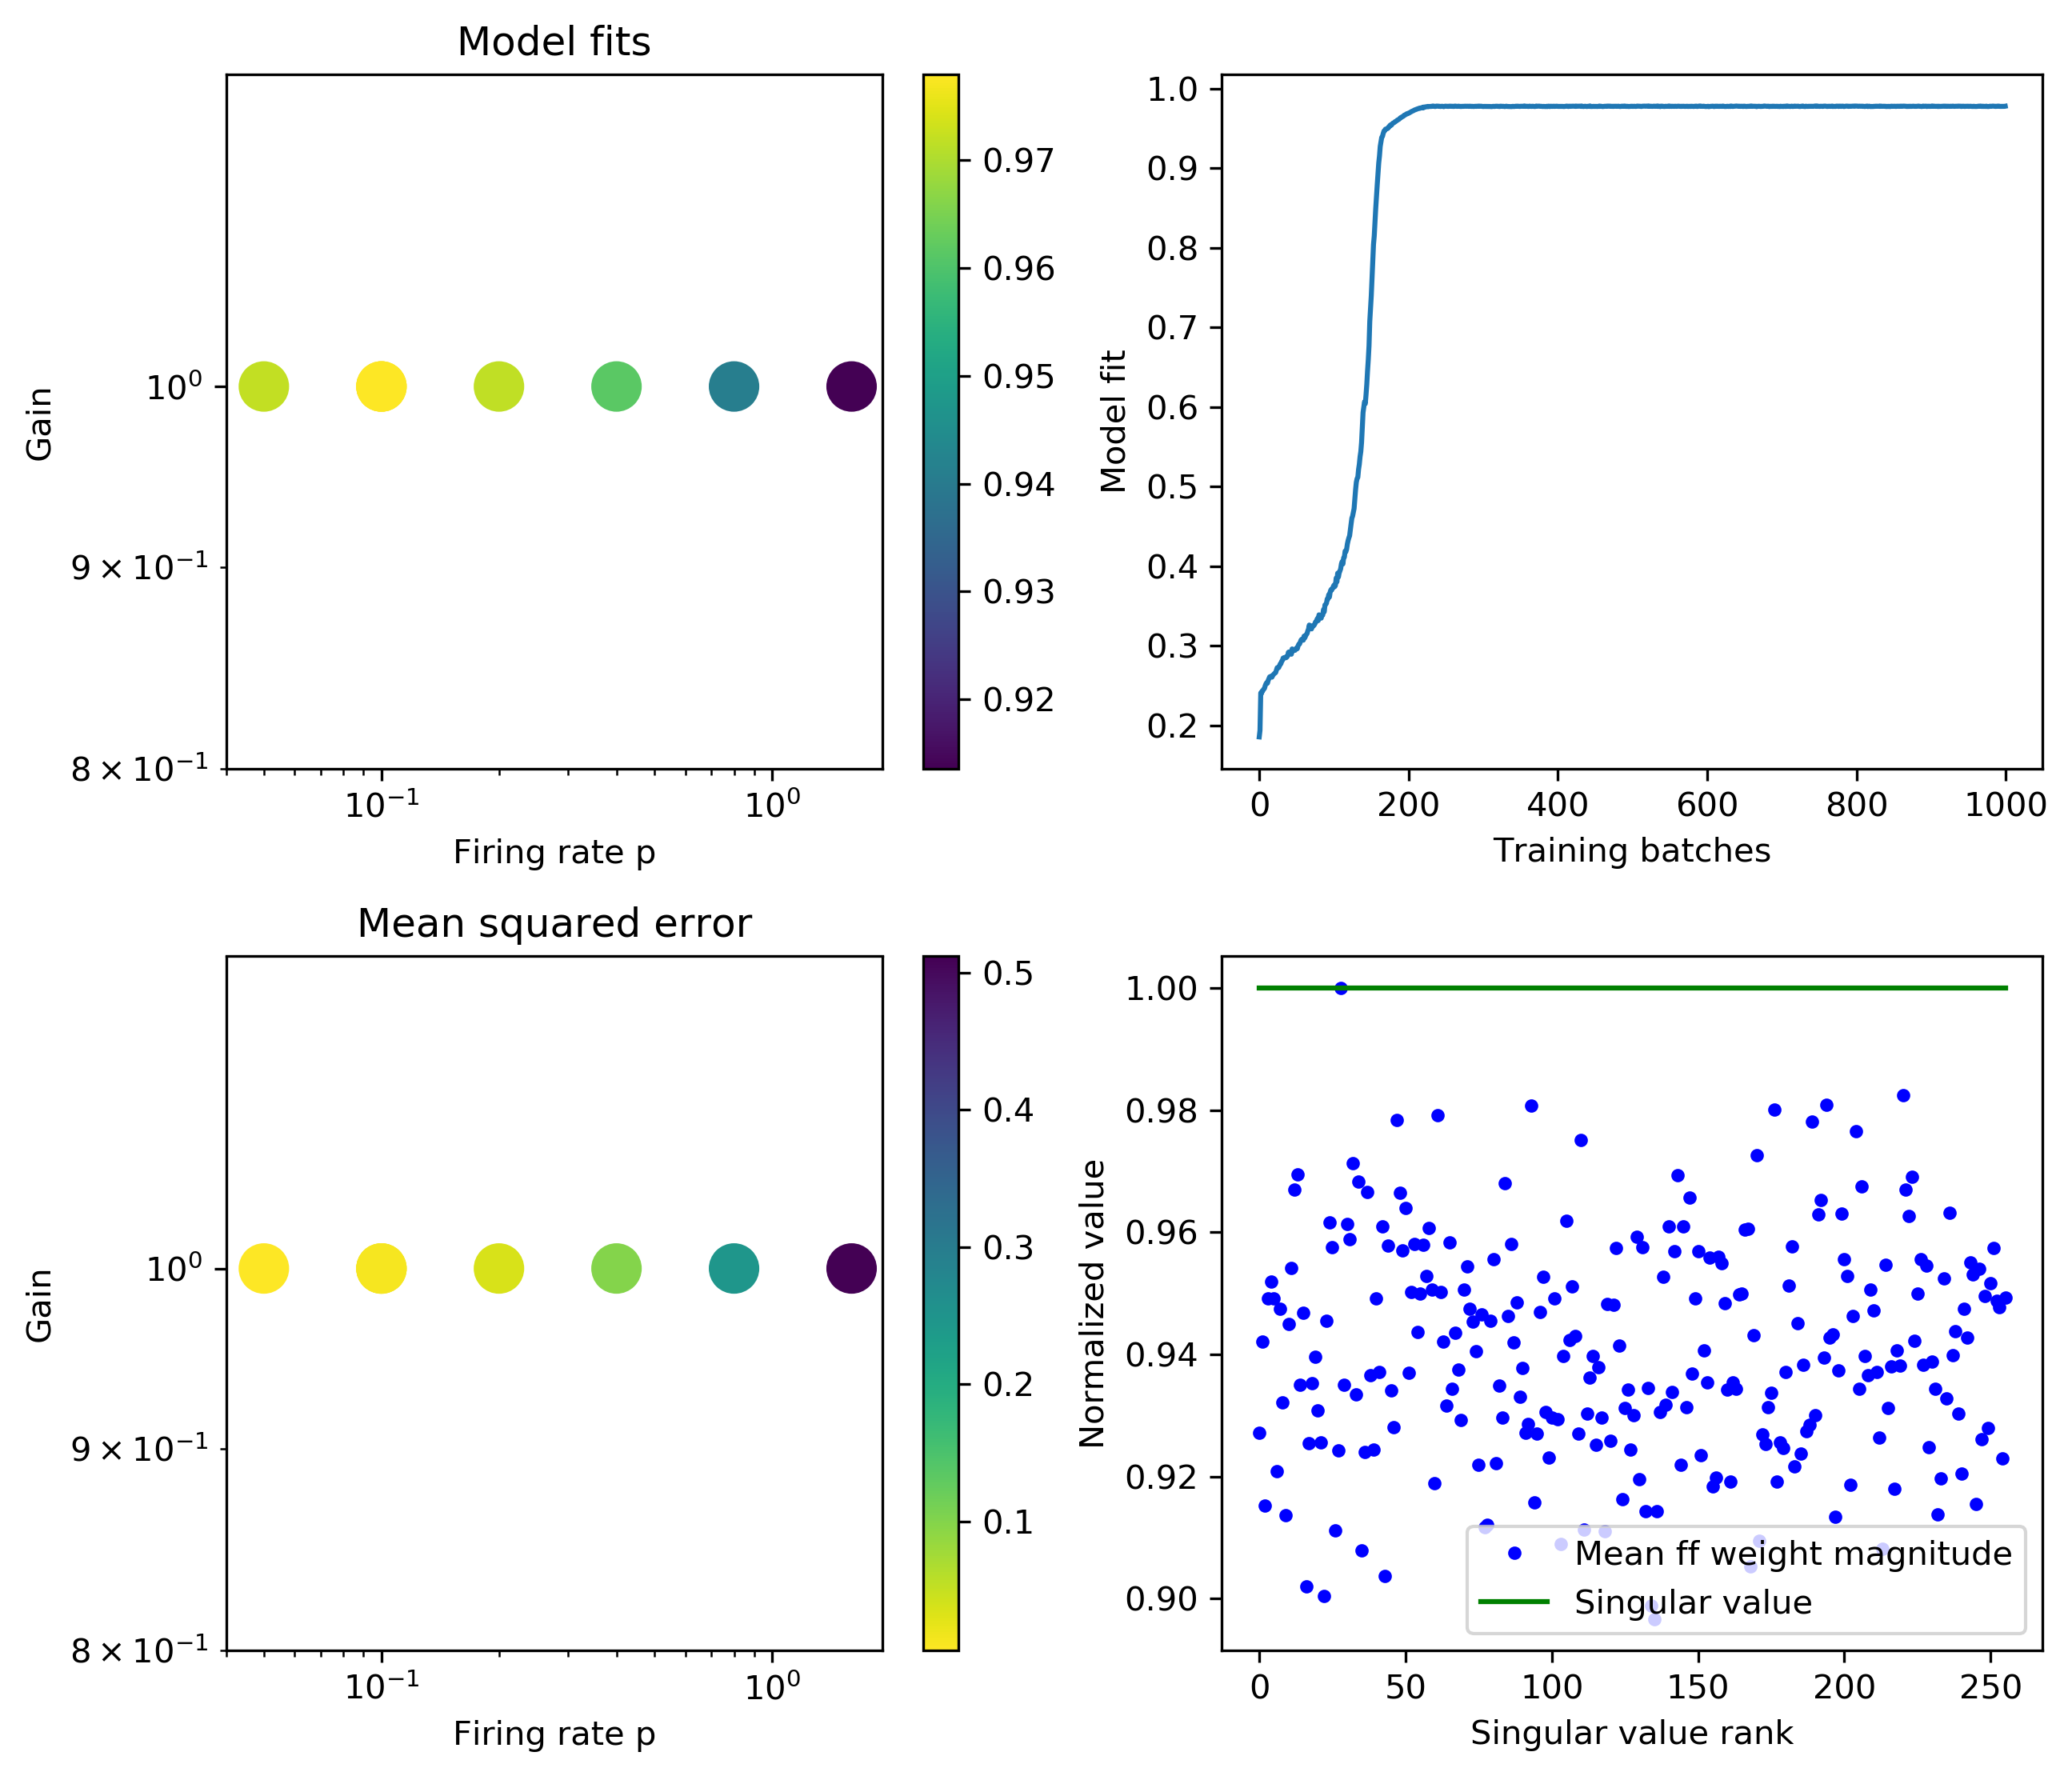

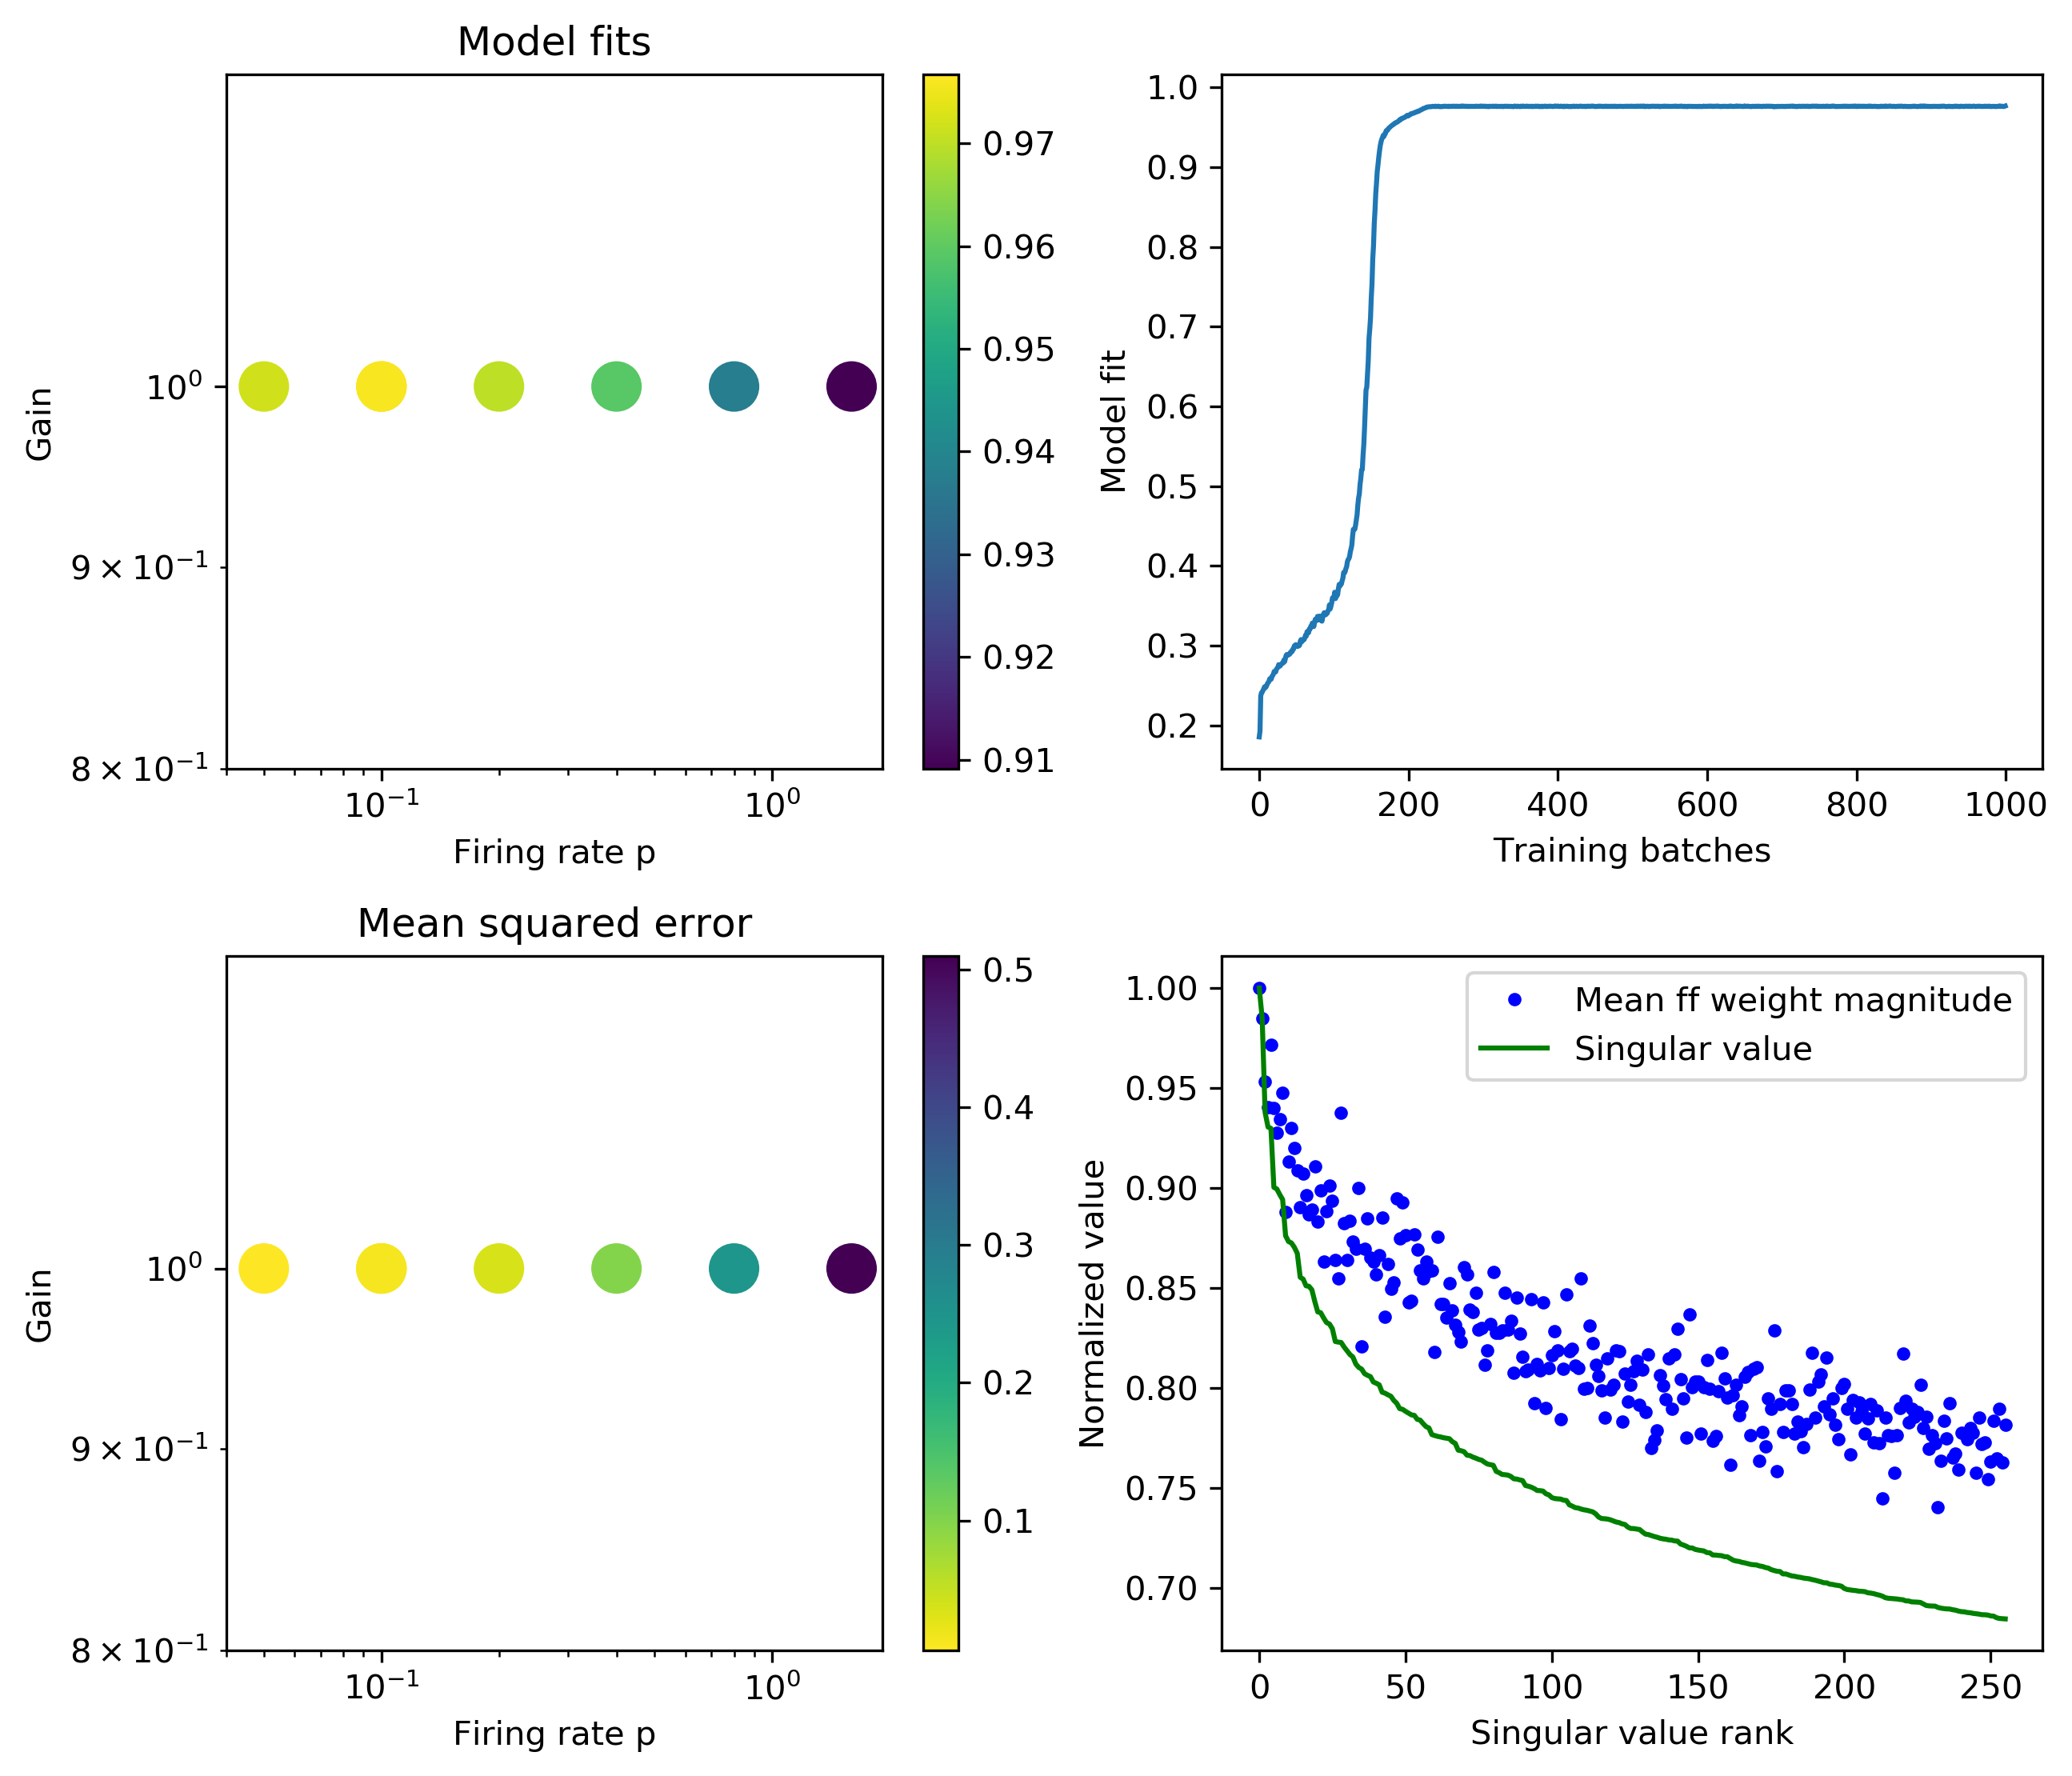

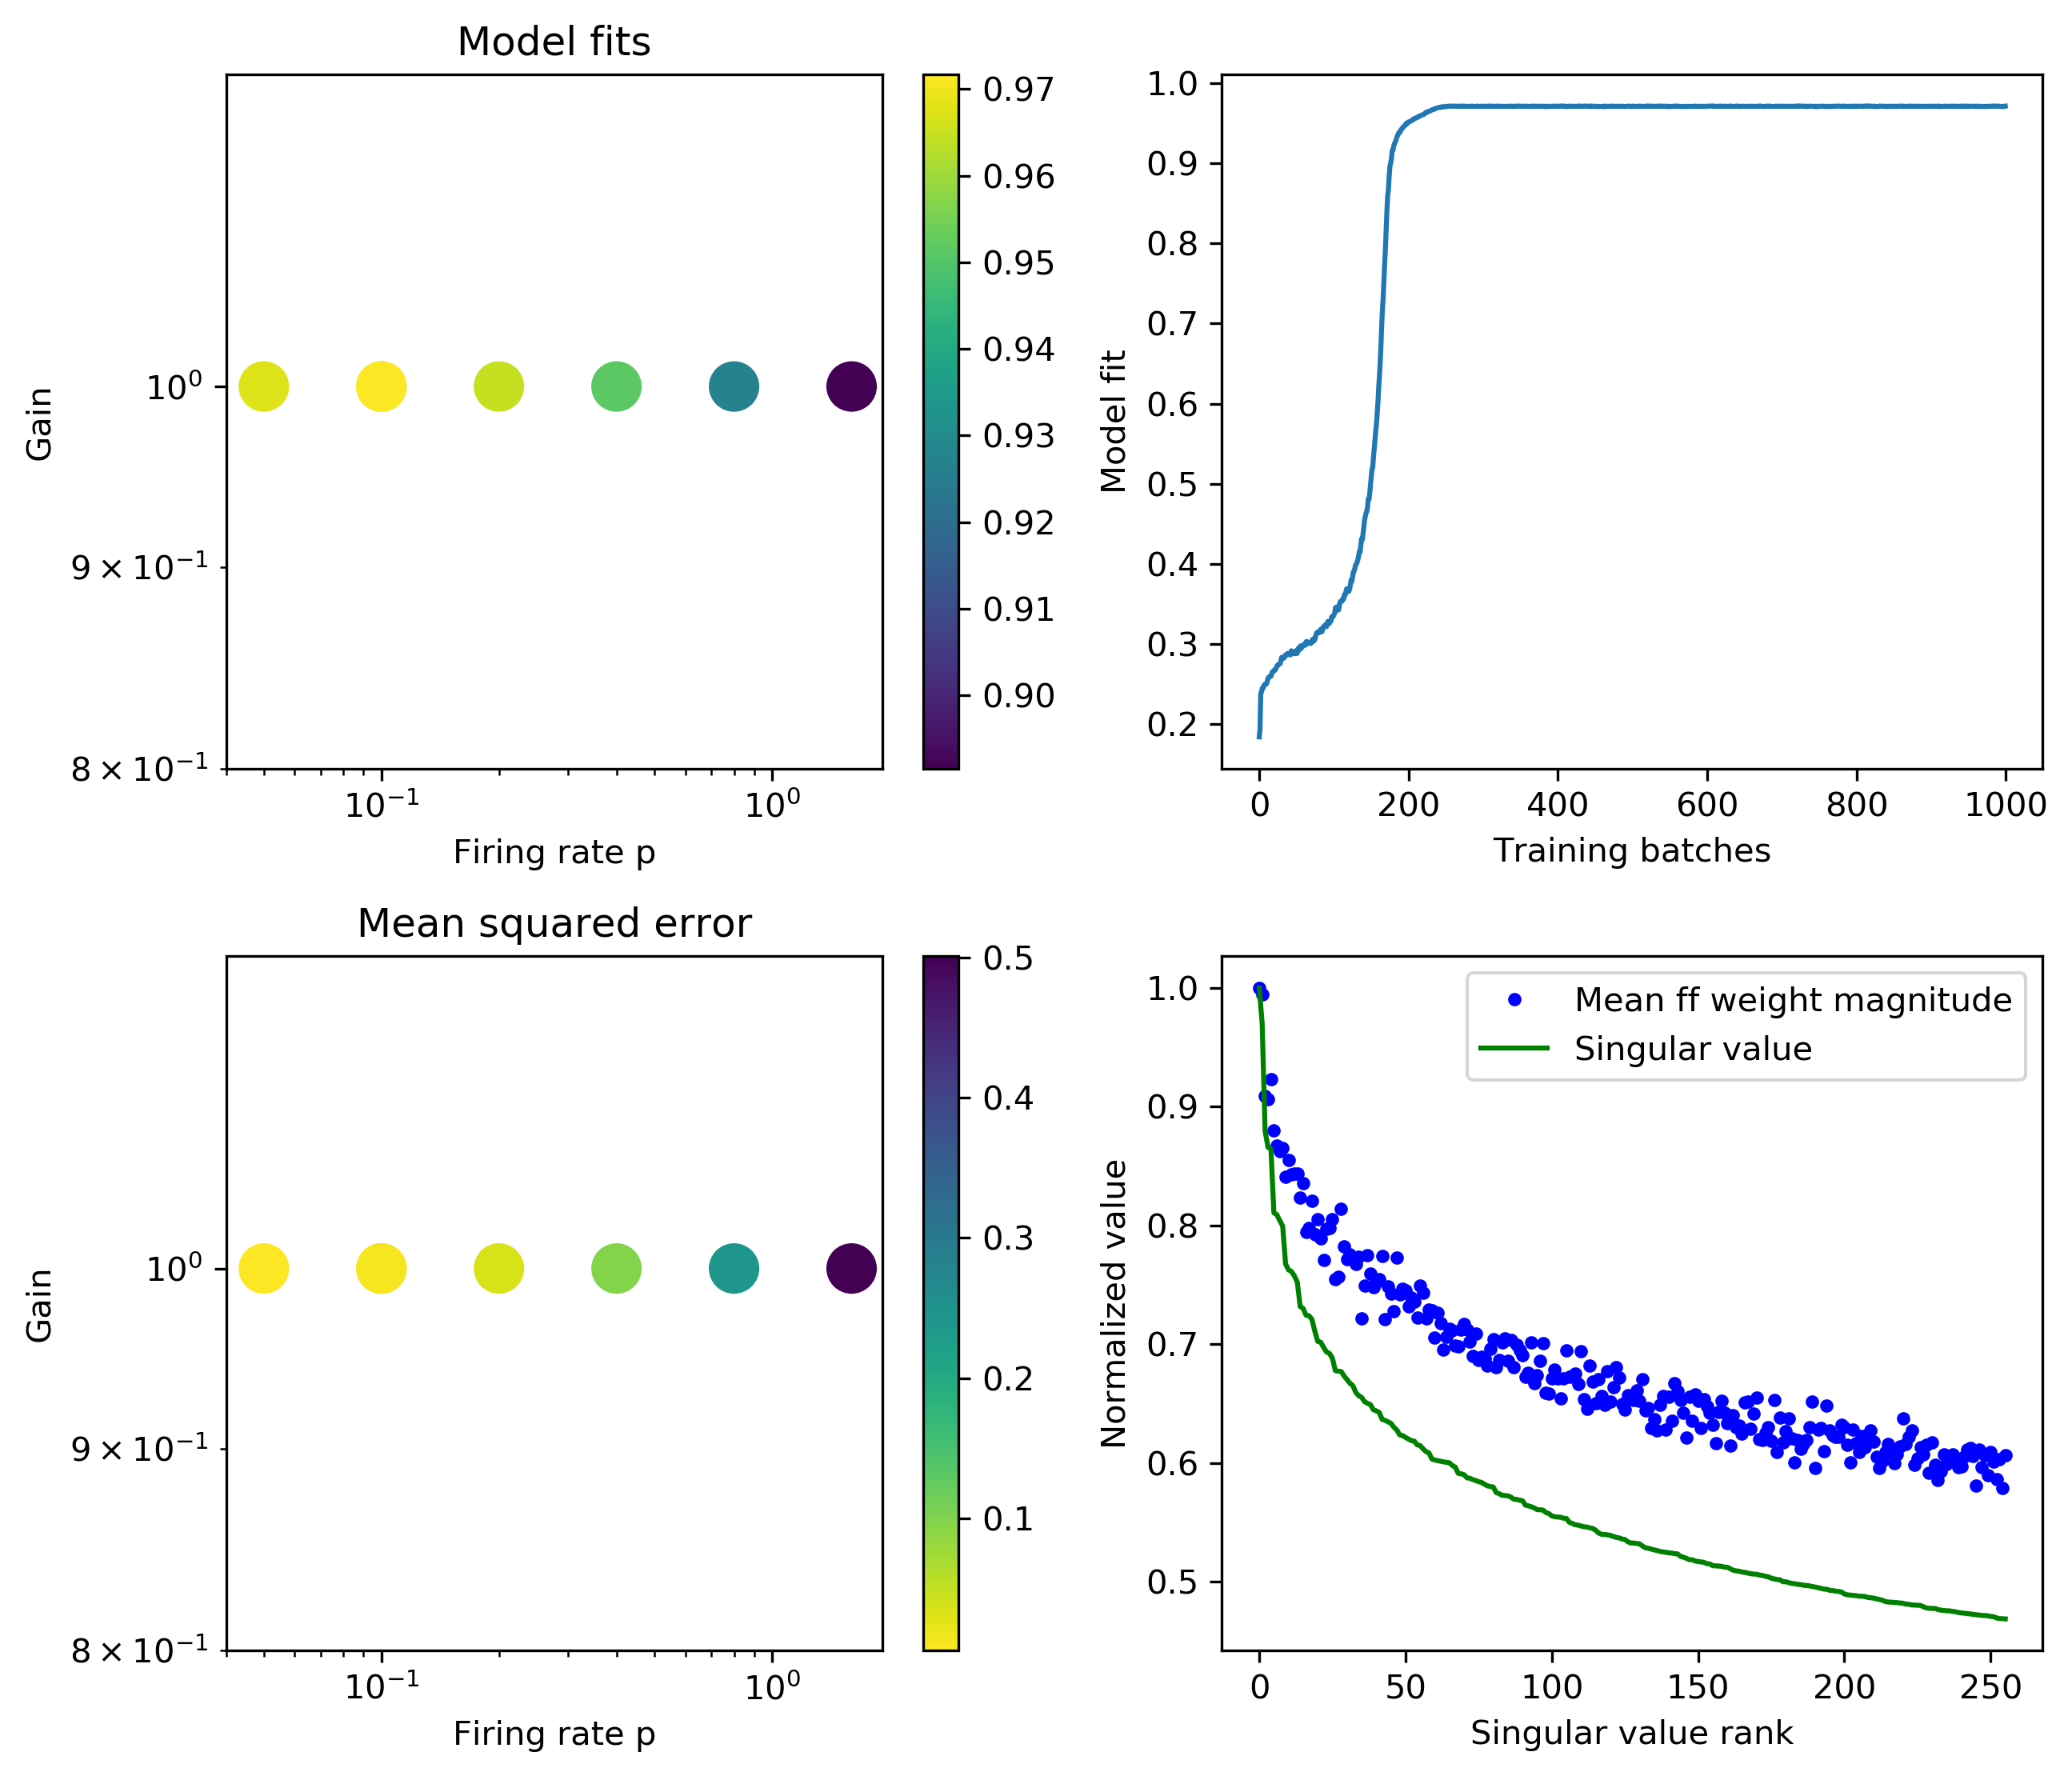

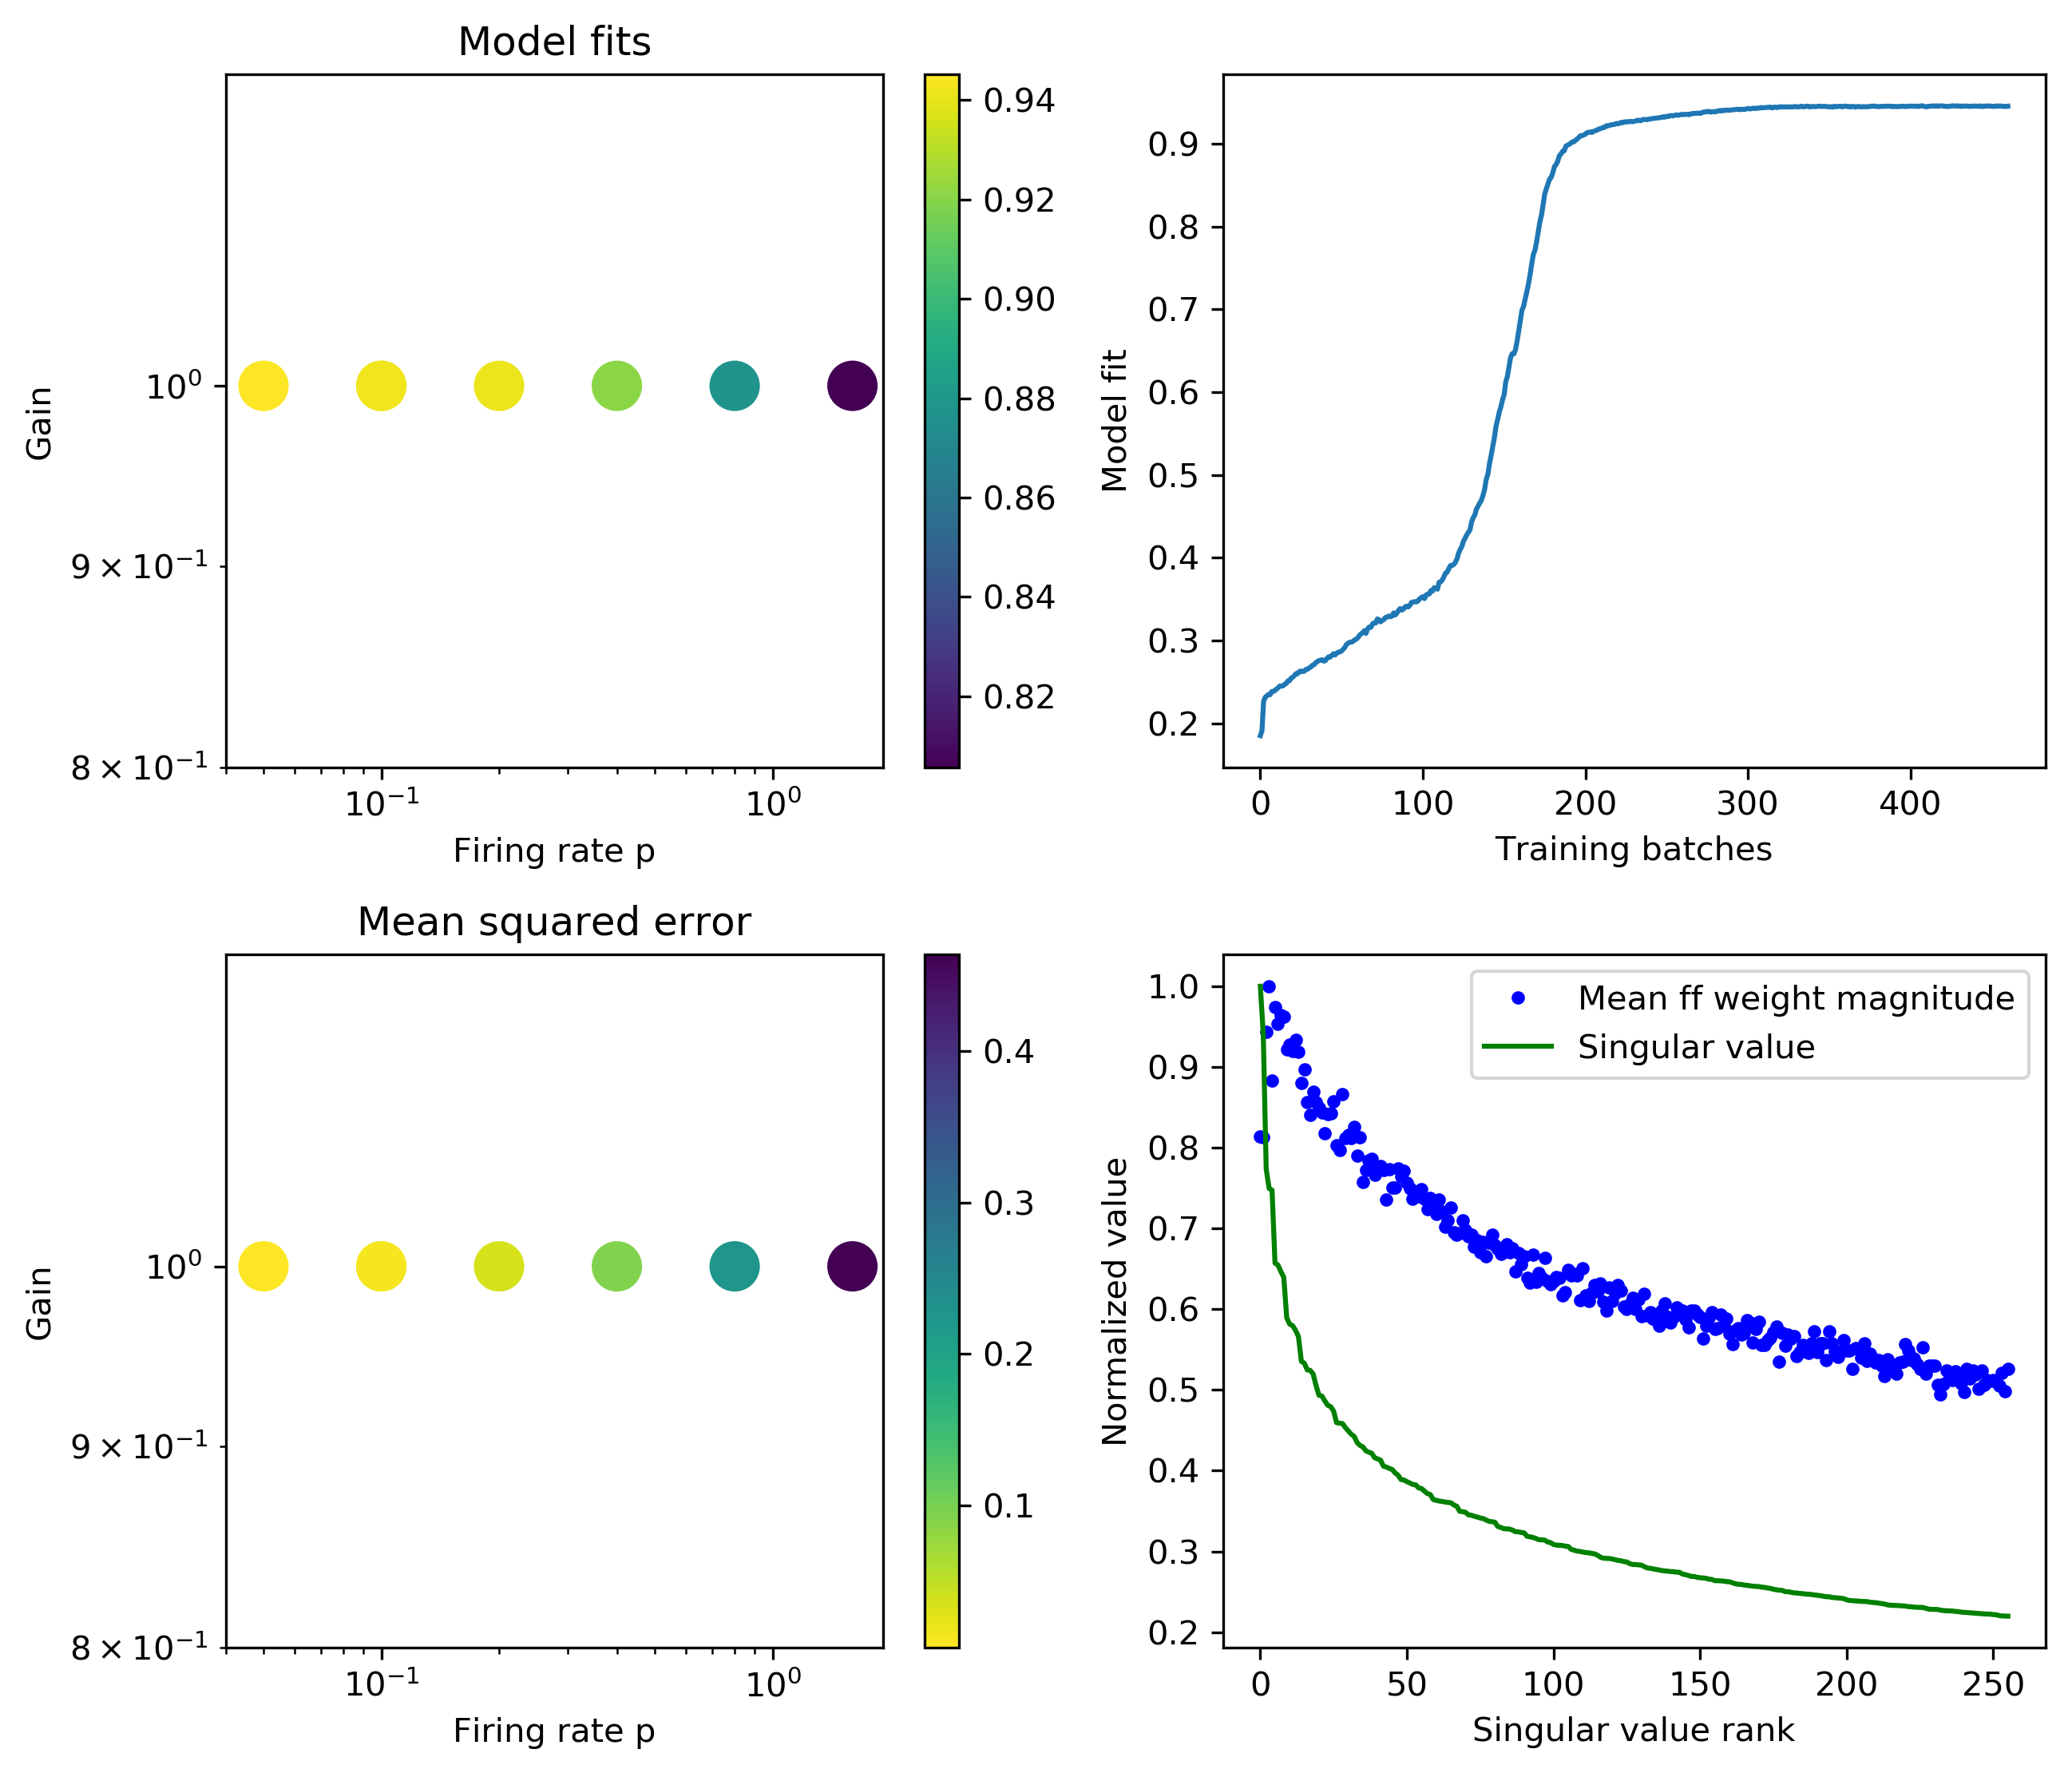

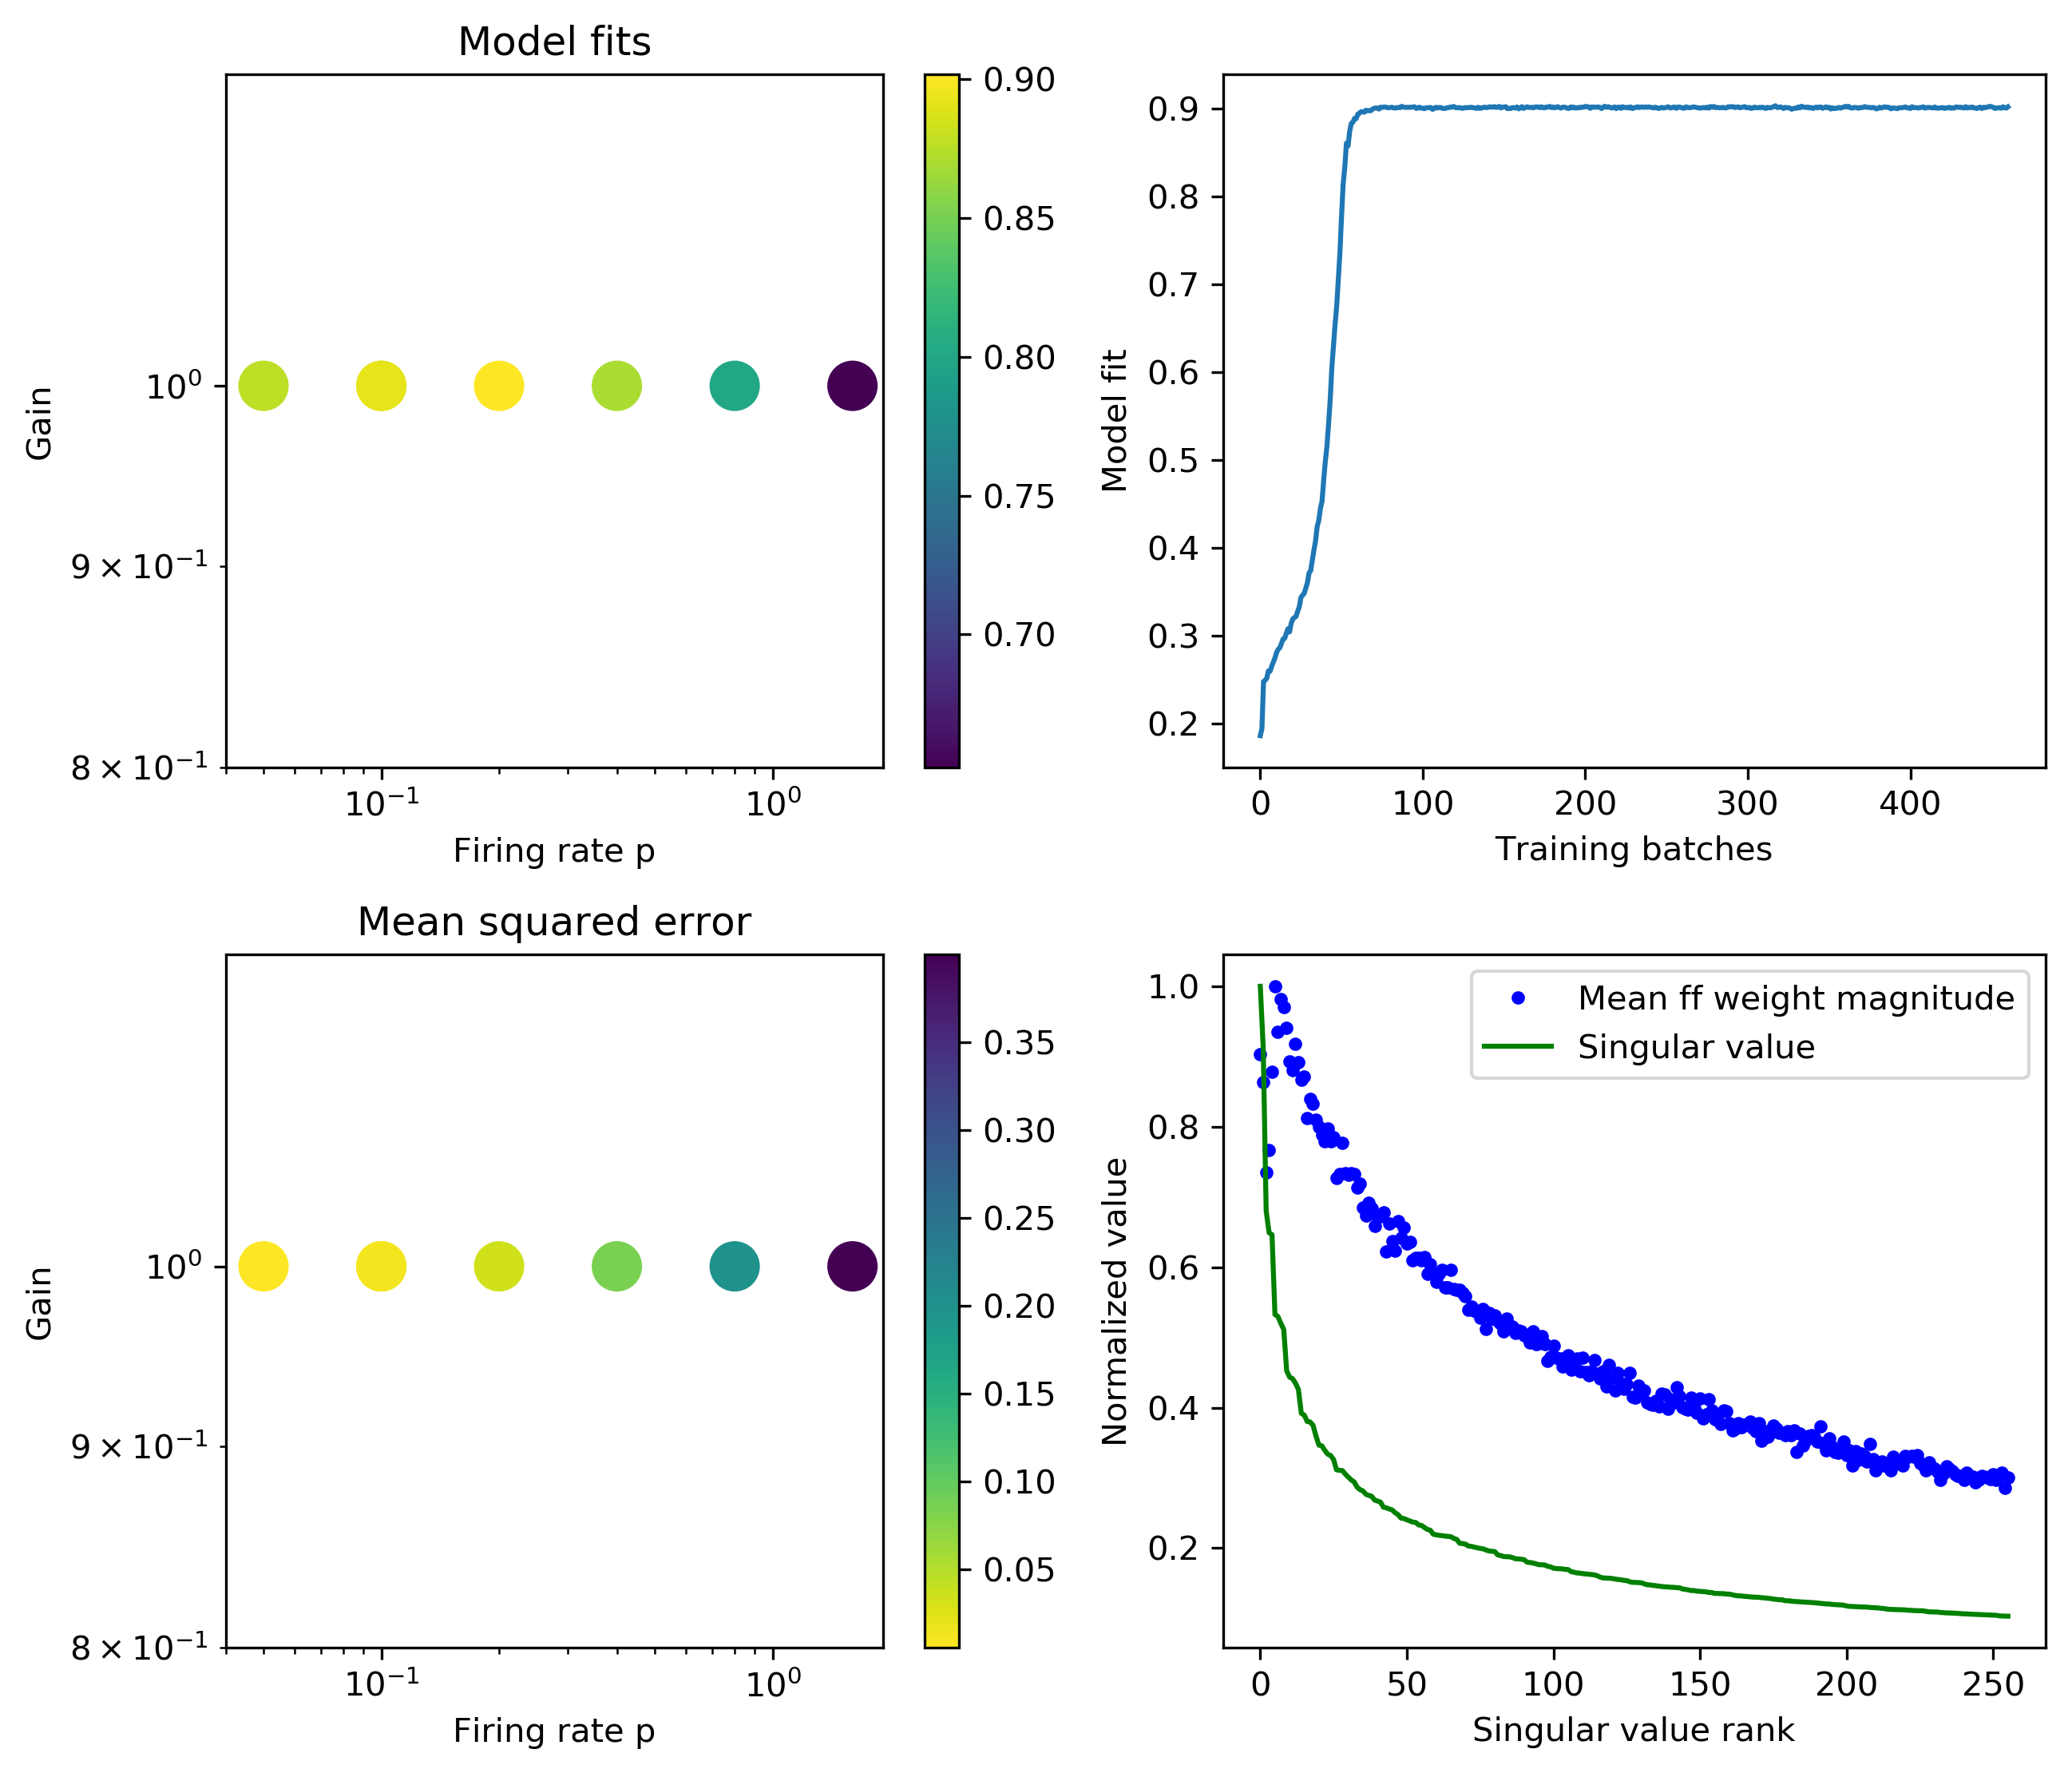

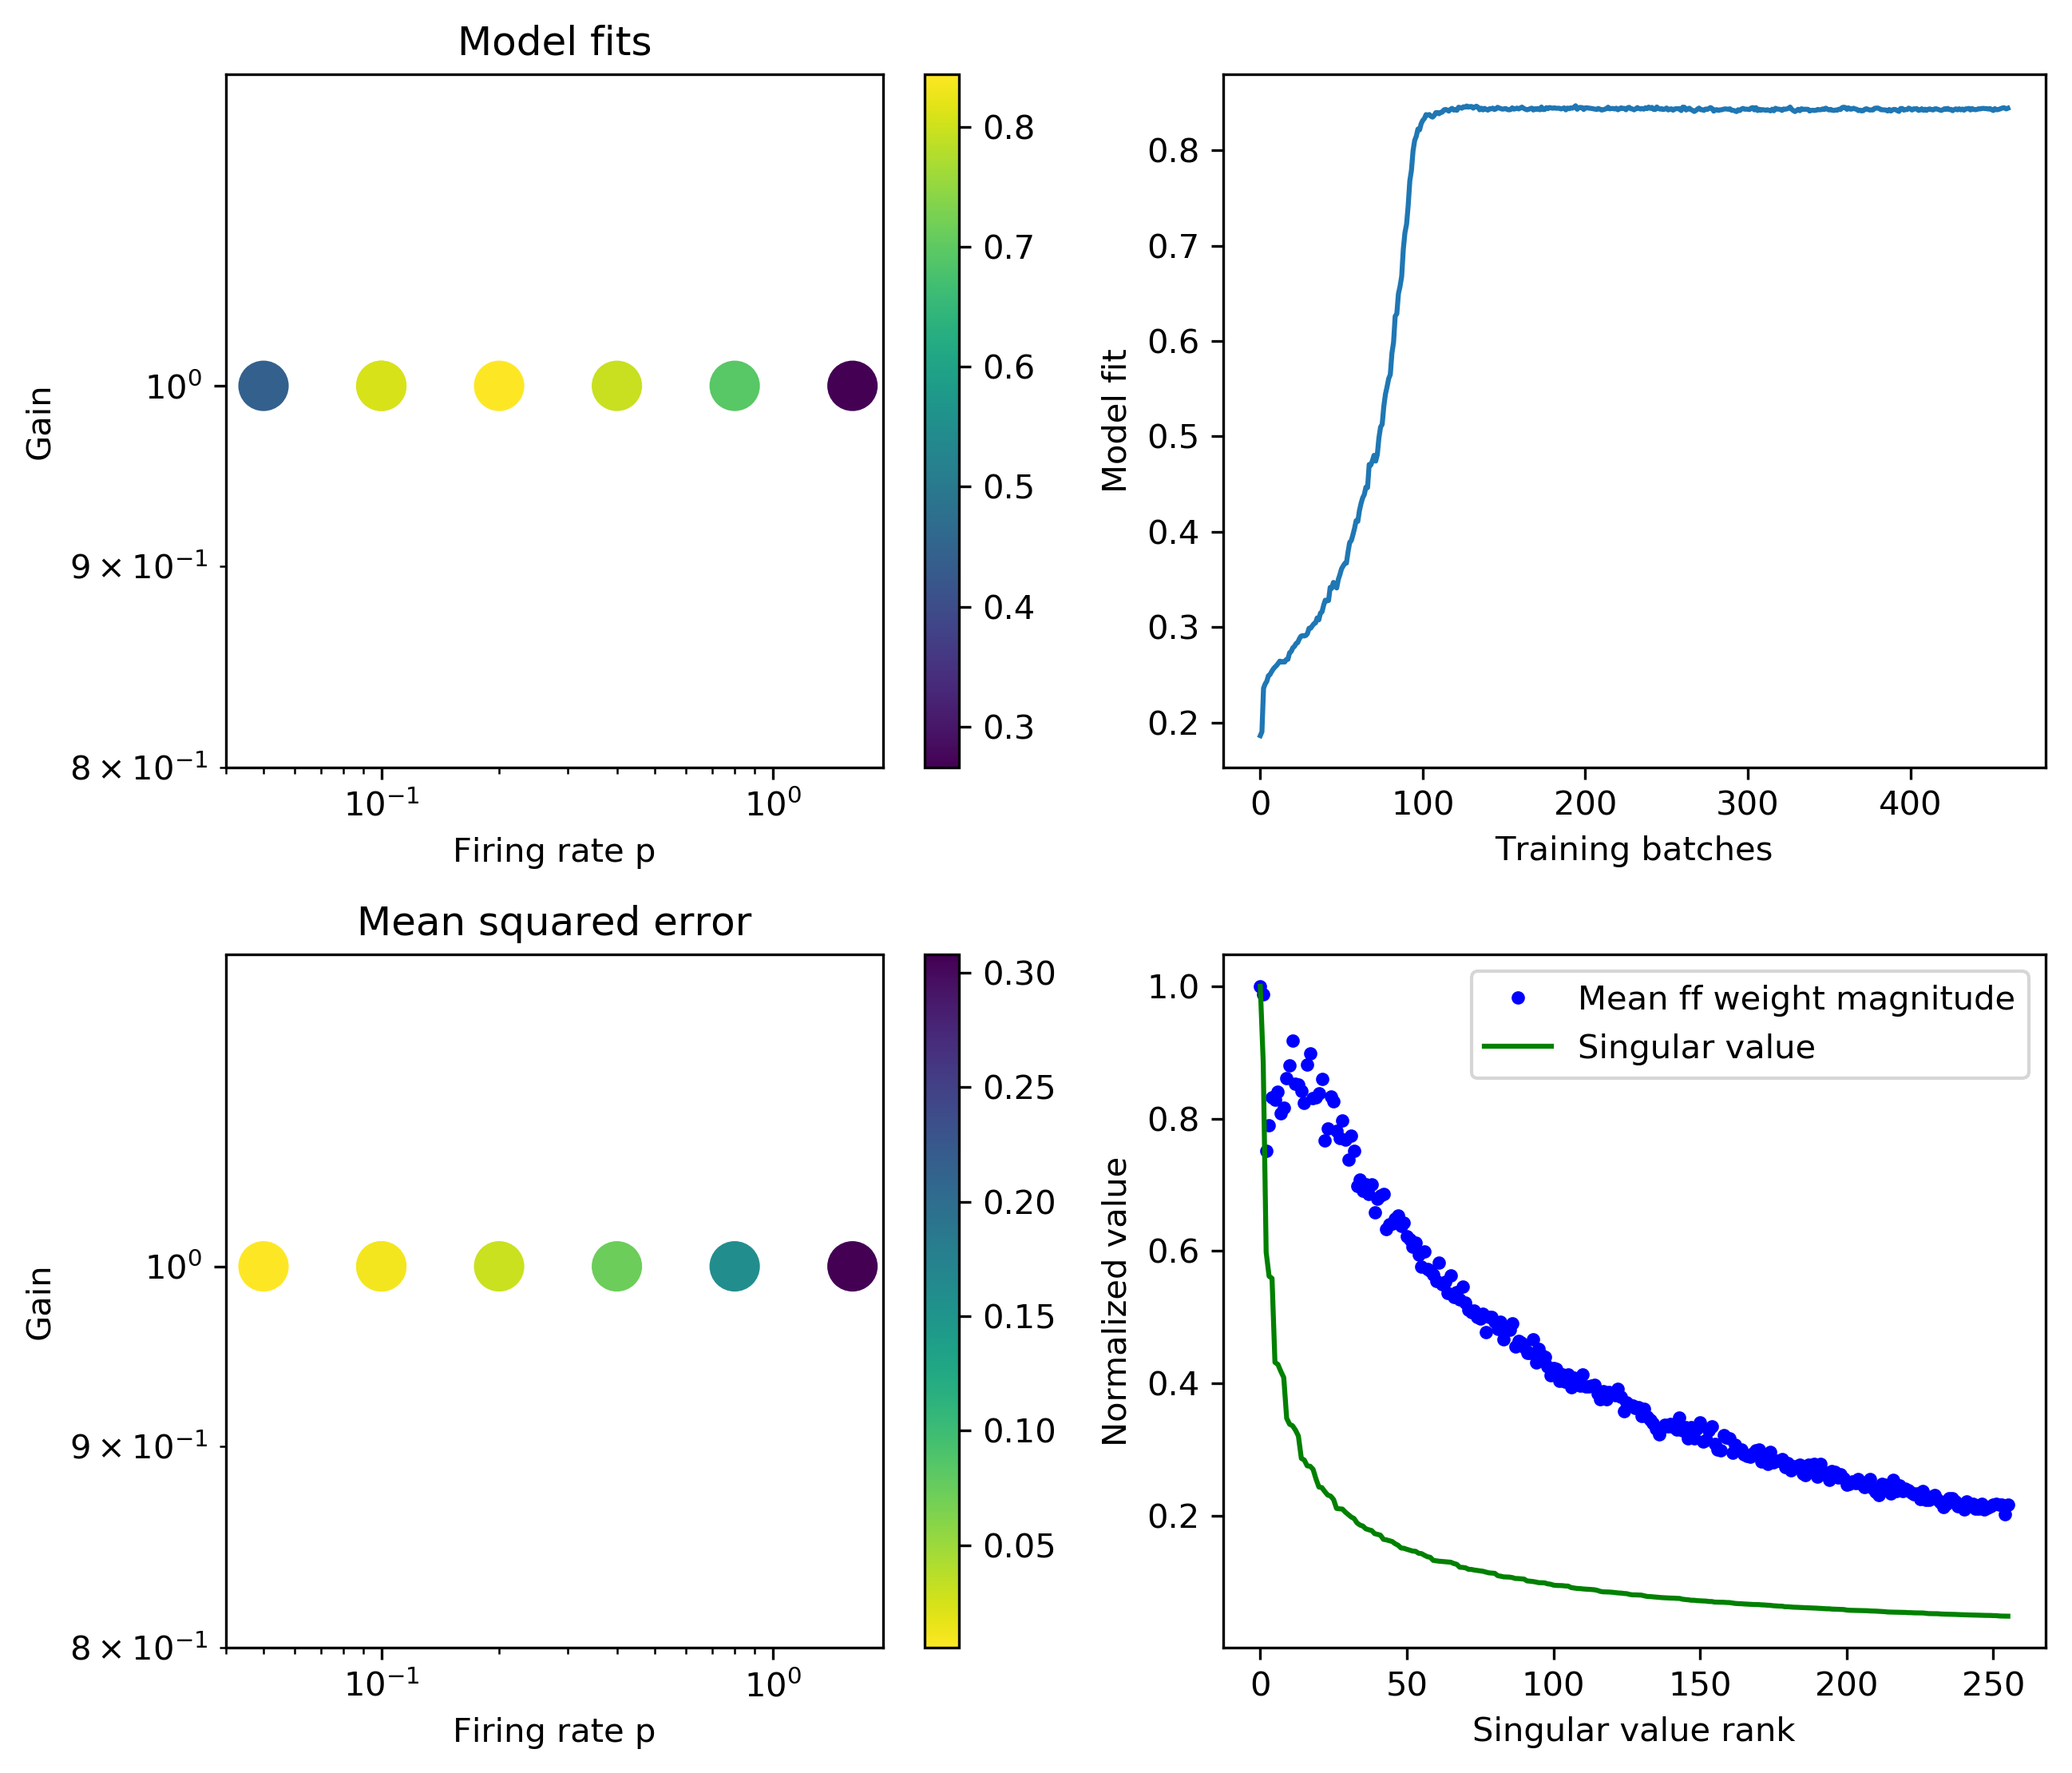

In [78]:
(winners_lca, bestfits_lca, msewinners_lca, besterr_lca, 
    figures_lca) = utils.all_desphere_results(lcafit, toy, impca, 'Pickles/lca/', ds_vals, synth=True)

In [41]:
def get_opt_results(net, folder='Pickles/complete/', check=lambda x: x.startswith('toysail'), split='SAIL' ):
    files = os.listdir(folder)
    ds_vals = np.array([0.0, 0.125, 0.25, 0.5, 0.75, 1.0])
    results = {ds: [] for ds in ds_vals}
    for ff in files:
        if check(ff):
            net.load(folder + ff)
            ds = float(ff.split('ds')[1].split(split)[0])
            try:
                results[ds].append(net.modfits[-1])
            except BaseException as ee:
                print(ds, ee)
    return results
sailres = get_opt_results(net)
lcares = get_opt_results(lcafit, folder='Pickles/lca/', check=lambda x: 'with' in x, split='with')

In [55]:
bestfits = [np.mean(sailres[ds]) for ds in ds_vals]
#bestfits_lca = [np.mean(lcares[ds]) for ds in ds_vals]

In [76]:
# I don't think I trust the high-ds values
#bestfits_lca

[0.9777623482720085,
 0.976425052442946,
 0.9714624026908706,
 0.9412840135758778,
 0.8941962621375041,
 0.8032602461197017]

In [43]:
sigma = [np.std(sailres[ds]) for ds in ds_vals]
sigma_lca = [np.std(lcares[ds]) for ds in ds_vals]

In [77]:
sigma_lca

[0.00022874500088264837,
 0.0002429838137289366,
 0.0001598578528178415,
 0.0006857558019460197,
 0.0020766590363602844,
 0.004800011330374221]

In [16]:
colors = {'lca': [34, 136, 51],
         'sail': [68, 119, 170],
         'chance': [238, 102, 119],
         'mempot': [170, 51, 119]}
for key in colors:
    colors[key] = [xx/256 for xx in colors[key]]

In [22]:
colors

{'lca': [34, 136, 51],
 'sail': [68, 119, 170],
 'chance': [238, 102, 119],
 'mempot': [170, 51, 119]}

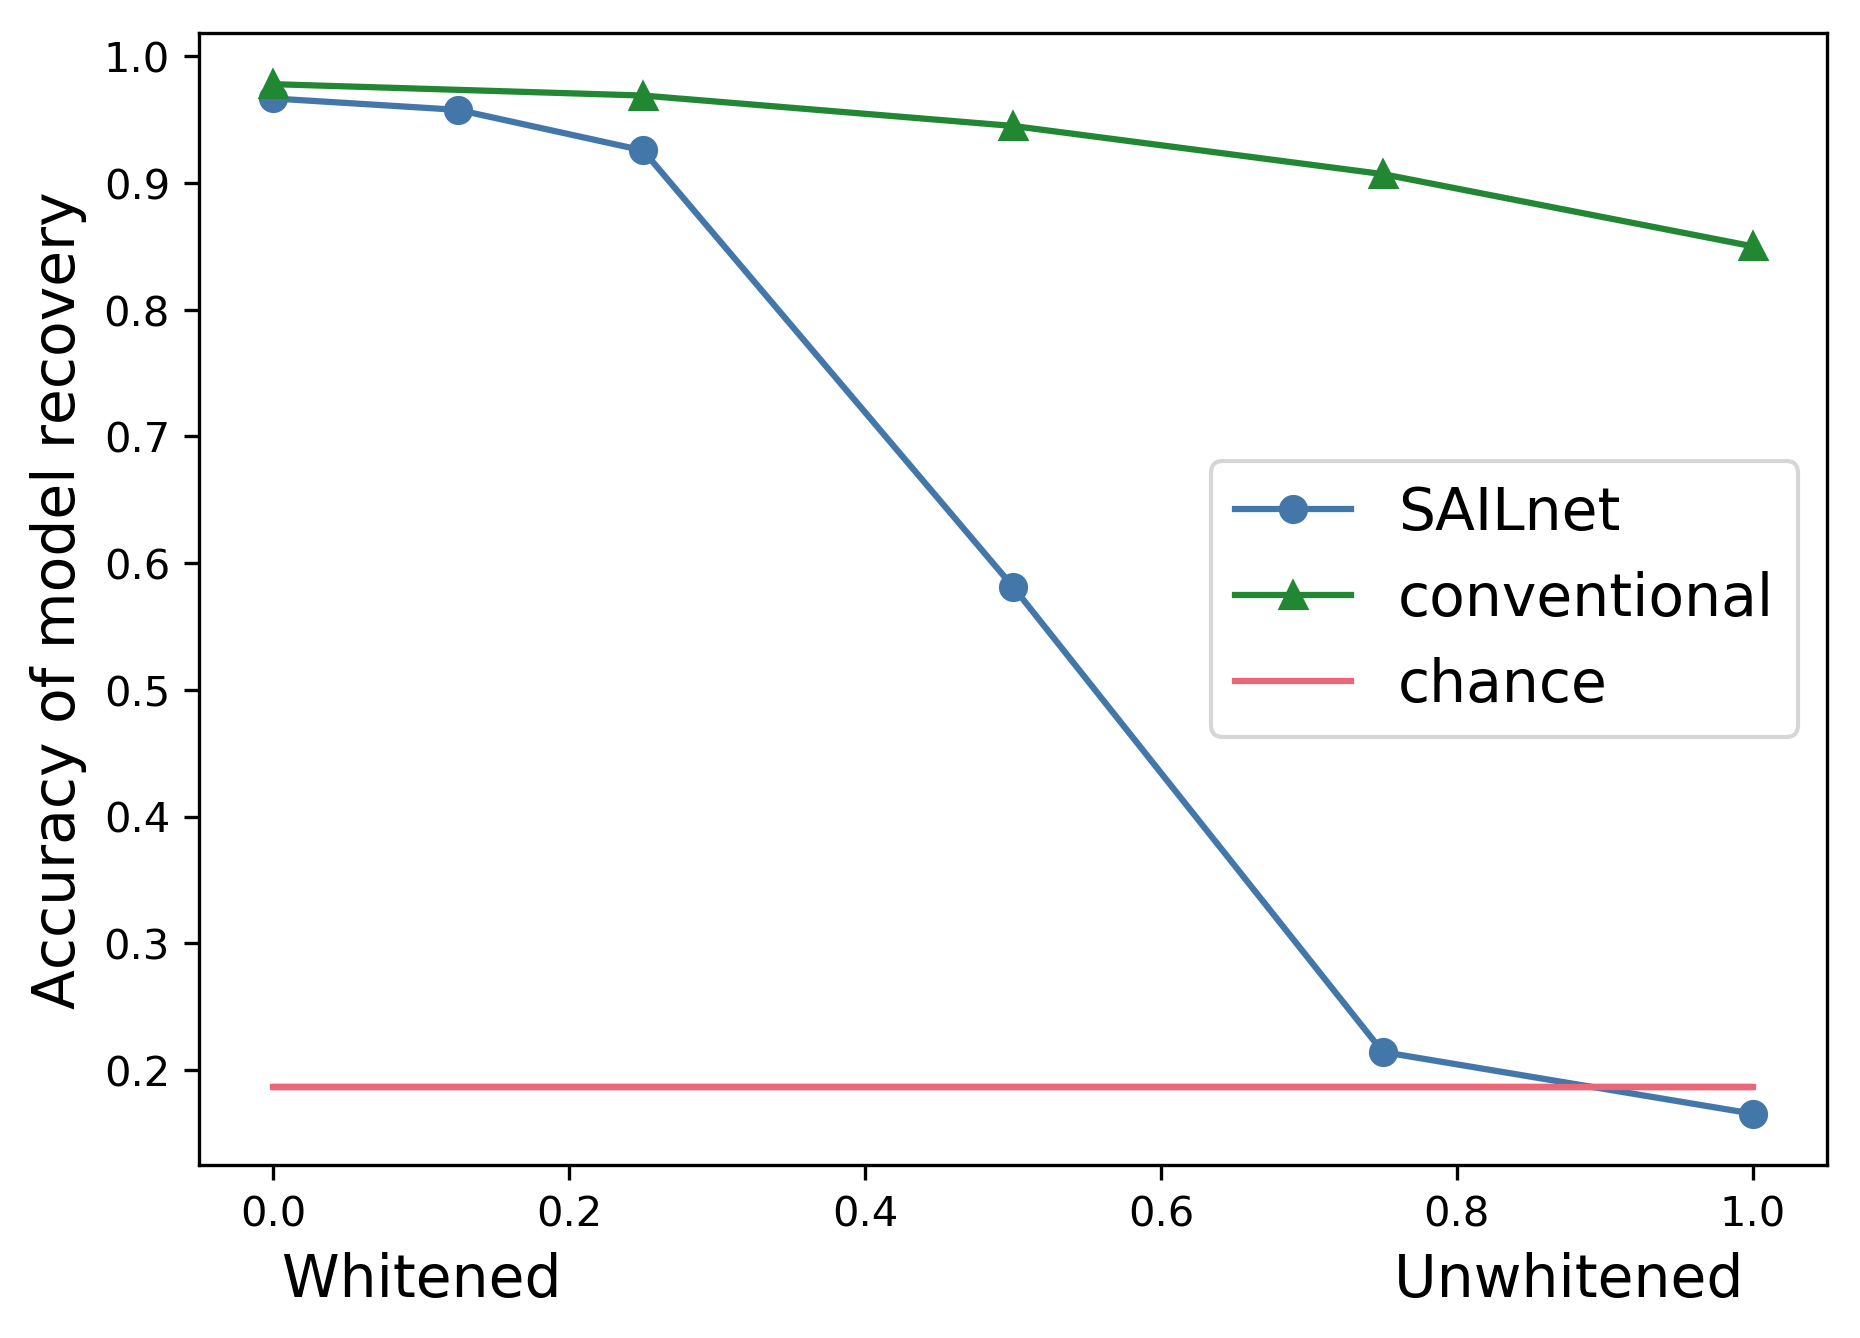

In [17]:
fontsize = 14
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
SAILline, = ax.plot(ds_vals, bestfits, '-o', color=colors['sail'])
chmean = chance.mean()
chstd = chance.std()
chanceline, = ax.plot([0,1], [chmean, chmean], '-', color=colors['chance'])
ax.fill_between(ds_vals, chmean-chstd, chmean+chstd, color=colors['chance'], alpha=0.25)
lcaline, = ax.plot([0.0,0.25, 0.5, 0.75, 1.0], [0.978,0.969, 0.945, 0.907, 0.85], '^-', color=colors['lca'])
ax.set_xlabel('Whitened                                             Unwhitened', fontsize=fontsize)
ax.set_ylabel('Accuracy of model recovery', fontsize=fontsize)
leglabels = ['SAILnet', 'conventional', 'chance']
ax.legend([SAILline, lcaline, chanceline], leglabels, fontsize=fontsize)
fig.savefig('Figures/modrec_vs_ds.png')

In [18]:
mempotresults = np.array([0.98307283, 0.98216706, 0.97579277, 0.9522446 , 0.93211727,
       0.90487295])

# combined figure
3 versions here: first is with membrane potential version of SAILnet added in; 2nd and 3rd are same as each other but in the 2nd the whitened-data dictionaries are dewhitened for display, which we decided is a worse presentation

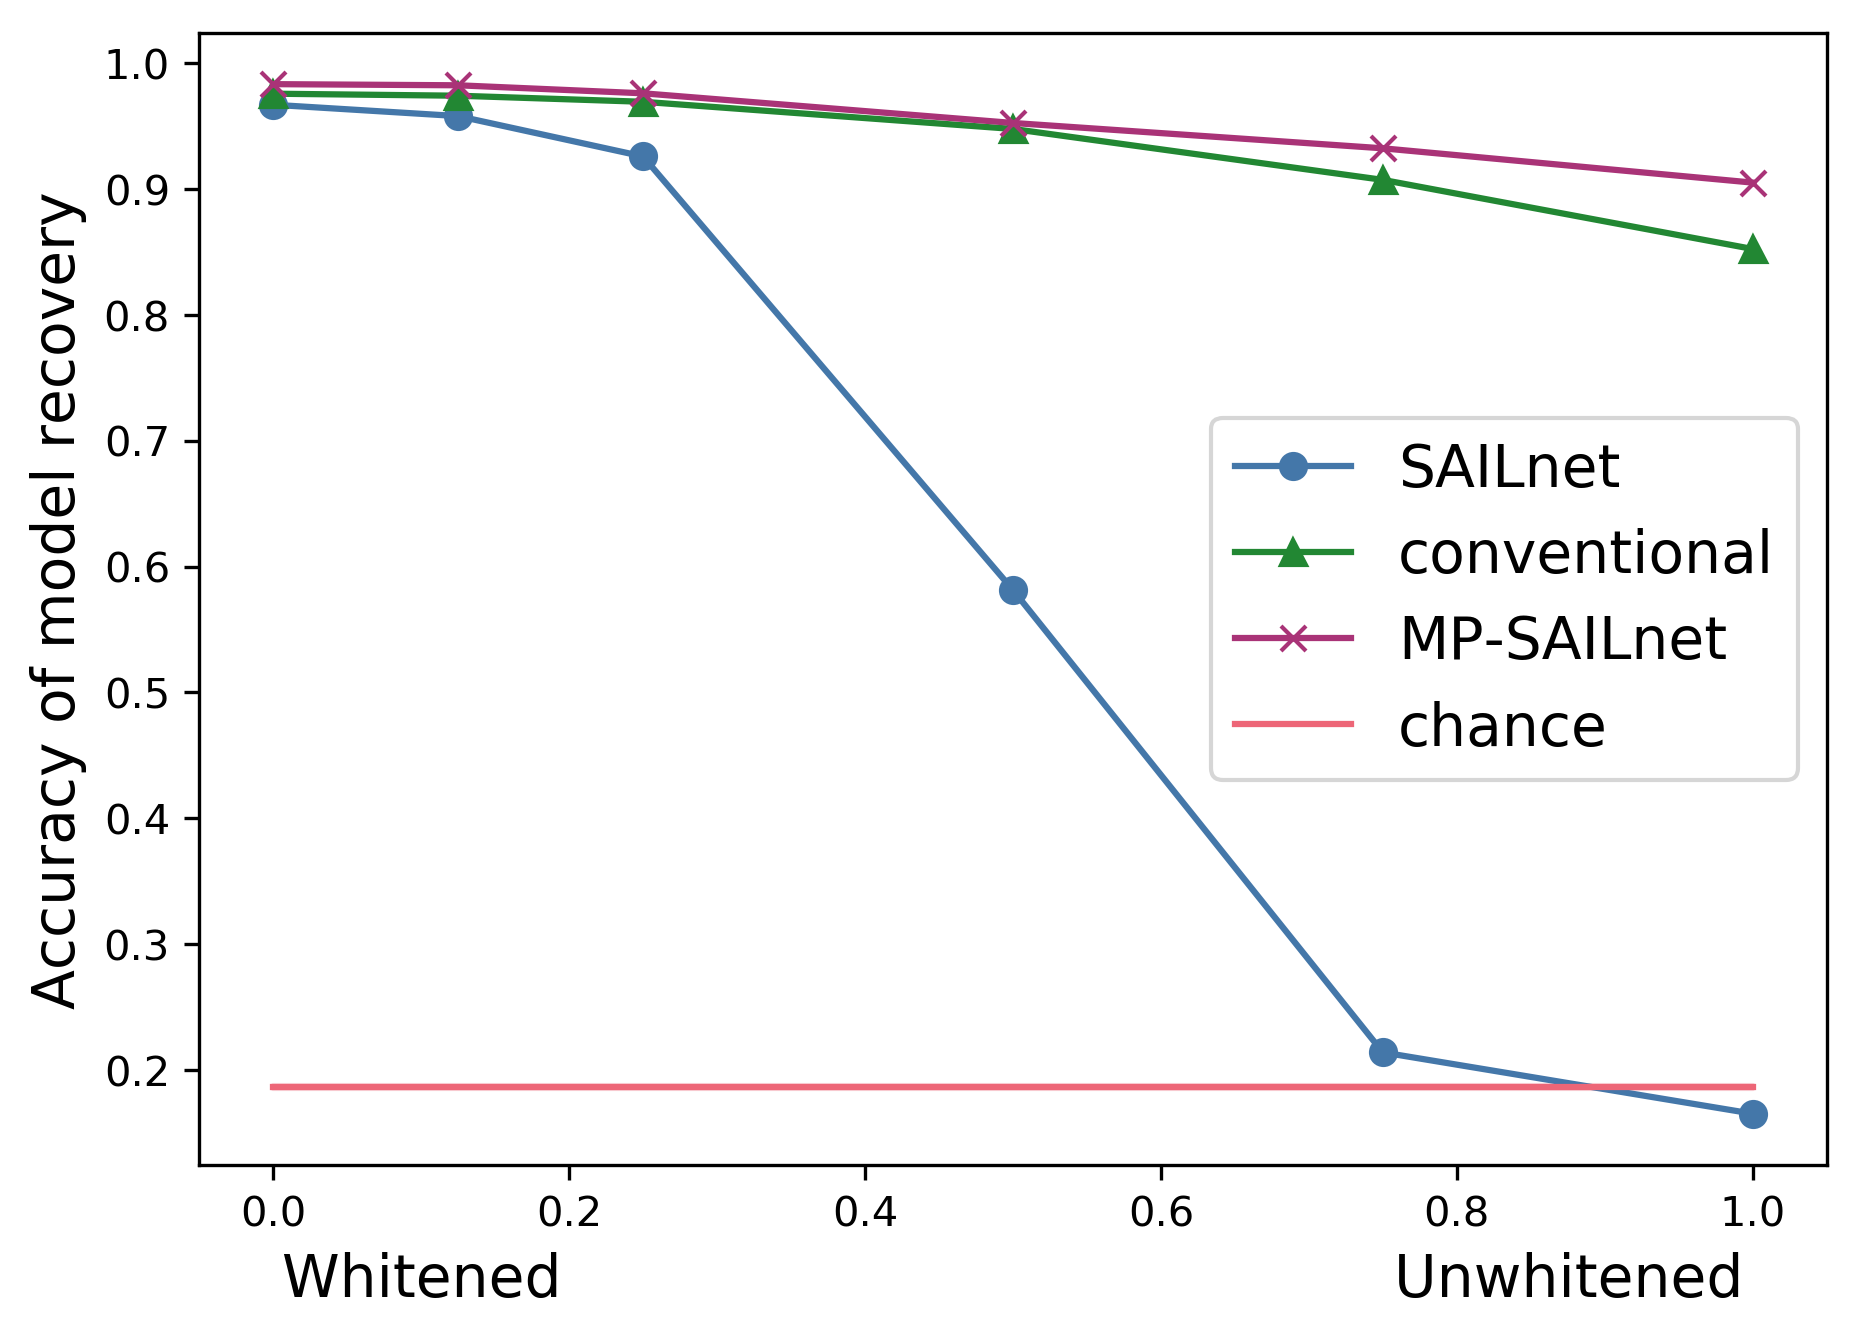

In [19]:
fontsize = 14
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
SAILline, = ax.plot(ds_vals, bestfits, '-o', color=colors['sail'])
chmean = chance.mean()
chstd = chance.std()
chanceline, = ax.plot([0,1], [chmean, chmean], '-', color=colors['chance'])
ax.fill_between(ds_vals, chmean-chstd, chmean+chstd, color=colors['chance'], alpha=0.25)
lcaline, = ax.plot(ds_vals, bestfits_lca, '^-', color=colors['lca'])
mpline, = ax.plot(ds_vals, mempotresults, 'x-', color=colors['mempot'])
ax.set_xlabel('Whitened                                             Unwhitened', fontsize=fontsize)
ax.set_ylabel('Accuracy of model recovery', fontsize=fontsize)
leglabels = ['SAILnet', 'conventional', 'MP-SAILnet', 'chance']
ax.legend([SAILline, lcaline, mpline, chanceline], leglabels, fontsize=fontsize)
fig.savefig('Figures/modrec_vs_ds_withmp.png')

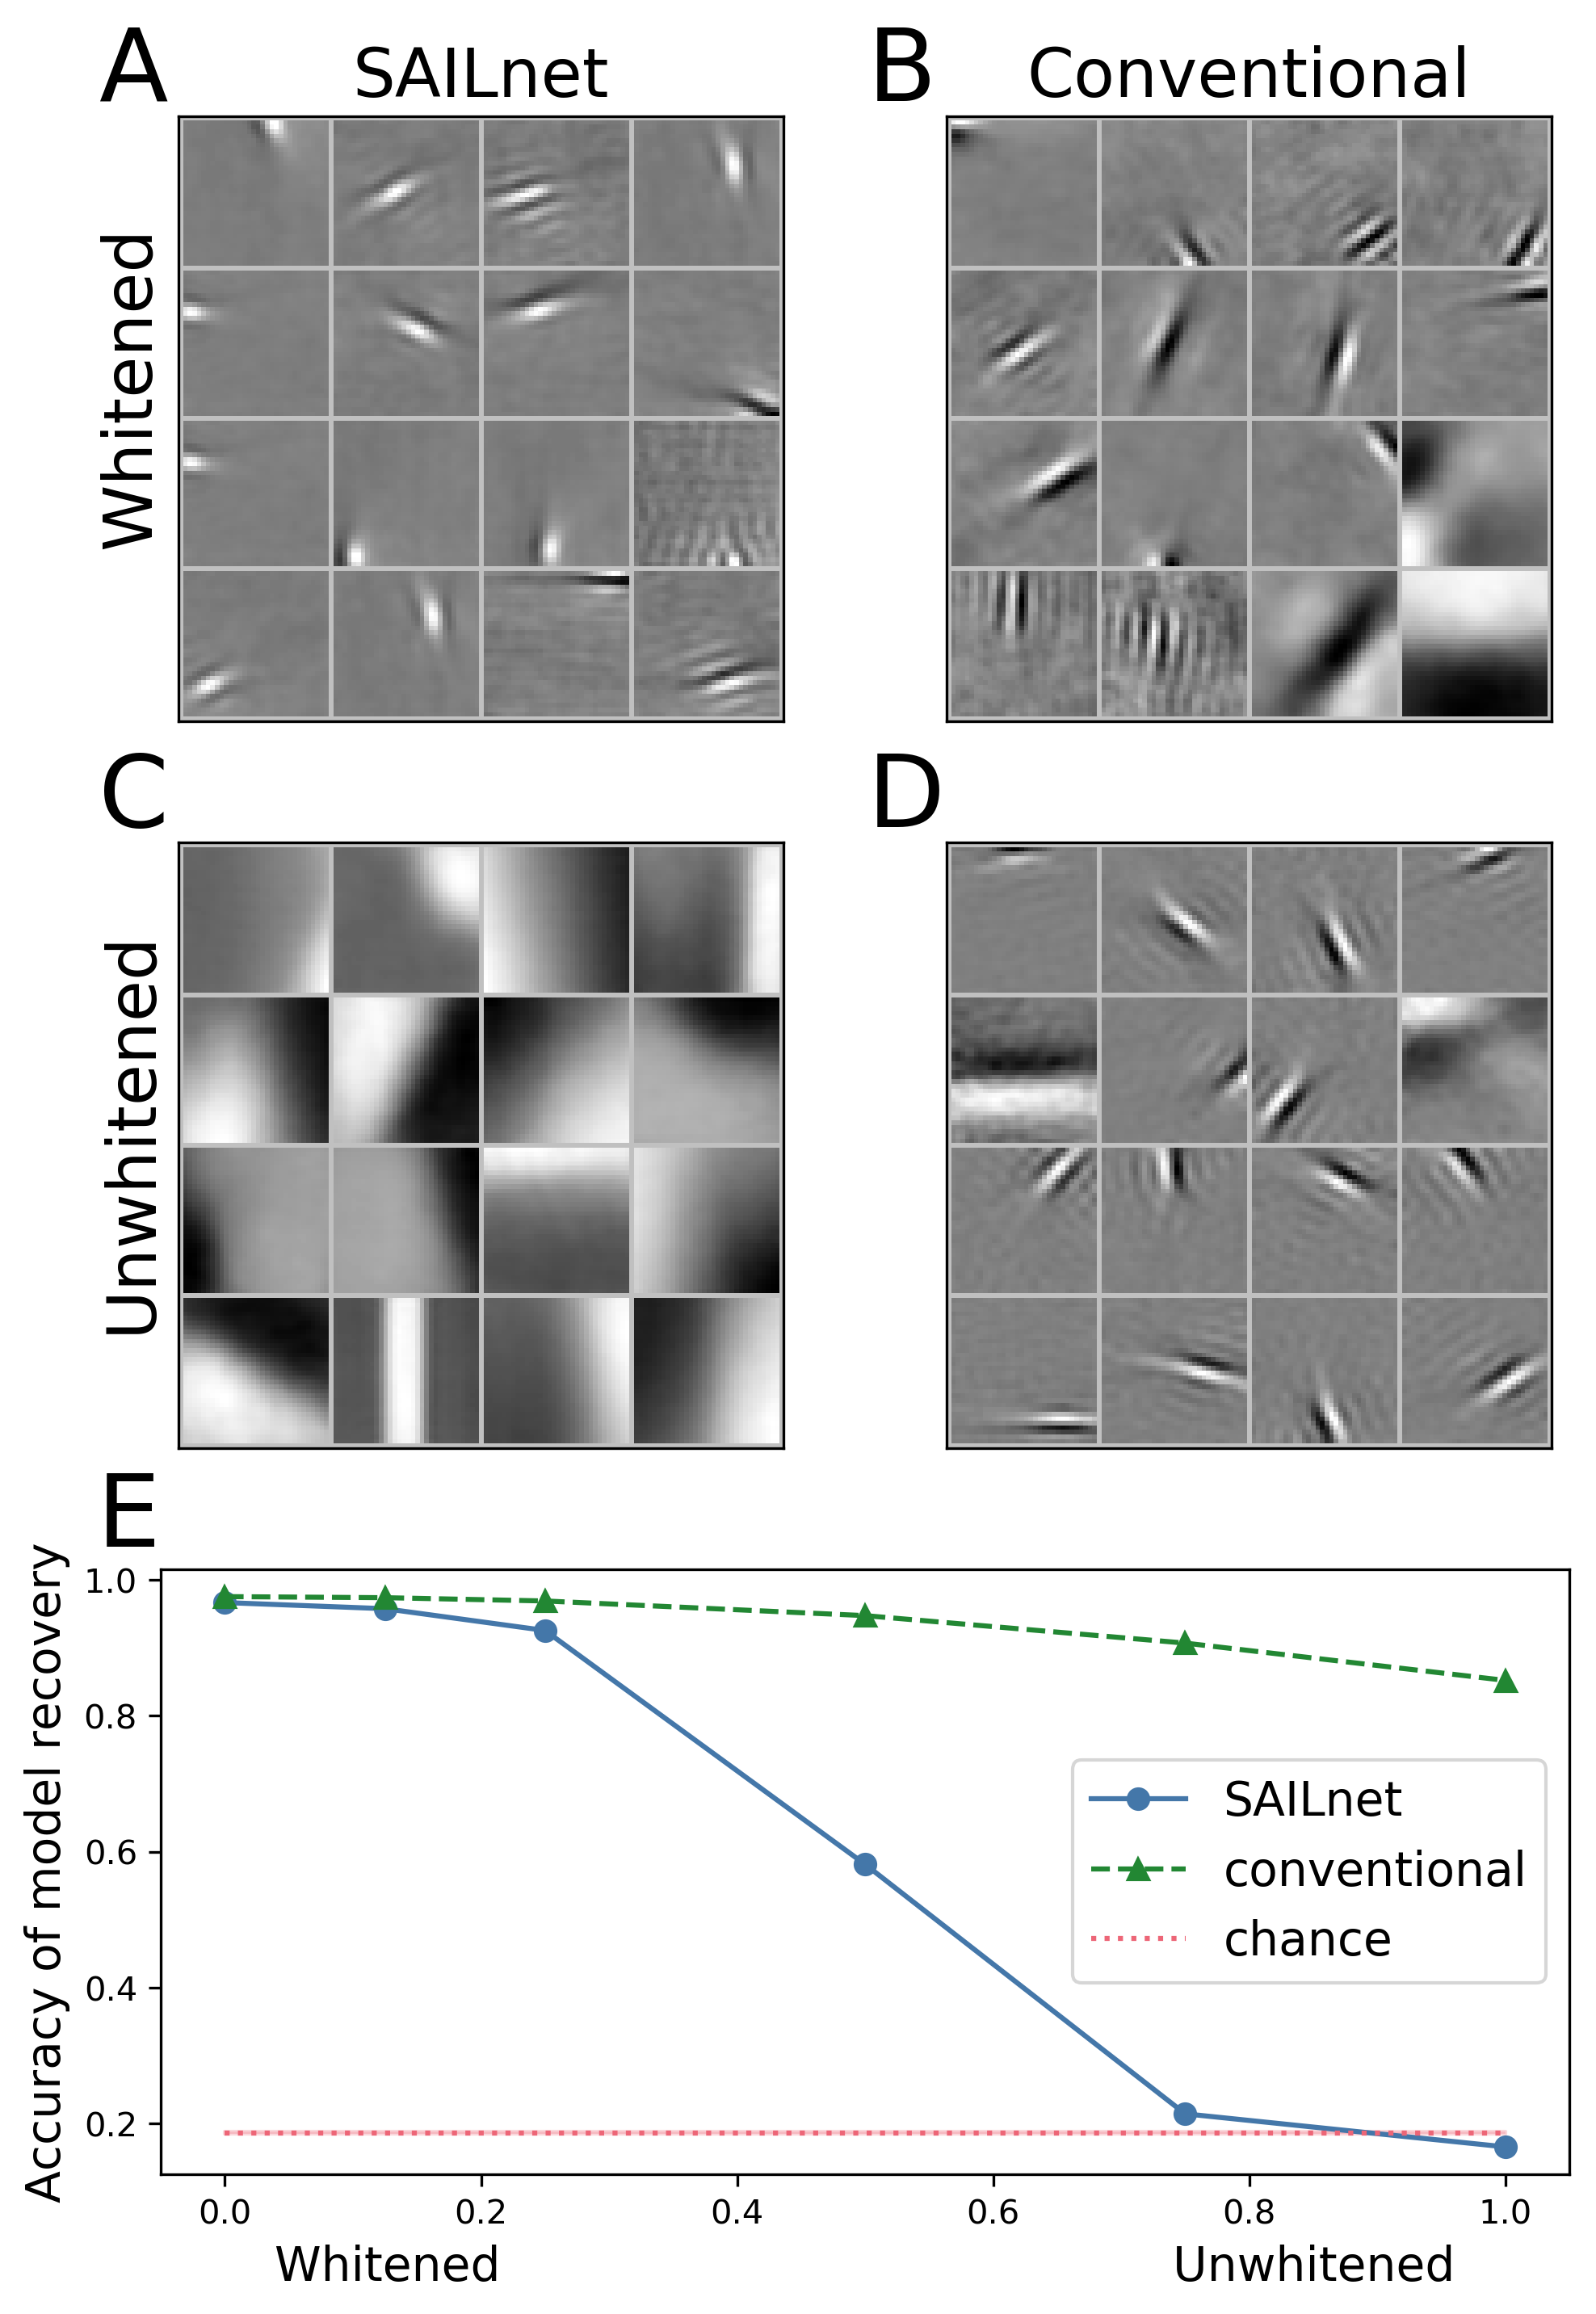

In [34]:
layout = [4,4]
fig = plt.figure(figsize=[7.5, 7.5*3/2])
gs = mpl.gridspec.GridSpec(3, 2)

net.load(ims_winners[0])

txtsize = 20

axes = np.empty(shape=[2,2], dtype=object)
for ii in range(axes.shape[0]):
    for jj in range(axes.shape[1]):
        axes[ii, jj] = fig.add_subplot(gs[ii, jj])

utils.examples_im(net, axes[0,0], whiten=True)
axes[0,0].set_title('SAILnet', size=txtsize)
axes[0,0].text(-18,35,'Whitened',rotation=90, size=txtsize)

lca.load('Pickles/conventional/completeLCA_white.pickle')
utils.examples_im(lca, axes[0,1], whiten=True)
axes[0,1].set_title('Conventional', size=txtsize)

net.load(ims_winners[-1])
utils.examples_im(net, axes[1,0], whiten=False)
axes[1,0].text(-18, 30, 'Unwhitened', rotation=90, size=txtsize)

lca.load('Pickles/conventional/completeLCA_unwhite2.pickle')
utils.examples_im(lca, axes[1,1], whiten=False)


labels = ['A', 'B', 'C', 'D']
for ii in range(len(labels)):
    axes.flatten()[ii].text(-18,-4,labels[ii], size=30)



#### model recovery

fontsize = 14
ax = fig.add_subplot(gs[2,:])
SAILline, = ax.plot(ds_vals, bestfits, '-o', color=colors['sail'])
chmean = chance.mean()
chstd = chance.std()
chanceline, = ax.plot([0,1], [chmean, chmean], ':', color=colors['chance'])
ax.fill_between(ds_vals, chmean-chstd, chmean+chstd, color=colors['chance'], alpha=0.25)
lcaline, = ax.plot(ds_vals, bestfits_lca, '^--', color=colors['lca'])
ax.set_xlabel('Whitened                                             Unwhitened', fontsize=fontsize)
ax.set_ylabel('Accuracy of model recovery', fontsize=fontsize)
leglabels = ['SAILnet', 'conventional', 'chance']
ax.legend([SAILline, lcaline, chanceline], leglabels, fontsize=fontsize)
ax.text(-0.1, 1.05, 'E', size=30)
#fig.tight_layout()
fig.savefig('Figures/whitening_combined.png')

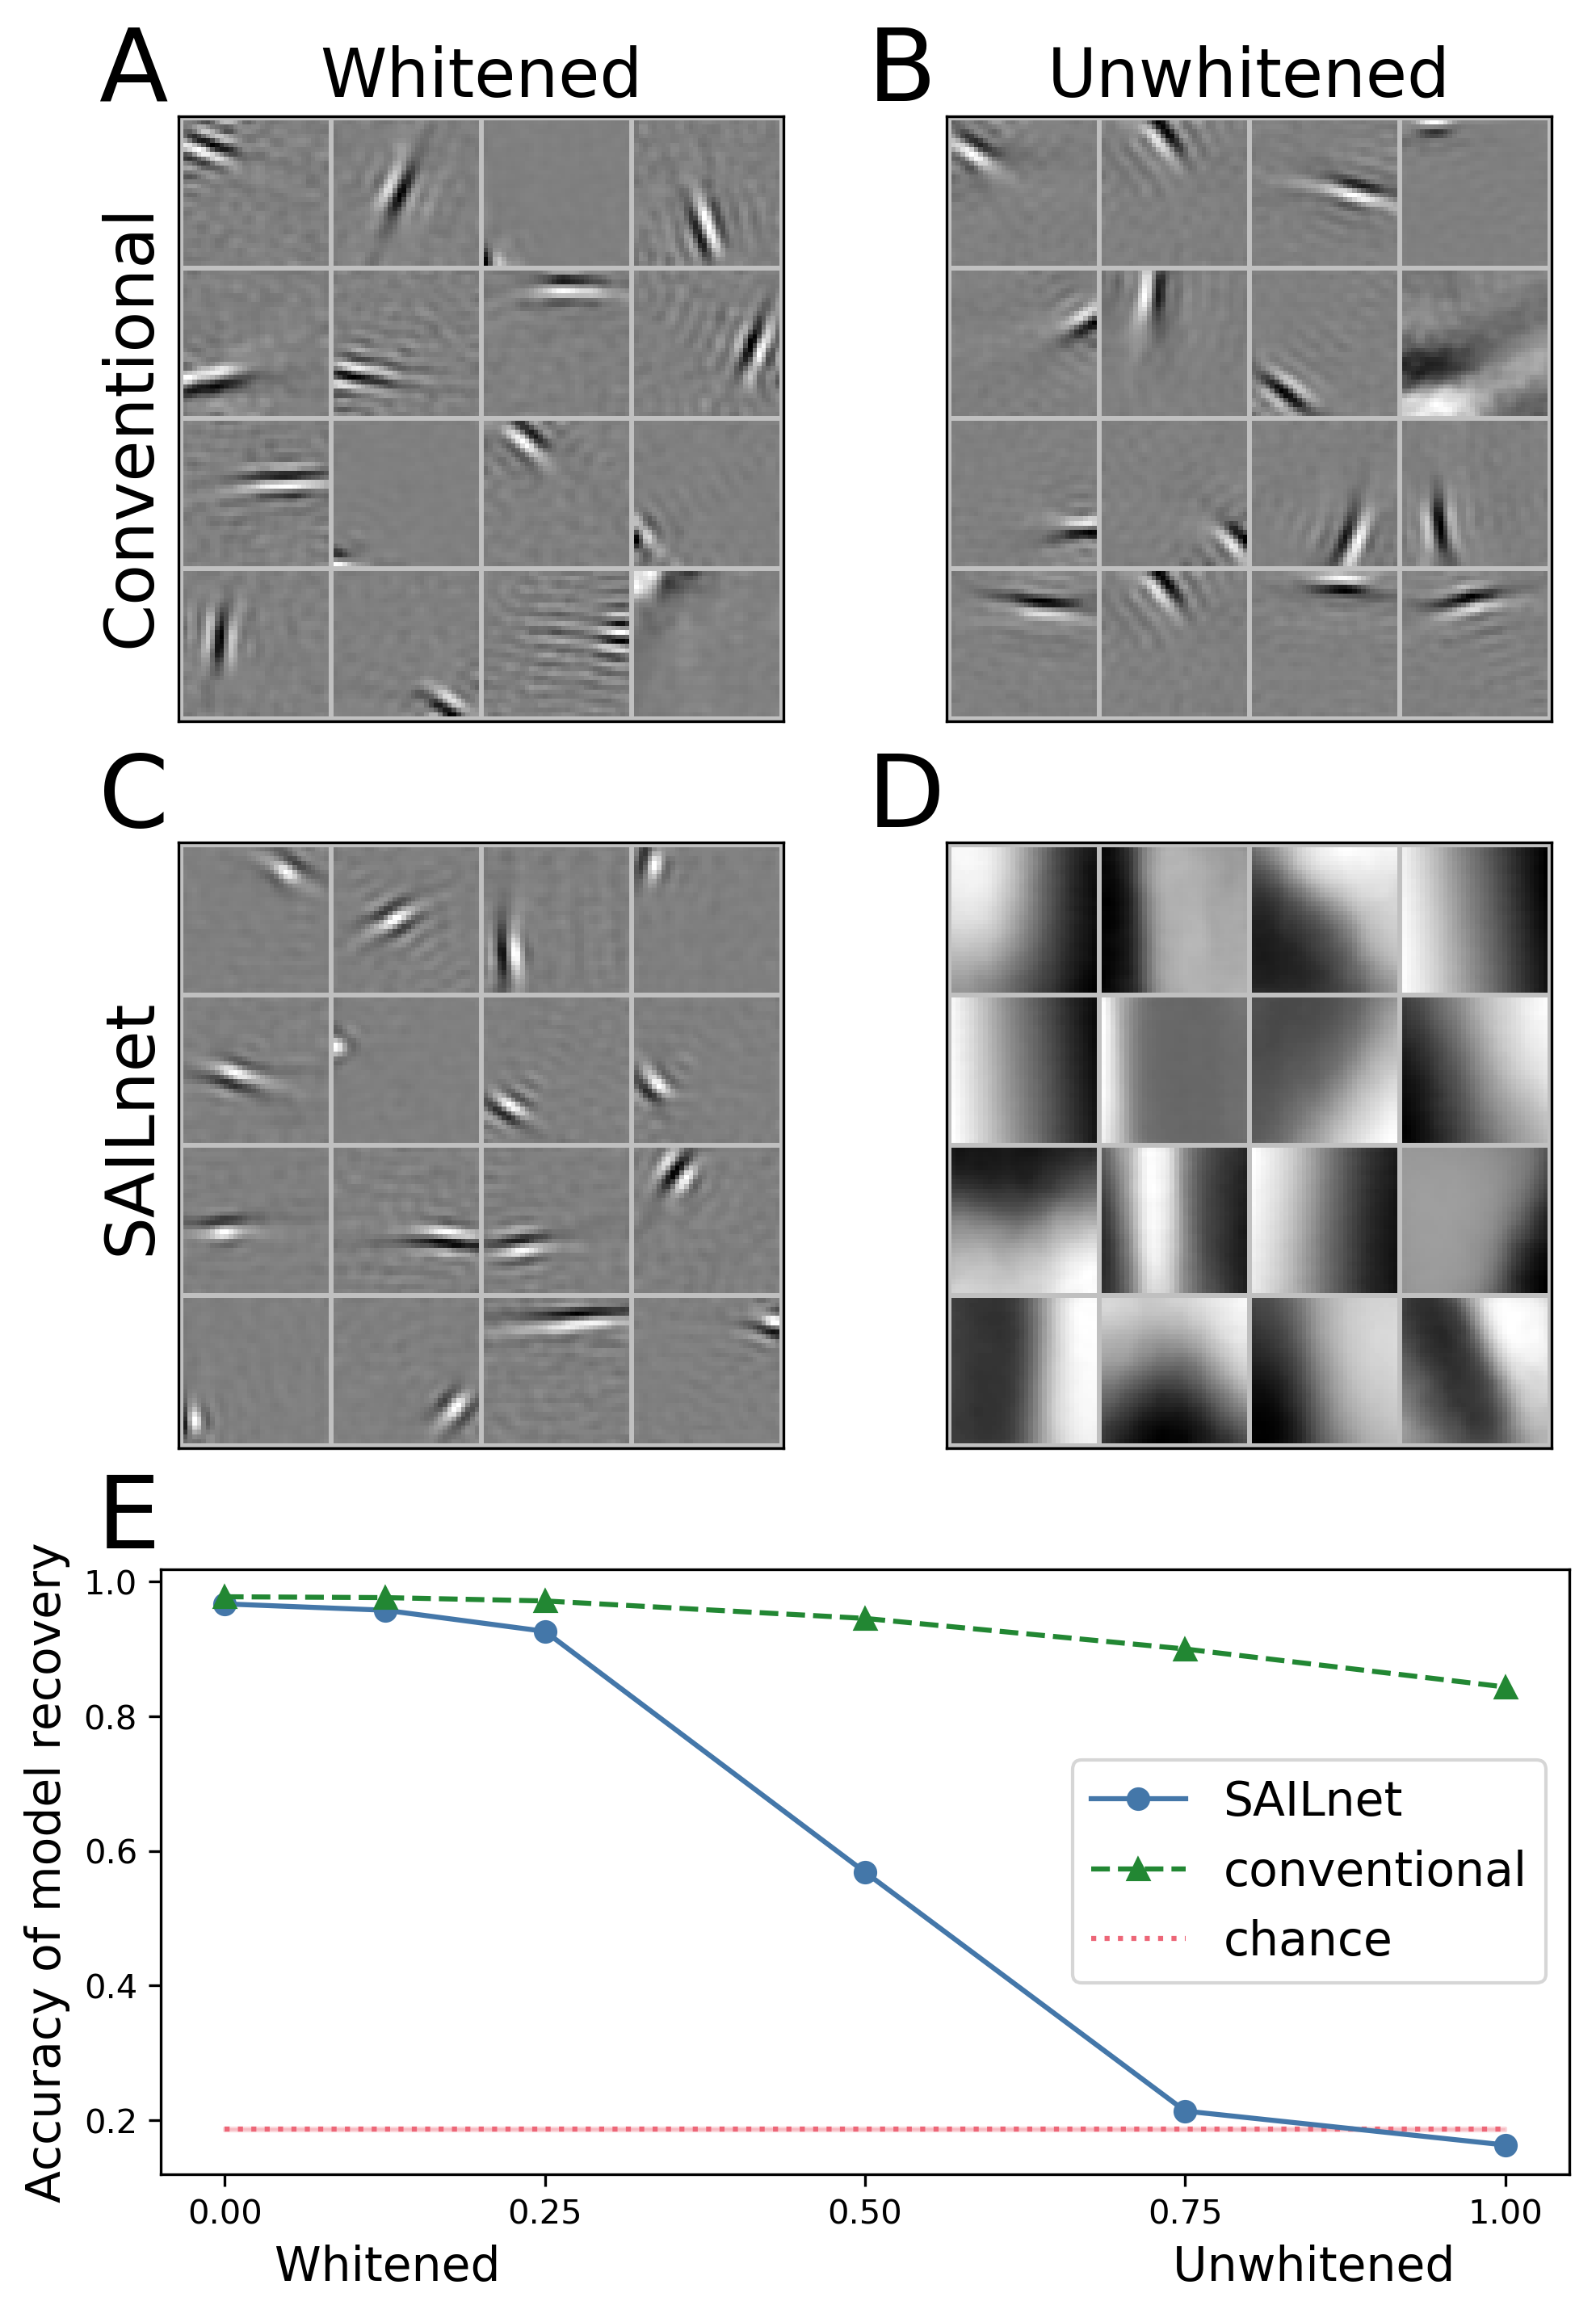

In [85]:
layout = [4,4]
fig = plt.figure(figsize=[7.5, 7.5*3/2])
gs = mpl.gridspec.GridSpec(3, 2)

txtsize = 20

axes = np.empty(shape=[2,2], dtype=object)
for ii in range(axes.shape[0]):
    for jj in range(axes.shape[1]):
        axes[ii, jj] = fig.add_subplot(gs[ii, jj])

imlca.load('Pickles/conventional/completeLCA_white.pickle')
utils.examples_im(imlca, axes[0,0], whiten=False, seed=271828)
   
imlca.load('Pickles/conventional/completeLCA_unwhite2.pickle')
utils.examples_im(imlca, axes[0,1], whiten=False, seed=3141592)    
    
imnet.load(ims_winners[0])
utils.examples_im(imnet, axes[1,0], whiten=False)

imnet.load(ims_winners[-1])
utils.examples_im(imnet, axes[1,1], whiten=False)

axes[0,0].text(-18,30,'Conventional',rotation=90, size=txtsize)
axes[0,0].set_title('Whitened', size=txtsize)
axes[0,1].set_title('Unwhitened', size=txtsize)
axes[1,0].text(-18, 45, 'SAILnet', rotation=90, size=txtsize)

labels = ['A', 'B', 'C', 'D']
for ii in range(len(labels)):
    axes.flatten()[ii].text(-18,-4,labels[ii], size=30)



#### model recovery

ebarfactor = 1
fontsize = 14
ax = fig.add_subplot(gs[2,:])
SAILline, _, _ = ax.errorbar(ds_vals, bestfits, yerr=np.array(sigma)*ebarfactor, marker='o', color=colors['sail'])
ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])
chmean = chance.mean()
chstd = chance.std()
chanceline, = ax.plot([0,1], [chmean, chmean], ':', color=colors['chance'])
ax.fill_between(ds_vals, chmean-chstd, chmean+chstd, color=colors['chance'], alpha=0.25)
lcaline, _, _ = ax.errorbar(ds_vals, bestfits_lca, yerr=np.array(sigma_lca)*ebarfactor, 
                            marker='^', linestyle='--', color=colors['lca'])
ax.set_xlabel('Whitened                                             Unwhitened', fontsize=fontsize)
ax.set_ylabel('Accuracy of model recovery', fontsize=fontsize)
leglabels = ['SAILnet', 'conventional', 'chance']
ax.legend([SAILline, lcaline, chanceline], leglabels, fontsize=fontsize)
ax.text(-0.1, 1.05, 'E', size=30)
#fig.tight_layout()
fig.savefig('Figures/whitening_combined_nowhiten.png')

In [56]:
bestfits

[0.9669250306104613,
 0.9575249654275719,
 0.9260817657632625,
 0.5682600625246346,
 0.2134827210522218,
 0.1630614974151145]

In [81]:
bestfits_lca

array([0.97750068, 0.97623587, 0.97128926, 0.94533385, 0.89987632,
       0.8434515 ])